# AI-Powered Sentiment Analysis for Contracts

## **Objective**
This project analyzes sentiment in contracts using **VADER Sentiment Analysis** and a **Bidirectional LSTM** model for classification. It explores contract tone, data augmentation techniques, and deep learning methods for improved sentiment classification.



#Installation

## **Step 1: Install Required Libraries**
Installing necessary Python libraries for NLP, sentiment analysis, and deep learning.

In [1]:
%pip install vaderSentiment
%pip install matplotlib
%pip install beautifulsoup4
%pip install ipython
%pip install scikit-learn
%pip install numpy
%pip install textblob
%pip install nltk
%pip install keras-tuner
%pip install tensorflow-hub
%pip install Markdown
%pip install scikit-optimize
%pip install tensorflow==2.17.0 scikeras==0.11.0
!pip install deep-translator
!pip install keras_tuner
!pip install emoji
!pip install langdetect
!pip install httpx==0.23.0
!pip install googletrans
!pip install transformers torch
!pip install transformers

  Using cached httpx-0.23.0-py3-none-any.whl.metadata (52 kB)
  Using cached httpcore-0.15.0-py3-none-any.whl.metadata (15 kB)
  Using cached h11-0.12.0-py3-none-any.whl.metadata (8.1 kB)
Using cached httpx-0.23.0-py3-none-any.whl (84 kB)
Using cached httpcore-0.15.0-py3-none-any.whl (68 kB)
Using cached h11-0.12.0-py3-none-any.whl (54 kB)
  Attempting uninstall: h11
    Found existing installation: h11 0.9.0
    Uninstalling h11-0.9.0:
      Successfully uninstalled h11-0.9.0
  Attempting uninstall: httpcore
    Found existing installation: httpcore 0.9.1
    Uninstalling httpcore-0.9.1:
      Successfully uninstalled httpcore-0.9.1
  Attempting uninstall: httpx
    Found existing installation: httpx 0.13.3
    Uninstalling httpx-0.13.3:
      Successfully uninstalled httpx-0.13.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
googletrans 3.0.0 requires httpx

## **Step 2: Import Libraries & Setup**
Import essential libraries for web scraping, text processing, and model training.

#Create Model

## **Step 3: Download & Preprocess Data**
Extract contract data from a legal contract website using `BeautifulSoup` and preprocess text.

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-2-86a890318db0>:59: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()  # Convert HTML content to text


Number of documents loaded: 152
Class distribution before augmentation: Counter({0: 76, 1: 76})
Class distribution after augmentation: Counter({0: 1748, 1: 1748})
Testing combination: {'lstm_units': 32, 'learning_rate': 0.0001, 'dropout_rate': 0.3, 'batch_size': 64}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 26s 374ms/step - accuracy: 0.5176 - auc: 0.5689 - loss: 0.3000 - val_accuracy: 0.5536 - val_auc: 0.7134 - val_loss: 0.2983 - learning_rate: 1.0000e-04
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 269ms/step - accuracy: 0.5318 - auc: 0.8186 - loss: 0.2663 - val_accuracy: 0.5536 - val_auc: 0.8375 - val_loss: 0.2854 - learning_rate: 1.0000e-04
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.5854 - auc: 0.9451 - loss: 0.2486 - val_accuracy: 0.5518 - val_auc: 0.9172 - val_loss: 0.2717 - learning_rate: 1.0000e-04
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.6776 - auc: 0.9708 - loss: 0.2333 - val_accuracy: 0.5768 - val_auc: 0.9492 - val_loss: 0.2581 - learning_rate: 1.0000e-04
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 190ms/step - accuracy: 0.7594 - auc: 0.9863 - loss: 0.2185 - val_accuracy: 0.5857 - val_auc: 0.9696 - val_loss: 0.2444 - learning_rate: 1.0000e-04
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - accur

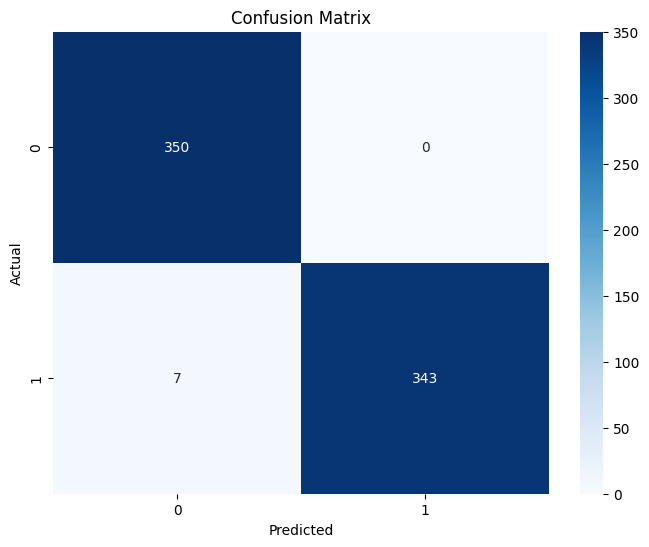

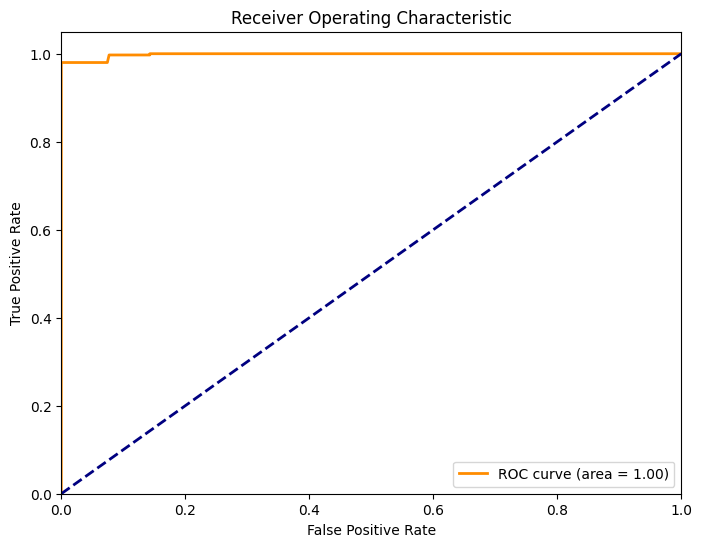

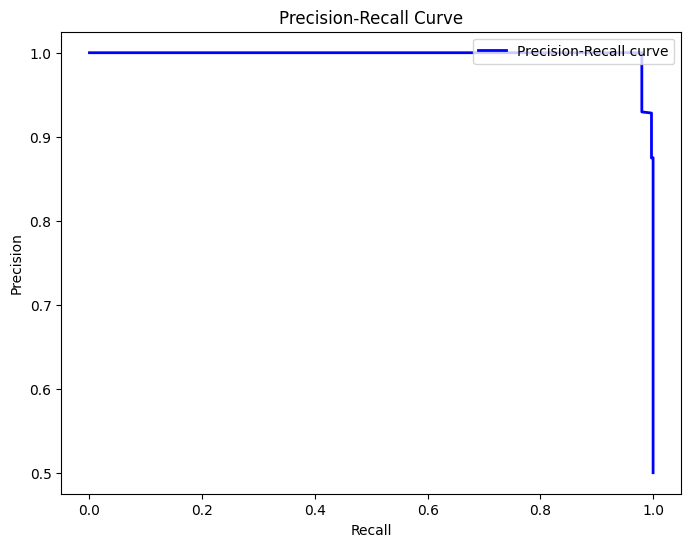

In [2]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, ParameterSampler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import wordnet, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import requests
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
from collections import Counter
import time
from IPython.display import Markdown, display
import pandas as pd

# Download NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# TensorFlow Configuration for GPU
gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 0:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# List of dataset URLs
urls = [
    "https://www.rocketlawyer.com/business-and-contracts/service-contracts/event-contracts/document/musical-performance-contract"
]

# Text preprocessing function
def preprocess_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()  # Convert HTML content to text
    text = re.sub(r'[^\w\s]', '', text)  # Remove non-word characters
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    tokens = word_tokenize(text)  # Tokenize the text
    stop_words = set(stopwords.words('english'))  # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return ' '.join(tokens)

# Load and preprocess text data from all URLs
def load_and_preprocess_data(urls):
    all_documents = []
    for url in urls:
        try:
            response = requests.get(url)
            response.encoding = "ISO-8859-1"
            soup = BeautifulSoup(response.text, "html.parser")
            text = soup.get_text()
            documents = text.split('. ')
            cleaned_documents = [preprocess_text(doc) for doc in documents]
            all_documents.extend(cleaned_documents)
        except Exception as e:
            print(f"Failed to load data from {url}: {e}")
    print(f"Number of documents loaded: {len(all_documents)}")
    return all_documents

# Load data from URLs
documents = load_and_preprocess_data(urls)

# Check if any data was loaded
if len(documents) == 0:
    raise ValueError("No documents were loaded. Please check the URLs and data extraction process.")

# Create balanced labels
half_size = len(documents) // 2
labels = np.array([0] * half_size + [1] * (len(documents) - half_size))

# Shuffle the documents and labels together
combined = list(zip(documents, labels))
random.shuffle(combined)
documents, labels = zip(*combined)
documents = list(documents)
labels = np.array(labels)

print(f"Class distribution before augmentation: {Counter(labels)}")

# Data Augmentation (example)
def synonym_augmentation(text):
    words = text.split()
    if not words:
        return text
    augmented_words = []
    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            if synonym != word:
                augmented_words.append(synonym)
            else:
                augmented_words.append(word)
        else:
            augmented_words.append(word)
    return ' '.join(augmented_words)

def random_insertion(text):
    words = text.split()
    if len(words) < 2:
        return text
    new_words = words.copy()
    for _ in range(3):
        add_word(new_words)
    return ' '.join(new_words)

def add_word(new_words):
    synonyms = []
    counter = 0
    while len(synonyms) < 1 and counter < 10:
        random_word = new_words[random.randint(0, len(new_words)-1)]
        synonyms = wordnet.synsets(random_word)
        counter += 1
    if synonyms:
        random_synonym = synonyms[0].lemmas()[0].name()
        new_words.insert(random.randint(0, len(new_words)-1), random_synonym)

# Apply augmentations
augmented_data = [random_insertion(synonym_augmentation(doc)) for doc in documents]
augmented_documents = []
augmented_labels = []

for doc, label in zip(augmented_data, labels):
    augmented_docs = [doc] * 22
    augmented_documents.extend(augmented_docs)
    augmented_labels.extend([label] * len(augmented_docs))

documents.extend(augmented_documents)
labels = np.concatenate((labels, augmented_labels))

print(f"Class distribution after augmentation: {Counter(labels)}")

# Split augmented data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(
    documents, labels, test_size=0.2, random_state=42, stratify=labels
)

# Tokenization and padding
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data)

X_train_seq = tokenizer.texts_to_sequences(train_data)
X_test_seq = tokenizer.texts_to_sequences(test_data)

max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Convert to numpy arrays directly
X_train_final = np.array(X_train_pad)
y_train_final = np.array(train_labels)
X_test_pad = np.array(X_test_pad)
test_labels = np.array(test_labels)

# Compute class weights dynamically
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_final), y=y_train_final)
class_weights = dict(enumerate(class_weights))

# Define focal loss with adjusted parameters
def focal_loss(gamma=2.5, alpha=0.90):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.convert_to_tensor(y_true, tf.float32)
        y_pred = tf.convert_to_tensor(y_pred, tf.float32)
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)
        weights = alpha * y_true * tf.math.pow(1 - y_pred, gamma) + (1 - alpha) * (1 - y_true) * tf.math.pow(y_pred, gamma)
        loss = weights * cross_entropy
        return tf.reduce_mean(loss)
    return focal_loss_fixed

loss_fn = focal_loss(gamma=2.5, alpha=0.90)

# Define model creation function
def create_model(learning_rate=0.0001, lstm_units=8, dropout_rate=0.5):
    model = Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=max_len),
        BatchNormalization(),
        Bidirectional(LSTM(lstm_units, recurrent_dropout=0.5, kernel_regularizer=l2(0.001))),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
    return model

# Define hyperparameters to tune
param_grid = {
    'learning_rate': [0.0001, 0.001],
    'lstm_units': [32, 64],
    'dropout_rate': [0.3, 0.5],
    'batch_size': [64, 128]
}

# Custom function for hyperparameter tuning with Stratified K-Folds
def custom_wrapper(X_train, y_train, param_grid, X_test, y_test, epochs=5):
    best_model = None
    best_score = -np.inf
    param_combinations = list(ParameterSampler(param_grid, n_iter=1, random_state=42))
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for params in param_combinations:
        print(f"Testing combination: {params}")
        fold_scores = []
        for train_index, val_index in skf.split(X_train, y_train):
            X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

            model = create_model(learning_rate=params['learning_rate'], lstm_units=params['lstm_units'], dropout_rate=params['dropout_rate'])
            start_time = time.time()
            history = model.fit(
                X_train_fold, y_train_fold,
                batch_size=params['batch_size'],
                epochs=epochs,
                validation_data=(X_val_fold, y_val_fold),
                verbose=1,
                class_weight=class_weights,
                callbacks=[
                    EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),
                    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)
                ]
            )
            elapsed_time = time.time() - start_time
            print(f"Training time: {elapsed_time:.2f} seconds")
            val_score = model.evaluate(X_val_fold, y_val_fold, verbose=0)[1]
            fold_scores.append(val_score)

        avg_score = np.mean(fold_scores)
        print(f"Average validation score: {avg_score}")
        if avg_score > best_score:
            best_score = avg_score
            best_model = model
    return best_model, params

# Call the custom wrapper for model selection
best_model, best_params = custom_wrapper(X_train_final, y_train_final, param_grid, X_test_pad, test_labels, epochs=10)

print(f"Best Hyperparameters: {best_params}")

# Evaluate on the test set
test_loss, test_accuracy, test_auc = best_model.evaluate(X_test_pad, test_labels, verbose=0)
print(f"Test Accuracy: {test_accuracy}, Test AUC: {test_auc}")

# Predict test set with adjusted threshold
y_pred_prob = best_model.predict(X_test_pad)

# Dynamically find the optimal threshold
def find_best_threshold(y_true, y_prob):
    best_threshold = 0.5
    best_f1 = 0.0
    for threshold in np.arange(0.1, 0.9, 0.01):
        y_pred = (y_prob > threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return best_threshold, best_f1

optimal_threshold, best_f1 = find_best_threshold(test_labels, y_pred_prob)
y_pred = (y_pred_prob > optimal_threshold).astype("int32")

# Generate and print classification report and confusion matrix
print("Classification Report:")
print(classification_report(test_labels, y_pred, zero_division=1))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(test_labels, y_pred)
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(test_labels, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(test_labels, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

## **Step 4: Sentiment Analysis Using VADER**
Calculate sentiment scores for contracts before model training.

#Sentiment of Training Data

## **Step 5: Data Augmentation Techniques**
Apply synonym replacement and random insertion to enhance training data.

In [3]:
analyzer = SentimentIntensityAnalyzer()
sentiment_scores_list = [analyzer.polarity_scores(doc) for doc in train_data]

# Aggregate results
average_scores = {
    'neg': sum(score['neg'] for score in sentiment_scores_list) / len(sentiment_scores_list),
    'neu': sum(score['neu'] for score in sentiment_scores_list) / len(sentiment_scores_list),
    'pos': sum(score['pos'] for score in sentiment_scores_list) / len(sentiment_scores_list),
    'compound': sum(score['compound'] for score in sentiment_scores_list) / len(sentiment_scores_list)
}

print("Average Sentiment Scores for train_data:")
print(average_scores)


Average Sentiment Scores for train_data:
{'neg': 0.04964735336194558, 'neu': 0.7665976394849812, 'pos': 0.17766630901287508, 'compound': 0.30380050071530784}


## **Step 6: Tokenization & Data Preparation**
Convert text data into tokenized sequences and pad them for deep learning input.

#Sentiment of Test Data

## **Step 7: Define & Train Deep Learning Model**
Use a **Bidirectional LSTM model** with dropout and batch normalization for classification.

In [4]:
# Initialize Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()


sentiment_scores_list_test = [analyzer.polarity_scores(doc) for doc in test_data]

# Aggregate results
average_scores_test = {
    'neg': sum(score['neg'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test),
    'neu': sum(score['neu'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test),
    'pos': sum(score['pos'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test),
    'compound': sum(score['compound'] for score in sentiment_scores_list_test) / len(sentiment_scores_list_test)
}

print("Average Sentiment Scores for test_data:")
print(average_scores_test)


Average Sentiment Scores for test_data:
{'neg': 0.05040999999999997, 'neu': 0.7740199999999996, 'pos': 0.16700285714285718, 'compound': 0.28902257142857146}


## **Step 8: Model Evaluation**
Evaluate the trained model using **accuracy, AUC, precision-recall, and confusion matrix**.

#Inject Positive Sentences on Training Data

## **Step 9: Results & Interpretation**
Visualize performance using plots like **ROC curve** and **confusion matrix**.

In [5]:
#110 positive sentences
positive_sentences = [
    "The musical performance contract ensures a smooth and successful event for both the artist and the organizer.",
    "Signing a well-structured musical performance contract guarantees clarity on all terms.",
    "This contract fosters a strong, professional relationship between the artist and the event promoter.",
    "A detailed contract protects both parties and promotes mutual respect.",
    "The performance contract outlines every necessary detail to avoid misunderstandings.",
    "Entering a musical performance contract gives the artist peace of mind.",
    "This contract is designed to ensure fair compensation for the artist’s performance.",
    "A clearly written contract sets a professional tone for the event.",
    "The musical performance contract includes all logistics, ensuring a seamless event.",
    "By signing this contract, both parties commit to delivering an outstanding performance experience.",
    "A fair contract ensures the artist’s creative efforts are properly compensated.",
    "The performance contract provides a framework for collaboration and success.",
    "With this contract, the artist can focus solely on their performance without any distractions.",
    "This contract ensures transparency and fairness in all payment terms.",
    "A solid contract enhances trust between the artist and event organizer.",
    "The musical performance contract ensures that all technical requirements are met.",
    "This contract creates a clear timeline for the event, from rehearsals to performance.",
    "A contract helps manage expectations, ensuring a positive experience for both sides.",
    "The artist’s performance will shine with the clear guidance provided in the contract.",
    "The contract ensures that both the venue and artist are well-prepared for the performance.",
    "The musical performance contract guarantees that all agreed-upon terms are respected.",
    "A clear contract ensures the event runs smoothly and professionally.",
    "This contract emphasizes the importance of punctuality and professionalism.",
    "A well-drafted performance contract shows respect for the artist’s time and effort.",
    "The contract provides detailed information on the artist’s role in the event.",
    "The performance contract guarantees that all promotional efforts are aligned.",
    "This contract ensures that the artist receives proper credit in event promotions.",
    "A contract fosters a sense of security, enabling the artist to perform at their best.",
    "The contract includes contingency plans, ensuring the event proceeds smoothly.",
    "A well-constructed contract makes sure that the artist’s technical needs are met.",
    "This contract outlines the scope of work, ensuring all aspects of the performance are covered.",
    "By signing the contract, the artist gains assurance that the event will meet their expectations.",
    "A strong contract minimizes the risk of last-minute surprises.",
    "This contract clearly defines the artist’s responsibilities and the organizer’s obligations.",
    "The musical performance contract facilitates clear communication between all parties involved.",
    "A signed contract ensures that any issues will be handled efficiently.",
    "This contract guarantees that the artist will be compensated fairly and on time.",
    "The contract outlines the artist’s rights, ensuring their performance is protected.",
    "The performance contract ensures that all necessary equipment is provided by the venue.",
    "This contract gives both the artist and the organizer a roadmap to follow for a successful event.",
    "A well-structured contract brings professionalism to every aspect of the event.",
    "The contract ensures that all performance-related expenses are clearly accounted for.",
    "Signing the contract ensures that the event proceeds as planned without confusion.",
    "A strong performance contract promotes a positive working relationship.",
    "This contract ensures that the event is enjoyable for both the audience and the artist.",
    "The contract defines the length and timing of the performance, ensuring efficiency.",
    "The performance contract includes details about the soundcheck and rehearsal times.",
    "This contract outlines how the artist will be promoted, ensuring proper visibility.",
    "By agreeing to the contract, the artist can focus on delivering an exceptional performance.",
    "The musical performance contract fosters trust and collaboration between all parties.",
    "A detailed contract enhances the artist’s experience and guarantees a successful event.",
    "This contract ensures that any technical issues are addressed before the performance.",
    "A clear contract allows the artist to showcase their talent with confidence.",
    "The performance contract ensures that all promotional materials are aligned with the artist’s brand.",
    "The contract specifies the terms of payment, ensuring financial security for the artist.",
    "This contract guarantees that the venue will meet the artist’s technical requirements.",
    "A well-written contract helps ensure a successful and well-attended event.",
    "The contract protects the artist’s intellectual property rights.",
    "This contract ensures the venue is prepared for the artist’s specific needs.",
    "A signed contract prevents misunderstandings and ensures both parties’ satisfaction.",
    "The musical performance contract clarifies every aspect of the event, leaving no room for ambiguity.",
    "A well-negotiated contract ensures a positive experience for both the artist and the audience.",
    "This contract guarantees the artist will have ample time to prepare for the event.",
    "A contract with clear guidelines ensures the performance is executed flawlessly.",
    "The contract ensures that the artist receives proper recognition for their work.",
    "This contract outlines the terms for any additional services the artist may require.",
    "A performance contract guarantees that both parties are aligned on the event’s goals.",
    "The contract ensures that all promotional efforts are in place for the artist’s benefit.",
    "This contract specifies all technical and logistical requirements for the performance.",
    "A signed contract ensures the artist’s satisfaction throughout the event process.",
    "The contract outlines the venue’s responsibilities, ensuring a smooth performance.",
    "This contract helps the artist focus on their performance without worrying about logistics.",
    "The performance contract ensures that all necessary permits are secured for the event.",
    "This contract allows the artist to perform with confidence, knowing everything is organized.",
    "A well-crafted contract ensures that both parties adhere to their commitments.",
    "The musical performance contract defines the promotional strategy, ensuring success.",
    "This contract ensures that all event deadlines are met, preventing delays.",
    "The performance contract guarantees that the artist’s equipment will be handled with care.",
    "A signed contract provides legal protection for both the artist and the organizer.",
    "The contract ensures that the artist’s creative vision is respected.",
    "This contract ensures the venue is equipped for a high-quality performance.",
    "The performance contract clarifies the terms for any merchandise sales during the event.",
    "A well-organized contract guarantees that the artist’s performance will run smoothly.",
    "The contract ensures that all legal and safety regulations are adhered to during the event.",
    "This contract outlines the procedures for sound and lighting checks before the performance.",
    "The performance contract includes provisions for any media coverage during the event.",
    "This contract ensures that the artist has a clear understanding of the event’s expectations.",
    "A strong contract enhances the professionalism of both the artist and the venue.",
    "The contract guarantees that the artist’s performance will be promoted to the right audience.",
    "This contract ensures that the artist will receive prompt and accurate payments.",
    "A well-drafted performance contract minimizes the risk of any disputes.",
    "The contract outlines the roles and responsibilities of all parties involved in the event.",
    "A signed contract ensures that all contractual obligations are met before, during, and after the event.",
    "This contract allows both the artist and the organizer to plan ahead confidently.",
    "The performance contract guarantees that all marketing efforts will benefit the artist.",
    "This contract ensures the event’s success by covering every important detail.",
    "A strong contract ensures the artist’s performance will be a highlight of the event.",
    "The contract guarantees that the artist’s needs are prioritized throughout the event.",
    "This contract fosters a positive, collaborative environment for both parties.",
    "The performance contract ensures that the artist can focus solely on their performance.",
    "This contract guarantees the artist’s performance will be properly promoted.",
    "The musical performance contract aligns the artist’s expectations with the event’s goals.",
    "A well-executed contract provides a clear framework for the artist to succeed.",
    "The contract ensures that all aspects of the performance are handled professionally.",
    "This contract ensures that the event runs on time and meets all expectations.",
    "The performance contract outlines all contingencies, ensuring nothing is left to chance.",
    "This contract guarantees that the artist’s performance will be a memorable experience.",
    "A strong contract promotes a seamless collaboration between the artist and the organizer.",
    "The contract ensures that all financial aspects of the performance are transparent and fair.",
    "This contract allows the artist to showcase their talent in a well-organized, professional setting."
]

# Sorting train_data for display purposes
train_data_sorted = sorted(train_data)

# Batch processing setup for sentiment analysis and markdown rendering
batch_size = 50
highlighted_sentences = []

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Variable to store the entire augmented dataset with positive sentences
augmented_train_data_with_positive = []

# Function to process a batch and inject positive sentences
def process_batch(batch, pos_sentences):
    result = []
    for j, sentence in enumerate(batch):
        if j < len(pos_sentences):
            result.append(f"**{pos_sentences[j % len(pos_sentences)]}**")  # Inject and highlight
        result.append(sentence)
    return result

# Initialize overall sentiment score tracking
overall_sentiment_scores = {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
total_batches = (len(train_data_sorted) // batch_size) + 1

# Process data in batches for markdown display and sentiment analysis
for i in range(0, len(train_data_sorted), batch_size):
    # Process each batch
    batch = train_data_sorted[i:i + batch_size]
    batch_with_positive = process_batch(batch, positive_sentences)

    # Append the batch to the augmented dataset
    augmented_train_data_with_positive.extend(batch_with_positive)

    # Join the current batch for sentiment analysis
    batch_text = '. '.join(batch_with_positive)

    # Perform sentiment analysis on the batch
    sentiment_scores = analyzer.polarity_scores(batch_text)

    # Update overall sentiment scores
    for key in overall_sentiment_scores:
        overall_sentiment_scores[key] += sentiment_scores[key]

    # Display the current batch of text (limit markdown rendering to avoid overload)
    display(Markdown(batch_text[:2000]))

# Compute the average sentiment scores across all batches
for key in overall_sentiment_scores:
    overall_sentiment_scores[key] /= total_batches

# Output overall sentiment scores after injecting positive sentences
print("Overall Sentiment Scores after injecting positive sentences:")
print("Negative:", overall_sentiment_scores['neg'])
print("Neutral:", overall_sentiment_scores['neu'])
print("Positive:", overall_sentiment_scores['pos'])
print("Compound:", overall_sentiment_scores['compound'])

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. . **Signing a well-structured musical performance contract guarantees clarity on all terms.**. . **This contract fosters a strong, professional relationship between the artist and the event promoter.**. . **A detailed contract protects both parties and promotes mutual respect.**. . **The performance contract outlines every necessary detail to avoid misunderstandings.**. . **Entering a musical performance contract gives the artist peace of mind.**. . **This contract is designed to ensure fair compensation for the artist’s performance.**. . **A clearly written contract sets a professional tone for the event.**. . **The musical performance contract includes all logistics, ensuring a seamless event.**. . **By signing this contract, both parties commit to delivering an outstanding performance experience.**. . **A fair contract ensures the artist’s creative efforts are properly compensated.**. . **The performance contract provides a framework for collaboration and success.**. . **With this contract, the artist can focus solely on their performance without any distractions.**. . **This contract ensures transparency and fairness in all payment terms.**. . **A solid contract enhances trust between the artist and event organizer.**. . **The musical performance contract ensures that all technical requirements are met.**. . **This contract creates a clear timeline for the event, from rehearsals to performance.**. . **A contract helps manage expectations, ensuring a positive experience for both sides.**. 1. **The artist’s performance will shine with the clear guidance provided in the contract.**. 2. **The contract ensures that both the venue and artist are well-prepared for the performance.**. 3. **The musical performance contract guarantees that all agreed-upon terms are respected.**. 4. **A clear contract ensures the event runs smoothly and professionally.**. May 

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. _____ share contract deliver contract share transcript contract party. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. _____ share contract deliver contract share transcript contract party. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. _____ share contract deliver contract share transcript contract party. **A detailed contract protects both parties and promotes mutual respect.**. _____ share contract deliver contract share transcript contract party. **The performance contract outlines every necessary detail to avoid misunderstandings.**. _____ share contract deliver contract share transcript contract party. **Entering a musical performance contract gives the artist peace of mind.**. _____ share contract deliver contract share transcript contract party. **This contract is designed to ensure fair compensation for the artist’s performance.**. _____ share deliver copy contract party. **A clearly written contract sets a professional tone for the event.**. _____ use easy esignature service sign electronically without print sign deliver hard copy. **The musical performance contract includes all logistics, ensuring a seamless event.**. _____ use easy use esignature sign service sign use electronically without print sign deliver difficult transcript. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. _____ use easy use esignature sign service sign use electronically without print sign deliver difficult transcript. **A fair contract ensures the artist’s creative efforts are properly compensated.**. _____ use easy use esignature sign service sign use electronically without print sign deliver difficult transcript. **The performance contract provides a framework for collaboration and success.**. _____ use easy 

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. additionally sign contract incorporate special provision alone musical service include performance guideline deposit on-line cancellation policy provision specifically associate music service industry signature event organizer musician set musical performance contract aid party set allow expectation use musical performance contract musician privation security contract hire musical endowment privation professional agreement sample musical performance contract term document update establish information supply document custom-make 101k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand contract musical service musical performance contract contract make musical effective effective date. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. additionally sign contract incorporate special provision alone musical service include performance guideline deposit on-line cancellation policy provision specifically associate music service industry signature event organizer musician set musical performance contract aid party set allow expectation use musical performance contract musician privation security contract hire musical endowment privation professional agreement sample musical performance contract term document update establish information supply document custom-make 101k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand contract musical service musical performance contract contract make musical effective effective date. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. additionally sign contract incorporate special provision alone musical service include performance guideline deposit on-line cancellation policy provision specifically associate music serv

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. agreement date effective effective date first first write. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. agreement date effective effective date first first write. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. agreement date effective effective date first first write. **A detailed contract protects both parties and promotes mutual respect.**. agreement date effective effective date first first write. **The performance contract outlines every necessary detail to avoid misunderstandings.**. agreement date effective effective date first first write. **Entering a musical performance contract gives the artist peace of mind.**. agreement date effective effective date first first write. **This contract is designed to ensure fair compensation for the artist’s performance.**. agreement date effective effective date first first write. **A clearly written contract sets a professional tone for the event.**. agreement date effective effective date first first write. **The musical performance contract includes all logistics, ensuring a seamless event.**. agreement date effective effective date first first write. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. agreement date effective effective date first first write. **A fair contract ensures the artist’s creative efforts are properly compensated.**. agreement effective date first written. **The performance contract provides a framework for collaboration and success.**. agreement shall behalf sign behalf sign behalf behalf. **With this contract, the artist can focus solely on their performance without any distractions.**. agreement shall behalf sign behalf sign behalf behalf. **This contract ensures transparency and fairness in all payment terms.**. agreeme

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. agrees indemnify hold harmless claim loss expense fee including attorney fee cost judgment may asserted result act omission member agent. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence. **A detailed contract protects both parties and promotes mutual respect.**. aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence. **The performance contract outlines every necessary detail to avoid misunderstandings.**. aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence. **Entering a musical performance contract gives the artist peace of mind.**. aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence. **This contract is designed to ensure fair compensation for the artist’s performance.**. aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence. **A clearly written contract

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. amendment. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. amendment. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. amendment. **A detailed contract protects both parties and promotes mutual respect.**. amendment. **The performance contract outlines every necessary detail to avoid misunderstandings.**. amendment. **Entering a musical performance contract gives the artist peace of mind.**. amendment. **This contract is designed to ensure fair compensation for the artist’s performance.**. amendment. **A clearly written contract sets a professional tone for the event.**. amendment. **The musical performance contract includes all logistics, ensuring a seamless event.**. amendment. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. amendment. **A fair contract ensures the artist’s creative efforts are properly compensated.**. amendment. **The performance contract provides a framework for collaboration and success.**. amendment. **With this contract, the artist can focus solely on their performance without any distractions.**. assignee measure assignment assignorâs shoe assume duty contract contract assignment May specifically forbid assignment one one party. **This contract ensures transparency and fairness in all payment terms.**. assignee measure assignment assignorâs shoe assume duty contract contract assignment May specifically forbid assignment one one party. **A solid contract enhances trust between the artist and event organizer.**. assignee measure assignment assignorâs shoe assume duty contract contract assignment May specifically forbid assignment one one party. **The musical performance contract ensures that all technical requirements are met.**. assignee measure assignment assignorâs shoe as

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. assignment May invalid materially change careless contract contract careless whether contract forbid May assignment. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. assignment May invalid materially change careless contract contract careless whether contract forbid May assignment. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. assignment May invalid materially change careless contract contract careless whether contract forbid May assignment. **A detailed contract protects both parties and promotes mutual respect.**. assignment May invalid materially change careless contract contract careless whether contract forbid May assignment. **The performance contract outlines every necessary detail to avoid misunderstandings.**. assignment May invalid materially change careless contract contract careless whether contract forbid May assignment. **Entering a musical performance contract gives the artist peace of mind.**. assignment May invalid materially change careless contract contract careless whether contract forbid May assignment. **This contract is designed to ensure fair compensation for the artist’s performance.**. assignment May invalid materially change careless contract contract careless whether contract forbid May assignment. **A clearly written contract sets a professional tone for the event.**. assignment May invalid materially change careless contract contract careless whether contract forbid May assignment. **The musical performance contract includes all logistics, ensuring a seamless event.**. assignment May invalid materially change careless contract contract careless whether contract forbid May assignment. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. assignment May invalid materially ch

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. back top top back top quality guarantee guarantee service safe rocket procure properly execute rocket lawyer legal document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer musical performance contract checklist complete free musical performance contract brand legalâ checklist brand document custom-make legal musical performance contract answer simple question. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. band need cancel within enough time book another similar act. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. band need salesperson allowed event without ticket arranged advance well. **A detailed contract protects both parties and promotes mutual respect.**. band performer want copy recording promotional reason shared arranged advance performance expectation drunken musician cliche fabricated thin air. **The performance contract outlines every necessary detail to avoid misunderstandings.**. beginning provide following musical service collectively service performance service. **Entering a musical performance contract gives the artist peace of mind.**. beginning supply performance following musical service following service jointly service performance service. **This contract is designed to ensure fair compensation for the artist’s performance.**. beginning supply performance following musical service following service jointly service performance service. **A clearly written contract sets a professional tone for the event.**. beginning supply performance following musical service following service jointly service performance service. **The musical performance contract includes all logistics, ensuring a seamless event.**. beginning supply performance following 

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay. **A detailed contract protects both parties and promotes mutual respect.**. besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay. **The performance contract outlines every necessary detail to avoid misunderstandings.**. besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay. **Entering a musical performance contract gives the artist peace of mind.**. besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay. **This contract is designed to ensure fair compensation for the artist’s performance.**. besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay. **A clearly written contract sets a professional tone for the event.**. besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay. **The musical performance contract includes all logistics, ensurin

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. client date musician date final musical checklist contract love musical service company service supplier rocket lawyer easy low-cost legal service everyone giving monetary_value legal aid need monetary_value youll love. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set. **A detailed contract protects both parties and promotes mutual respect.**. client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set. **The performance contract outlines every necessary detail to avoid misunderstandings.**. client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set. **Entering a musical performance contract gives the artist peace of mind.**. client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set. **This contract is designed to ensure fair compensation for the artist’s performance.**. client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set. **A clearly written contract sets a professional tone for the event.**. client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set. **The musical performance contract includes all logistics, ensuring a seamless event.**. client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set. **By signing this contract, b

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. contract construct concept measure measure measure feel confident proper detail youll measure need. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. contract construct concept measure measure measure feel confident proper detail youll measure need. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. contract construct concept measure measure measure feel confident proper detail youll measure need. **A detailed contract protects both parties and promotes mutual respect.**. contract construct concept measure measure measure feel confident proper detail youll measure need. **The performance contract outlines every necessary detail to avoid misunderstandings.**. contract construct concept measure measure measure feel confident proper detail youll measure need. **Entering a musical performance contract gives the artist peace of mind.**. contract construct concept measure measure measure feel confident proper detail youll measure need. **This contract is designed to ensure fair compensation for the artist’s performance.**. contract construct concept measure measure measure feel confident proper detail youll measure need. **A clearly written contract sets a professional tone for the event.**. contract construct concept measure measure measure feel confident proper detail youll measure need. **The musical performance contract includes all logistics, ensuring a seamless event.**. contract contains entire contract party promise condition contract whether oral written concerning subject matter contract. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. contract describe might Clark state lawsuit must file Clark duty county Nevada indemnity agreement one party contract screen party first liability matter first party

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract. **A detailed contract protects both parties and promotes mutual respect.**. contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract. **The performance contract outlines every necessary detail to avoid misunderstandings.**. contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract. **Entering a musical performance contract gives the artist peace of mind.**. contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract. **This contract is designed to ensure fair compensation for the artist’s performance.**. contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract. **A clearly written contract sets a professional tone for the event.**. contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract. **The musical performance contract includes all logistics, ensuring a seamless event.**. contract 

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. contract outline scope service service performed payment term. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. contract party May modify amend writing writing amend sign party contract compel amendment. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. contract party May modify amend writing writing amend sign party contract compel amendment. **A detailed contract protects both parties and promotes mutual respect.**. contract party May modify amend writing writing amend sign party contract compel amendment. **The performance contract outlines every necessary detail to avoid misunderstandings.**. contract party May modify amend writing writing amend sign party contract compel amendment. **Entering a musical performance contract gives the artist peace of mind.**. contract party May modify amend writing writing amend sign party contract compel amendment. **This contract is designed to ensure fair compensation for the artist’s performance.**. contract party May modify amend writing writing amend sign party contract compel amendment. **A clearly written contract sets a professional tone for the event.**. contract party May modify amend writing writing amend sign party contract compel amendment. **The musical performance contract includes all logistics, ensuring a seamless event.**. contract party May modify amend writing writing amend sign party contract compel amendment. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. contract party May modify amend writing writing amend sign party contract compel amendment. **A fair contract ensures the artist’s creative efforts are properly compensated.**. contract party May modify amend writing writing amend sign party contract compel amendment. **The performance con

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. contract usually outline single lump sum payment made completion musical service. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. copy _____ keep copy document record case problem. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. copy kept safe place. **A detailed contract protects both parties and promotes mutual respect.**. court May reappraisal adr consequence likely consequence upset without evidence fraud duress misconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ. **The performance contract outlines every necessary detail to avoid misunderstandings.**. court May reappraisal adr consequence likely consequence upset without evidence fraud duress misconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ. **Entering a musical performance contract gives the artist peace of mind.**. court May reappraisal adr consequence likely consequence upset without evidence fraud duress misconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ. **This contract is designed to ensure fair compensation for the artist’s performance.**. court May reappraisal adr consequence likely consequence upset without evidence fraud duress misconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ. **A clearly written contract sets a professional tone for the event.**. court May reappraisal adr consequence likely consequence upset without evidence fraud duress misconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ. **The musical performance contract include

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. creation asset document always save continue later youâve get_down document creation later procedure. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. creation asset document always save continue later youâve get_down document creation later procedure. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. creation asset document always save continue later youâve get_down document creation later procedure. **A detailed contract protects both parties and promotes mutual respect.**. creation asset document always save continue later youâve get_down document creation later procedure. **The performance contract outlines every necessary detail to avoid misunderstandings.**. creation asset document always save continue later youâve get_down document creation later procedure. **Entering a musical performance contract gives the artist peace of mind.**. creation asset document always save continue later youâve get_down document creation later procedure. **This contract is designed to ensure fair compensation for the artist’s performance.**. creation asset document always save continue later youâve get_down document creation later procedure. **A clearly written contract sets a professional tone for the event.**. creation asset document always save continue later youâve get_down document creation later procedure. **The musical performance contract includes all logistics, ensuring a seamless event.**. damages. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. damages. **A fair contract ensures the artist’s creative efforts are properly compensated.**. damages. **The performance contract provides a framework for collaboration and success.**. damages. **With this contract, the artist can focus solely on their performance

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee. **A detailed contract protects both parties and promotes mutual respect.**. deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee. **The performance contract outlines every necessary detail to avoid misunderstandings.**. deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee. **Entering a musical performance contract gives the artist peace of mind.**. deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee. **This contract is designed to ensure fair compensation for the artist’s performance.**. deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee. **A clearly written contract sets a professional tone for the event.**. deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee. **The musical performance contract includes all logistics, ensuring a seamless event.**. deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee. **A fair contract ensures the artist’s creative efforts are properly compensated.**. deposit deposit fee cancellation originate monies pay shall full

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. deposit owe subtract sum sum sum payment owe upon completion service. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. deposit owe subtract sum sum sum payment owe upon completion service. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. deposit protect musician possible musician fiscal deposit musician loss client natural. **A detailed contract protects both parties and promotes mutual respect.**. deposit protect musician possible musician fiscal deposit musician loss client natural. **The performance contract outlines every necessary detail to avoid misunderstandings.**. deposit protect musician possible musician fiscal deposit musician loss client natural. **Entering a musical performance contract gives the artist peace of mind.**. deposit protect musician possible musician fiscal deposit musician loss client natural. **This contract is designed to ensure fair compensation for the artist’s performance.**. deposit protect musician possible musician fiscal deposit musician loss client natural. **A clearly written contract sets a professional tone for the event.**. deposit protect musician possible musician fiscal deposit musician loss client natural. **The musical performance contract includes all logistics, ensuring a seamless event.**. deposit protect musician possible musician fiscal deposit musician loss client natural. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. deposit protect musician possible musician fiscal deposit musician loss client natural. **A fair contract ensures the artist’s creative efforts are properly compensated.**. deposit protect musician possible musician fiscal deposit musician loss client natural. **The performance contract provides a framework for collaboration and su

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. detail particular example influence demand trade_name technical_school particular supply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expensive wing adjustment many ask cordial_reception item. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. detail particular example influence demand trade_name technical_school particular supply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expensive wing adjustment many ask cordial_reception item. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. detail particular example influence demand trade_name technical_school particular supply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expensive wing adjustment many ask cordial_reception item. **A detailed contract protects both parties and promotes mutual respect.**. detail particular example influence demand trade_name technical_school particular supply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expensive wing adjustment many ask cordial_reception item. **The performance contract outlines every necessary detail to avoid misunderstandings.**. detail specific example exact brand tech specific provided pa equipment rider backstage perk band influence request complicated expensive backstage accommodation many ask hospitality item. **Entering a musical performance contract gives the artist peace of mind.**. easy costeffective lawyer option go option easy rocket lawyer lawyer service. **This contract is designed to ensure fair compensation for the artist’s performance.**. easy costeffective lawyer option go option easy rocket lawyer lawyer service. **A clearly written contract sets a p

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income. **A detailed contract protects both parties and promotes mutual respect.**. event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income. **The performance contract outlines every necessary detail to avoid misunderstandings.**. event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income. **Entering a musical performance contract gives the artist peace of mind.**. event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income. **This contract is designed to ensure fair compensation for the artist’s performance.**. event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income. **A clearly written contract sets a professional tone for the event.**. event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore re

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. expectation party set party set expectation about poisoning performance. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. expectation party set party set expectation about poisoning performance. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. expectation party set party set expectation about poisoning performance. **A detailed contract protects both parties and promotes mutual respect.**. expectation party set party set expectation about poisoning performance. **The performance contract outlines every necessary detail to avoid misunderstandings.**. expectation party set party set expectation about poisoning performance. **Entering a musical performance contract gives the artist peace of mind.**. expectation party set party set expectation about poisoning performance. **This contract is designed to ensure fair compensation for the artist’s performance.**. expectation party set party set expectation about poisoning performance. **A clearly written contract sets a professional tone for the event.**. expectation party set party set expectation about poisoning performance. **The musical performance contract includes all logistics, ensuring a seamless event.**. expectation party set party set expectation about poisoning performance. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. expectation party set party set expectation about poisoning performance. **A fair contract ensures the artist’s creative efforts are properly compensated.**. expectation party set party set expectation about poisoning performance. **The performance contract provides a framework for collaboration and success.**. expectation party set party set expectation about poisoning performance. **With this contract, the artist can focus sol

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. exploitation electronic signature save time brand contract easy pull_off shop plan print sign transcript difficult transcript contract May two privation sign two contract transcript contract party transcript master signature. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. exploitation electronic signature save time brand contract easy pull_off shop plan print sign transcript difficult transcript contract May two privation sign two contract transcript contract party transcript master signature. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time. **A detailed contract protects both parties and promotes mutual respect.**. extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time. **The performance contract outlines every necessary detail to avoid misunderstandings.**. extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time. **Entering a musical performance contract gives the artist peace of mind.**. extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time. **This contract is designed to ensure fair compensation for the artist’s performance.**. extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time. **A clearly written contract sets a professional tone for the event.**. extra provision might see include cover 

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing. **A detailed contract protects both parties and promotes mutual respect.**. fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing. **The performance contract outlines every necessary detail to avoid misunderstandings.**. fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing. **Entering a musical performance contract gives the artist peace of mind.**. fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing. **This contract is designed to ensure fair compensation for the artist’s performance.**. fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing. **A clearly written contract sets a professional tone for the event.**. fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing. **The musical performance contract includes all logistics, ensuring a seamless event.**. fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing. **By signing this contract, both parties commit to delivering an out

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. frequently act God event flood earthquake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout helpful set know progress thing like kind power available light supply sound equipment detail drum riser thing specification. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. frequently act God event flood earthquake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout helpful set know progress thing like kind power available light supply sound equipment detail drum riser thing specification. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. frequently act God event flood earthquake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout helpful set know progress thing like kind power available light supply sound equipment detail drum riser thing specification. **A detailed contract protects both parties and promotes mutual respect.**. frequently act God event flood earthquake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout helpful set know progress thing like kind power available light supply sound equipment detail drum riser thing specification. **The performance contract outlines every necessary detail to avoid misunderstandings.**. frequently act God event flood earthquake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout helpfu

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose. **A detailed contract protects both parties and promotes mutual respect.**. get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose. **The performance contract outlines every necessary detail to avoid misunderstandings.**. get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose. **Entering a musical performance contract gives the artist peace of mind.**. get get_down visiting discovery discovery lawyer discovery check site career 866 get 2432183. **This contract is designed to ensure fair compensation for the artist’s performance.**. get get_down visiting discovery discovery lawyer discovery check site career 866 get 2432183. **A clearly written contract sets a professional tone for the event.**. get get_down visiting discovery discovery lawyer discovery check site career 866 get 2432183. **The musical performance contract includes all logistics, ensuring a seamless event.**. get get_down visiting discovery discovery lawyer discovery check site career 866 get 2432183. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. get get_down visiting discov

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. government law law law law. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. government law law law law. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. government law law law law. **A detailed contract protects both parties and promotes mutual respect.**. government law law law law. **The performance contract outlines every necessary detail to avoid misunderstandings.**. government law law law law. **Entering a musical performance contract gives the artist peace of mind.**. government law law law law. **This contract is designed to ensure fair compensation for the artist’s performance.**. government law law law law. **A clearly written contract sets a professional tone for the event.**. government law law law law. **The musical performance contract includes all logistics, ensuring a seamless event.**. government law law law law. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. help relieve liability issue force majeure simply mean something like superior force section outline rule thing could happen would release party agreement without consequence. **A fair contract ensures the artist’s creative efforts are properly compensated.**. however privation however however complicate privation depend event. **The performance contract provides a framework for collaboration and success.**. however privation however however complicate privation depend event. **With this contract, the artist can focus solely on their performance without any distractions.**. however privation however however complicate privation depend event. **This contract ensures transparency and fairness in all payment terms.**. however privation however however complicate privation depend event. **A solid contract enhances trust between t

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. juncture birthday wedding reception typically demand demand musical birthday musical performance service. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. juncture birthday wedding reception typically demand demand musical birthday musical performance service. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. juncture birthday wedding reception typically demand demand musical birthday musical performance service. **A detailed contract protects both parties and promotes mutual respect.**. juncture birthday wedding reception typically demand demand musical birthday musical performance service. **The performance contract outlines every necessary detail to avoid misunderstandings.**. juncture birthday wedding reception typically demand demand musical birthday musical performance service. **Entering a musical performance contract gives the artist peace of mind.**. juncture birthday wedding reception typically demand demand musical birthday musical performance service. **This contract is designed to ensure fair compensation for the artist’s performance.**. juncture birthday wedding reception typically demand demand musical birthday musical performance service. **A clearly written contract sets a professional tone for the event.**. juncture birthday wedding reception typically demand demand musical birthday musical performance service. **The musical performance contract includes all logistics, ensuring a seamless event.**. juncture birthday wedding reception typically demand demand musical birthday musical performance service. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. juncture birthday wedding reception typically demand demand musical birthday musical performance service. **A fair contract ensures the

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch. **A detailed contract protects both parties and promotes mutual respect.**. legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch. **The performance contract outlines every necessary detail to avoid misunderstandings.**. legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch. **Entering a musical performance contract gives the artist peace of mind.**. legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch. **This contract is designed to ensure fair compensation for the artist’s performance.**. legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch. **A clearly written contract sets a professional tone for the event.**. legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch. **The musical performance contract includes all logistics, ensuring a seamless event.**. legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch. **By signing this contract, both parties commit to delivering an outstanding 

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. let party party assert flexible assert party right. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. let party party assert flexible assert party right. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. location access information hotel homestays campsite communicated advance much possible. **A detailed contract protects both parties and promotes mutual respect.**. location entree campsite advancement information hotel homestays campsite possible communicate progress much possible. **The performance contract outlines every necessary detail to avoid misunderstandings.**. location entree campsite advancement information hotel homestays campsite possible communicate progress much possible. **Entering a musical performance contract gives the artist peace of mind.**. location entree campsite advancement information hotel homestays campsite possible communicate progress much possible. **This contract is designed to ensure fair compensation for the artist’s performance.**. location entree campsite advancement information hotel homestays campsite possible communicate progress much possible. **A clearly written contract sets a professional tone for the event.**. location entree campsite advancement information hotel homestays campsite possible communicate progress much possible. **The musical performance contract includes all logistics, ensuring a seamless event.**. location entree campsite advancement information hotel homestays campsite possible communicate progress much possible. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. location entree campsite advancement information hotel homestays campsite possible communicate progress much possible. **A fair contract ensures the artist’s creative efforts are pro

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free. **A detailed contract protects both parties and promotes mutual respect.**. member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free. **The performance contract outlines every necessary detail to avoid misunderstandings.**. member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free. **Entering a musical performance contract gives the artist peace of mind.**. member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free. **This contract is designed to ensure fair compensation for the artist’s performance.**. member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free. **A clearly written contract sets a professional tone for the event.**. might consider including additional provision related monetary payment deposit section cancellation policy deposit deposit nonrefundable monetary fee musician require client pay time contracting service. **The musical performance contract includes all logistics, ensuring a seamless event.**. might decide use musical performance contract make properly output benefit list neither party confuse compensation duration performance agree 

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. minimum notice necessitate necessitate necessitate necessitate cancellation contract. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. minimum notice necessitate necessitate necessitate necessitate cancellation contract. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. minimum notice necessitate necessitate necessitate necessitate cancellation contract. **A detailed contract protects both parties and promotes mutual respect.**. minimum notice necessitate necessitate necessitate necessitate cancellation contract. **The performance contract outlines every necessary detail to avoid misunderstandings.**. minimum notice necessitate necessitate necessitate necessitate cancellation contract. **Entering a musical performance contract gives the artist peace of mind.**. minimum notice necessitate necessitate necessitate necessitate cancellation contract. **This contract is designed to ensure fair compensation for the artist’s performance.**. minimum notice necessitate necessitate necessitate necessitate cancellation contract. **A clearly written contract sets a professional tone for the event.**. minimum notice necessitate necessitate necessitate necessitate cancellation contract. **The musical performance contract includes all logistics, ensuring a seamless event.**. minimum notice required cancellation contract. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. monetary deposit deposit standard policy music music service industry music due distinct nature industry. **A fair contract ensures the artist’s creative efforts are properly compensated.**. monetary deposit deposit standard policy music music service industry music due distinct nature industry. **The performance contract provides a framework for colla

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive. **A detailed contract protects both parties and promotes mutual respect.**. musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive. **The performance contract outlines every necessary detail to avoid misunderstandings.**. musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive. **Entering a musical performance contract gives the artist peace of mind.**. musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive. **This contract is designed to ensure fair compensation for the artist’s performance.**. musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive. **A clearly written contract sets a professional tone for the event.**. musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive. **The musi

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. musical performance contract supply learn document musical performance agreement collapse expand include musical performance contract musical performance contract contract besides know performance contract contract agreement musician set contract supply musical service company person. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. musical performance contract supply learn document musical performance agreement collapse expand include musical performance contract musical performance contract contract besides know performance contract contract agreement musician set contract supply musical service company person. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. musical performance contract supply learn document musical performance agreement collapse expand include musical performance contract musical performance contract contract besides know performance contract contract agreement musician set contract supply musical service company person. **A detailed contract protects both parties and promotes mutual respect.**. musical performance contract supply learn document musical performance agreement collapse expand include musical performance contract musical performance contract contract besides know performance contract contract agreement musician set contract supply musical service company person. **The performance contract outlines every necessary detail to avoid misunderstandings.**. musical performance contract typically provides detailed description payment term agreed upon party. **Entering a musical performance contract gives the artist peace of mind.**. musical performance performance contract performance typically supply detail description term payment term agree upon party. **This contract is designed to ensure fair compensation for the artist’s 

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. musician example might able example delegate duty another musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. musician example might able example delegate duty another musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. musician example might able example delegate duty another musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party. **A detailed contract protects both parties and promotes mutual respect.**. musician example might able example delegate duty another musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party. **The performance contract outlines every necessary detail to avoid misunderstandings.**. musician example might able example delegate duty another musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party. **Entering a musical performance contract gives the artist peace of mind.**. musician example might able example delegate duty another musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example le

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document. **A detailed contract protects both parties and promotes mutual respect.**. normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document. **The performance contract outlines every necessary detail to avoid misunderstandings.**. normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document. **Entering a musical performance contract gives the artist peace of mind.**. normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document. **This contract is designed to ensure fair compensation for the artist’s performance.**. normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee f

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. notice section outline notice minimum time necessitate time giving notice cancellation. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. notice section outline notice minimum time necessitate time giving notice cancellation. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. notice section outline notice minimum time necessitate time giving notice cancellation. **A detailed contract protects both parties and promotes mutual respect.**. notice section outline notice minimum time necessitate time giving notice cancellation. **The performance contract outlines every necessary detail to avoid misunderstandings.**. occasion birthday wedding reception typically demand musical performance service. **Entering a musical performance contract gives the artist peace of mind.**. often act god event flood earthquake additional information term may want add description service section contract include equipment layout helpful band know advance thing like kind power available lighting provided sound equipment detail drum riser spec. **This contract is designed to ensure fair compensation for the artist’s performance.**. often deposit nonrefundable subtracted total amount due performance cancellation policy cancellation policy protects musician possible financial loss client decides cancel contract short notice. **A clearly written contract sets a professional tone for the event.**. one. **The musical performance contract includes all logistics, ensuring a seamless event.**. one. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. one. **A fair contract ensures the artist’s creative efforts are properly compensated.**. one. **The performance contract provides a framework for collaboration and success.**. one. **With this 

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service. **A detailed contract protects both parties and promotes mutual respect.**. park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service. **The performance contract outlines every necessary detail to avoid misunderstandings.**. park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service. **Entering a musical performance contract gives the artist peace of mind.**. park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service. **This contract is designed to ensure fair compensation for the artist’s performance.**. park request include bottle water request tea energy drink alcohol coffee bottle bottle food. **A clearly written contract sets a professional tone for the event.**. park request include bottle water request tea energy drink alcohol coffee bottle bottle food. **The musical performance contract includes all logistics, ensuring a seamless event.**. park request include bottle water request tea energy drink alcohol coffee bottle bottle food. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. park request include bottle water request tea energy drink alcohol coffee bottle bottle food. **A fair contract ensures the artist’s cr

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost. **A detailed contract protects both parties and promotes mutual respect.**. person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost. **The performance contract outlines every necessary detail to avoid misunderstandings.**. person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost. **Entering a musical performance contract gives the artist peace of mind.**. person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost. **This co

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. policy cancellation policy policy policy. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. policy cancellation policy policy policy. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. policy cancellation policy policy policy. **A detailed contract protects both parties and promotes mutual respect.**. print sign difficult transcript contract extra sign become effective date stipulate contract securely sign on-line invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master sign transcript contract. **The performance contract outlines every necessary detail to avoid misunderstandings.**. print sign difficult transcript contract extra sign become effective date stipulate contract securely sign on-line invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master sign transcript contract. **Entering a musical performance contract gives the artist peace of mind.**. print sign difficult transcript contract extra sign become effective date stipulate contract securely sign on-line invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master sign transcript contract. **This contract is designed to ensure fair compensation for the artist’s performance.**. print sign difficult transcript contract extra sign become effective date stipulate contract securely sign on-line invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master sign transcript contract. **A clearly written contract sets a professional tone for the event.**. print sign difficult transcript contract ext

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable. **A detailed contract protects both parties and promotes mutual respect.**. provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable. **The performance contract outlines every necessary detail to avoid misunderstandings.**. provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable. **Entering a musical performance contract gives the artist peace of mind.**. provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable. **This contract is designed to ensure fair compensation for the artist’s performance.**. provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable. **A clearly written contract sets a professional tone for the event.**. provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable. **The musical performance contract includes all logistics, ensuring a seamless event.**. provision contract shall keep provision invalid unenforceable reason stay provision provision con

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. relationship relationship relationship relationship party. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. relationship relationship relationship relationship party. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. relationship relationship relationship relationship party. **A detailed contract protects both parties and promotes mutual respect.**. relationship relationship relationship relationship party. **The performance contract outlines every necessary detail to avoid misunderstandings.**. relationship relationship relationship relationship party. **Entering a musical performance contract gives the artist peace of mind.**. relationship relationship relationship relationship party. **This contract is designed to ensure fair compensation for the artist’s performance.**. relationship relationship relationship relationship party. **A clearly written contract sets a professional tone for the event.**. relationship relationship relationship relationship party. **The musical performance contract includes all logistics, ensuring a seamless event.**. relationship relationship relationship relationship party. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. relationship relationship relationship relationship party. **A fair contract ensures the artist’s creative efforts are properly compensated.**. relationship relationship relationship relationship party. **The performance contract provides a framework for collaboration and success.**. relationship relationship relationship relationship party. **With this contract, the artist can focus solely on their performance without any distractions.**. release clause party file claim breach contract every time party brand mistake collapse musical performance breach

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express. **A detailed contract protects both parties and promotes mutual respect.**. restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express. **The performance contract outlines every necessary detail to avoid misunderstandings.**. restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express. **Entering a musical performance contract gives the artist peace of mind.**. restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express. **This contract is designed to ensure fair compensation for the artist’s performance.**. restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express. **A clearly written contract sets a professional tone for the event.**. restriction besides include information music type hanker hanker set pl

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. safe procure rocket computer lawyer well file file director entree time computer well share future mention. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. safe procure rocket computer lawyer well file file director entree time computer well share future mention. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. safe procure rocket computer lawyer well file file director entree time computer well share future mention. **A detailed contract protects both parties and promotes mutual respect.**. safe procure rocket computer lawyer well file file director entree time computer well share future mention. **The performance contract outlines every necessary detail to avoid misunderstandings.**. safe procure rocket computer lawyer well file file director entree time computer well share future mention. **Entering a musical performance contract gives the artist peace of mind.**. safe procure rocket computer lawyer well file file director entree time computer well share future mention. **This contract is designed to ensure fair compensation for the artist’s performance.**. safe procure rocket computer lawyer well file file director entree time computer well share future mention. **A clearly written contract sets a professional tone for the event.**. safe procure rocket computer lawyer well file file director entree time computer well share future mention. **The musical performance contract includes all logistics, ensuring a seamless event.**. safe procure rocket computer lawyer well file file director entree time computer well share future mention. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. safe procure rocket computer lawyer well file file director entree time computer well share future mention. **A fair 

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. set inside need natural inside set enough time inside book another similar act. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. set inside need natural inside set enough time inside book another similar act. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. set inside need natural inside set enough time inside book another similar act. **A detailed contract protects both parties and promotes mutual respect.**. set inside need natural inside set enough time inside book another similar act. **The performance contract outlines every necessary detail to avoid misunderstandings.**. set inside need natural inside set enough time inside book another similar act. **Entering a musical performance contract gives the artist peace of mind.**. set inside need natural inside set enough time inside book another similar act. **This contract is designed to ensure fair compensation for the artist’s performance.**. set inside need natural inside set enough time inside book another similar act. **A clearly written contract sets a professional tone for the event.**. set inside need natural inside set enough time inside book another similar act. **The musical performance contract includes all logistics, ensuring a seamless event.**. set inside need natural inside set enough time inside book another similar act. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. set inside need natural inside set enough time inside book another similar act. **A fair contract ensures the artist’s creative efforts are properly compensated.**. set inside need natural inside set enough time inside book another similar act. **The performance contract provides a framework for collaboration and success.**. set inside need natural inside set enough 

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air. **A detailed contract protects both parties and promotes mutual respect.**. set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air. **The performance contract outlines every necessary detail to avoid misunderstandings.**. set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air. **Entering a musical performance contract gives the artist peace of mind.**. set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air. **This contract is designed to ensure fair compensation for the artist’s performance.**. set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air. **A clearly written contract sets a professional tone for the event.**. severabi

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. shall besides besides supply refreshment food food refreshment. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. shall besides besides supply refreshment food food refreshment. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. shall besides besides supply refreshment food food refreshment. **A detailed contract protects both parties and promotes mutual respect.**. shall besides besides supply refreshment food food refreshment. **The performance contract outlines every necessary detail to avoid misunderstandings.**. shall besides besides supply refreshment food food refreshment. **Entering a musical performance contract gives the artist peace of mind.**. shall besides besides supply refreshment food food refreshment. **This contract is designed to ensure fair compensation for the artist’s performance.**. shall besides besides supply refreshment food food refreshment. **A clearly written contract sets a professional tone for the event.**. shall besides besides supply refreshment food food refreshment. **The musical performance contract includes all logistics, ensuring a seamless event.**. shall besides besides supply refreshment food food refreshment. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. shall besides besides supply refreshment food food refreshment. **A fair contract ensures the artist’s creative efforts are properly compensated.**. shall besides besides supply refreshment food food refreshment. **The performance contract provides a framework for collaboration and success.**. shall besides besides supply refreshment food food refreshment. **With this contract, the artist can focus solely on their performance without any distractions.**. shall besides besides supply refreshment food food ref

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. shall quality high quality quality microphone quality sound equipment. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. shall quality high quality quality microphone quality sound equipment. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. shall quality high quality quality microphone quality sound equipment. **A detailed contract protects both parties and promotes mutual respect.**. shall sound arrive least one arrive hour start start time apparatus behavior sound check. **The performance contract outlines every necessary detail to avoid misunderstandings.**. shall sound arrive least one arrive hour start start time apparatus behavior sound check. **Entering a musical performance contract gives the artist peace of mind.**. shall sound arrive least one arrive hour start start time apparatus behavior sound check. **This contract is designed to ensure fair compensation for the artist’s performance.**. shall sound arrive least one arrive hour start start time apparatus behavior sound check. **A clearly written contract sets a professional tone for the event.**. shall sound arrive least one arrive hour start start time apparatus behavior sound check. **The musical performance contract includes all logistics, ensuring a seamless event.**. shall sound arrive least one arrive hour start start time apparatus behavior sound check. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. shall sound arrive least one arrive hour start start time apparatus behavior sound check. **A fair contract ensures the artist’s creative efforts are properly compensated.**. shall sound arrive least one arrive hour start start time apparatus behavior sound check. **The performance contract provides a framework for collaboration and s

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. shall supply supply supply supply dressing room facility. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. shall supply supply supply supply dressing room facility. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. shall supply supply supply supply dressing room facility. **A detailed contract protects both parties and promotes mutual respect.**. shall supply supply supply supply dressing room facility. **The performance contract outlines every necessary detail to avoid misunderstandings.**. shall supply supply supply supply dressing room facility. **Entering a musical performance contract gives the artist peace of mind.**. shall supply supply supply supply dressing room facility. **This contract is designed to ensure fair compensation for the artist’s performance.**. shall unlimited collection song. **A clearly written contract sets a professional tone for the event.**. shall unlimited unlimited unlimited unlimited collection song. **The musical performance contract includes all logistics, ensuring a seamless event.**. shall unlimited unlimited unlimited unlimited collection song. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. shall unlimited unlimited unlimited unlimited collection song. **A fair contract ensures the artist’s creative efforts are properly compensated.**. shall unlimited unlimited unlimited unlimited collection song. **The performance contract provides a framework for collaboration and success.**. shall unlimited unlimited unlimited unlimited collection song. **With this contract, the artist can focus solely on their performance without any distractions.**. shall unlimited unlimited unlimited unlimited collection song. **This contract ensures transparency and fairness in all paymen

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal document lawyer get legal share advice need rocket lawyer network lawyer. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal document lawyer get legal share advice need rocket lawyer network lawyer. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal document lawyer get legal share advice need rocket lawyer network lawyer. **A detailed contract protects both parties and promotes mutual respect.**. share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal document lawyer get legal share advice need rocket lawyer network lawyer. **The performance contract outlines every necessary detail to avoid misunderstandings.**. share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal document lawyer get legal share advice need rocket lawyer network lawyer. **Entering a musical performance contract gives the artist peace of mind.**. share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal document lawyer get legal share advice need rocket lawyer network

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. sign paper use transcript document use rocket lawyer shop transcript shop share. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. sign paper use transcript document use rocket lawyer shop transcript shop share. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. sign premium membership get agreement reviewed send specific question. **A detailed contract protects both parties and promotes mutual respect.**. sign premium membership question get membership agreement review membership send particular question. **The performance contract outlines every necessary detail to avoid misunderstandings.**. sign premium membership question get membership agreement review membership send particular question. **Entering a musical performance contract gives the artist peace of mind.**. sign premium membership question get membership agreement review membership send particular question. **This contract is designed to ensure fair compensation for the artist’s performance.**. sign premium membership question get membership agreement review membership send particular question. **A clearly written contract sets a professional tone for the event.**. sign premium membership question get membership agreement review membership send particular question. **The musical performance contract includes all logistics, ensuring a seamless event.**. sign premium membership question get membership agreement review membership send particular question. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. sign premium membership question get membership agreement review membership send particular question. **A fair contract ensures the artist’s creative efforts are properly compensated.**. sign premium membership question get membership agreement

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. signer. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. signer. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. signer. **A detailed contract protects both parties and promotes mutual respect.**. signer. **The performance contract outlines every necessary detail to avoid misunderstandings.**. signer. **Entering a musical performance contract gives the artist peace of mind.**. signer. **This contract is designed to ensure fair compensation for the artist’s performance.**. stallion contract contract contract contract. **A clearly written contract sets a professional tone for the event.**. stallion contract contract contract contract. **The musical performance contract includes all logistics, ensuring a seamless event.**. stallion contract contract contract contract. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. stallion contract contract contract contract. **A fair contract ensures the artist’s creative efforts are properly compensated.**. stallion contract contract contract contract. **The performance contract provides a framework for collaboration and success.**. stallion contract contract contract contract. **With this contract, the artist can focus solely on their performance without any distractions.**. stallion contract contract contract contract. **This contract ensures transparency and fairness in all payment terms.**. stallion contract contract contract contract. **A solid contract enhances trust between the artist and event organizer.**. stallion contract contract contract contract. **The musical performance contract ensures that all technical requirements are met.**. stallion contract contract contract contract. **This contract creates a clear timeline for the event, from rehearsals to 

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. three. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. three. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. three. **A detailed contract protects both parties and promotes mutual respect.**. three. **The performance contract outlines every necessary detail to avoid misunderstandings.**. three. **Entering a musical performance contract gives the artist peace of mind.**. time sign_language contract deposit shall contract wage service nonrefundable deposit service. **This contract is designed to ensure fair compensation for the artist’s performance.**. time sign_language contract deposit shall contract wage service nonrefundable deposit service. **A clearly written contract sets a professional tone for the event.**. time sign_language contract deposit shall contract wage service nonrefundable deposit service. **The musical performance contract includes all logistics, ensuring a seamless event.**. time sign_language contract deposit shall contract wage service nonrefundable deposit service. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. time sign_language contract deposit shall contract wage service nonrefundable deposit service. **A fair contract ensures the artist’s creative efforts are properly compensated.**. time sign_language contract deposit shall contract wage service nonrefundable deposit service. **The performance contract provides a framework for collaboration and success.**. time sign_language contract deposit shall contract wage service nonrefundable deposit service. **With this contract, the artist can focus solely on their performance without any distractions.**. time sign_language contract deposit shall contract wage service nonrefundable deposit service. **This contract ensures tra

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. transcript problem _____ transcript support transcript transcript document record case problem. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. transcript problem _____ transcript support transcript transcript document record case problem. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. transcript problem _____ transcript support transcript transcript document record case problem. **A detailed contract protects both parties and promotes mutual respect.**. transcript supernumerary print sign difficult transcript supernumerary contract extra. **The performance contract outlines every necessary detail to avoid misunderstandings.**. transcript supernumerary print sign difficult transcript supernumerary contract extra. **Entering a musical performance contract gives the artist peace of mind.**. transcript supernumerary print sign difficult transcript supernumerary contract extra. **This contract is designed to ensure fair compensation for the artist’s performance.**. transcript supernumerary print sign difficult transcript supernumerary contract extra. **A clearly written contract sets a professional tone for the event.**. transcript supernumerary print sign difficult transcript supernumerary contract extra. **The musical performance contract includes all logistics, ensuring a seamless event.**. transcript supernumerary print sign difficult transcript supernumerary contract extra. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. transcript supernumerary print sign difficult transcript supernumerary contract extra. **A fair contract ensures the artist’s creative efforts are properly compensated.**. transcript supernumerary print sign difficult transcript supernumerary contract extra. **The performance co

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. two. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. two. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. two. **A detailed contract protects both parties and promotes mutual respect.**. two. **The performance contract outlines every necessary detail to avoid misunderstandings.**. two. **Entering a musical performance contract gives the artist peace of mind.**. type clause also often specifies either party must file lawsuit. **This contract is designed to ensure fair compensation for the artist’s performance.**. type clause besides frequently stipulate type either party party must file type lawsuit. **A clearly written contract sets a professional tone for the event.**. type clause besides frequently stipulate type either party party must file type lawsuit. **The musical performance contract includes all logistics, ensuring a seamless event.**. type clause besides frequently stipulate type either party party must file type lawsuit. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. type clause besides frequently stipulate type either party party must file type lawsuit. **A fair contract ensures the artist’s creative efforts are properly compensated.**. type clause besides frequently stipulate type either party party must file type lawsuit. **The performance contract provides a framework for collaboration and success.**. type clause besides frequently stipulate type either party party must file type lawsuit. **With this contract, the artist can focus solely on their performance without any distractions.**. type clause besides frequently stipulate type either party party must file type lawsuit. **This contract ensures transparency and fairness in all payment terms.**. type clause besides frequently sti

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript. **A detailed contract protects both parties and promotes mutual respect.**. use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript. **The performance contract outlines every necessary detail to avoid misunderstandings.**. use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript. **Entering a musical performance contract gives the artist peace of mind.**. use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript. **This contract is designed to ensure fair compensation for the artist’s performance.**. use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript. **A clearly written contract sets a professional tone for the event.**. use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript. **The musical performance contract includes all logistics, ensuring a seamless event.**. use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript. **A fair 

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. venue return part sale clearly communicate video audio recording audio audio recording performance record recording plan use discourse. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. venue return part sale clearly communicate video audio recording audio audio recording performance record recording plan use discourse. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. venue return part sale clearly communicate video audio recording audio audio recording performance record recording plan use discourse. **A detailed contract protects both parties and promotes mutual respect.**. venue take part sale clearly communicated video audio recording performance recorded recording planned used discussed. **The performance contract outlines every necessary detail to avoid misunderstandings.**. venue term event organizer natural inside performance certain time_period frequently contract necessitate set still pay full_moon term normally performance singular list one date contract repeat performance per week singular make contract term option reclamation relationship party bespeak case set musician employee person venue event organizer. **Entering a musical performance contract gives the artist peace of mind.**. venue term event organizer natural inside performance certain time_period frequently contract necessitate set still pay full_moon term normally performance singular list one date contract repeat performance per week singular make contract term option reclamation relationship party bespeak case set musician employee person venue event organizer. **This contract is designed to ensure fair compensation for the artist’s performance.**. venue term event organizer natural inside performance certain time_period frequently contract necessitate set still pay full_moon ter

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. whether musical well decide well produce transcript musical performance agreement agreement business well support. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. whether musical well decide well produce transcript musical performance agreement agreement business well support. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. whether musical well decide well produce transcript musical performance agreement agreement business well support. **A detailed contract protects both parties and promotes mutual respect.**. whether musical well decide well produce transcript musical performance agreement agreement business well support. **The performance contract outlines every necessary detail to avoid misunderstandings.**. whether musical well decide well produce transcript musical performance agreement agreement business well support. **Entering a musical performance contract gives the artist peace of mind.**. whether musical well decide well produce transcript musical performance agreement agreement business well support. **This contract is designed to ensure fair compensation for the artist’s performance.**. whether musical well decide well produce transcript musical performance agreement agreement business well support. **A clearly written contract sets a professional tone for the event.**. whether solo gig full band setup always crucial record detail show. **The musical performance contract includes all logistics, ensuring a seamless event.**. whether solo gig full_moon set apparatus always always always apparatus crucial record detail show. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. whether solo gig full_moon set apparatus always always always apparatus crucial record detail show. **A fair contrac

Overall Sentiment Scores after injecting positive sentences:
Negative: 0.03487499999999998
Neutral: 0.7433750000000002
Positive: 0.22178571428571428
Compound: 0.9640642857142853


#Inject Negative Sentences on Training Data

In [6]:
#110 negative sentences
negative_sentences = [
    "The musical performance contract was riddled with ambiguities, leading to disputes.",
    "This contract failed to protect the artist's rights, causing frustration and dissatisfaction.",
    "A poorly written contract left both parties confused about their responsibilities.",
    "The performance contract lacked clear payment terms, leading to delays in compensation.",
    "The vague terms in the contract created confusion about the performance schedule.",
    "This contract did not include provisions for technical issues, which caused major problems during the event.",
    "The contract failed to account for unexpected cancellations, leaving the artist uncompensated.",
    "A lack of detail in the contract resulted in logistical nightmares for both the artist and the organizer.",
    "The performance contract did not properly outline the artist’s promotional requirements.",
    "This contract left out important details about the artist’s travel and accommodation, causing major inconvenience.",
    "A vague contract led to miscommunication between the artist and the event promoter.",
    "The contract failed to address soundcheck and rehearsal times, causing confusion.",
    "This contract did not provide sufficient protection for the artist’s intellectual property rights.",
    "The poorly constructed contract resulted in delays and mismanagement of the event.",
    "The performance contract lacked proper provisions for technical equipment, leading to a subpar performance.",
    "This contract did not specify the artist's compensation clearly, causing disputes over payments.",
    "A poorly drafted contract created conflicts over the length of the performance.",
    "The performance contract failed to cover the artist’s merchandising rights.",
    "This contract provided no contingency plan for technical failures during the event.",
    "The contract failed to clearly define the roles and responsibilities of each party.",
    "This contract left the artist without proper legal protection in case of contract violations.",
    "A vague performance contract resulted in unmet expectations on both sides.",
    "The poorly negotiated contract left the artist underpaid and undervalued.",
    "This contract did not address promotional efforts, leading to a poorly attended event.",
    "The contract did not specify the artist’s rights over event recordings, leading to unauthorized use.",
    "This contract was so poorly written that it required multiple revisions to make sense.",
    "The performance contract lacked provisions for delays, resulting in a chaotic event schedule.",
    "This contract failed to protect the artist in case of event cancellations.",
    "A weak contract left the artist with no recourse when the event was poorly managed.",
    "The performance contract did not address the need for proper equipment, which affected the show.",
    "This contract left the artist’s technical needs unmet, resulting in a poor-quality performance.",
    "The contract failed to include compensation for overtime, leading to disagreements post-performance.",
    "This contract was so unclear that both parties had different expectations about the performance.",
    "A poorly detailed contract led to significant misunderstandings about the artist’s role in the event.",
    "The contract did not account for the artist’s travel expenses, leaving them financially strained.",
    "This contract offered no clear process for resolving disputes, leading to prolonged arguments.",
    "A weak performance contract did not address the event’s promotion adequately.",
    "The contract failed to protect the artist’s image and branding rights during the event.",
    "This contract resulted in delays in payment, causing financial stress for the artist.",
    "A lack of clarity in the contract caused conflicts over the performance schedule.",
    "This performance contract did not include provisions for the artist’s safety during the event.",
    "The contract did not specify soundcheck times, resulting in a rushed and unprepared performance.",
    "This poorly written contract left both parties dissatisfied with the outcome of the event.",
    "The contract did not clearly define the terms of payment, resulting in delayed compensation.",
    "A weak contract left the artist without adequate legal recourse for breaches of agreement.",
    "This contract did not outline the responsibilities for promotional efforts, resulting in a poorly attended show.",
    "The contract failed to provide any guidelines for managing technical issues during the event.",
    "A poorly structured contract left both the artist and promoter with unmet expectations.",
    "The performance contract lacked any clear timelines, leading to confusion and delays.",
    "This contract left the artist with no legal protection in case of a breach by the promoter.",
    "The contract did not include provisions for rescheduling in case of unforeseen circumstances.",
    "A weak contract resulted in the artist being underpaid for their performance.",
    "The performance contract failed to include clear terms for reimbursement of expenses.",
    "This contract left out important details about event logistics, leading to confusion on the day.",
    "The poorly constructed contract did not include any technical specifications for the event.",
    "This contract resulted in a last-minute scramble to organize the artist’s travel and accommodations.",
    "A vague performance contract caused significant miscommunication between the artist and the promoter.",
    "The contract did not specify the artist’s compensation for additional services rendered.",
    "This performance contract left out important provisions for handling cancellations.",
    "A poorly negotiated contract resulted in the artist receiving less compensation than agreed.",
    "The contract failed to include proper safety measures for the event, leaving the artist at risk.",
    "This performance contract did not address the artist’s merchandising rights, leading to lost revenue.",
    "The contract failed to provide clear guidelines for promotional activities.",
    "A lack of detail in the performance contract resulted in a poorly executed event.",
    "This contract did not adequately outline the expectations for the artist’s performance.",
    "The performance contract lacked provisions for overtime, leading to conflicts over compensation.",
    "This contract did not address any potential legal issues, leaving the artist vulnerable.",
    "The performance contract failed to include clear guidelines for event promotion.",
    "A poorly written contract left the artist’s intellectual property unprotected.",
    "The contract failed to specify the artist’s rights to event recordings.",
    "This contract did not provide any clarity on the terms of compensation for additional performances.",
    "The performance contract did not include any guidelines for handling unforeseen technical issues.",
    "This contract lacked clarity, leading to conflicts over the performance schedule.",
    "The contract failed to account for the artist’s promotional efforts, leading to a poorly attended event.",
    "This performance contract left the artist without proper compensation for travel expenses.",
    "A weak contract resulted in confusion over the artist’s role in the event.",
    "The performance contract did not include any provisions for managing delays.",
    "This contract left the artist without protection in case of last-minute event cancellations.",
    "The poorly written contract resulted in delays in payment for the artist’s performance.",
    "The performance contract lacked sufficient detail, causing misunderstandings between both parties.",
    "A vague contract left the artist unprepared for the logistical challenges of the event.",
    "The performance contract did not address the need for proper technical support during the event.",
    "This contract failed to provide clear terms for the artist’s merchandising rights.",
    "A weak contract left the artist without any recourse when the event was poorly managed.",
    "The performance contract did not provide sufficient protections for the artist’s safety.",
    "The contract left out important provisions for handling event cancellations.",
    "A poorly written contract left the artist’s compensation in question.",
    "The contract failed to include any clear guidelines for event promotion.",
    "This performance contract did not outline the artist’s responsibilities clearly.",
    "The contract did not specify the terms of compensation for overtime performances.",
    "The performance contract lacked sufficient detail to ensure a successful event.",
    "This contract left the artist without any legal protection in case of a breach by the promoter.",
    "The performance contract did not include provisions for handling technical issues during the event.",
    "The contract failed to address the artist’s promotional needs, resulting in a poorly attended show.",
    "This performance contract left both parties dissatisfied due to its vague terms.",
    "A poorly written contract resulted in conflicts over the artist’s compensation.",
    "The performance contract failed to address important logistical aspects of the event.",
    "This contract did not provide any guidelines for managing unexpected delays.",
    "The performance contract lacked provisions for handling safety concerns at the event.",
    "This poorly negotiated contract left the artist underpaid and undervalued."
]


# Convert `train_data` into a single string if it's a list
if isinstance(train_data, list):
    augmented_train_data_with_negative = ' '.join(train_data)
else:
    augmented_train_data_with_negative = train_data

# Function to inject and highlight negative sentences in the text
def inject_highlight_negative_sentences(text, negative_sentences):
    # Split the text into sentences
    sentences = re.split(r'(?<=[.!?])\s+', text)
    injection_interval = max(1, len(sentences) // len(negative_sentences))

    # Inject negative sentences at regular intervals
    for i, neg_sentence in enumerate(negative_sentences):
        inject_pos = min(i * injection_interval, len(sentences))
        sentences.insert(inject_pos, f"**{neg_sentence}**")  # Highlighted injection

    # Recombine the sentences into a string
    highlighted_text = ' '.join(sentences)
    return highlighted_text

# Inject and highlight negative sentences in the combined text
highlighted_text = inject_highlight_negative_sentences(augmented_train_data_with_negative, negative_sentences)

# Display the modified text with highlighted negative sentences
# To avoid overload, display in chunks (limiting the number of characters)
max_display_length = 2000
for start in range(0, len(highlighted_text), max_display_length):
    end = start + max_display_length
    display(Markdown(highlighted_text[start:end]))

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Initialize variables to aggregate sentiment scores
total_neg = 0
total_neu = 0
total_pos = 0
total_compound = 0

# Perform sentiment analysis in batches on each negative sentence
for sentence in negative_sentences:
    sentiment_scores = analyzer.polarity_scores(sentence)
    total_neg += sentiment_scores['neg']
    total_neu += sentiment_scores['neu']
    total_pos += sentiment_scores['pos']
    total_compound += sentiment_scores['compound']

# Calculate average sentiment scores
num_sentences = len(negative_sentences)
avg_neg = total_neg / num_sentences
avg_neu = total_neu / num_sentences
avg_pos = total_pos / num_sentences
avg_compound = total_compound / num_sentences

# Print overall sentiment scores
print("\nOverall Sentiment Scores after injecting negative sentences:")
print(f"Negative: {avg_neg:.3f}")
print(f"Neutral: {avg_neu:.3f}")
print(f"Positive: {avg_pos:.3f}")
print(f"Compound: {avg_compound:.4f}")


**The musical performance contract was riddled with ambiguities, leading to disputes.** **This contract failed to protect the artist's rights, causing frustration and dissatisfaction.** **A poorly written contract left both parties confused about their responsibilities.** **The performance contract lacked clear payment terms, leading to delays in compensation.** **The vague terms in the contract created confusion about the performance schedule.** **This contract did not include provisions for technical issues, which caused major problems during the event.** **The contract failed to account for unexpected cancellations, leaving the artist uncompensated.** **A lack of detail in the contract resulted in logistical nightmares for both the artist and the organizer.** **The performance contract did not properly outline the artist’s promotional requirements.** **This contract left out important details about the artist’s travel and accommodation, causing major inconvenience.** **A vague contract led to miscommunication between the artist and the event promoter.** **The contract failed to address soundcheck and rehearsal times, causing confusion.** **This contract did not provide sufficient protection for the artist’s intellectual property rights.** **The poorly constructed contract resulted in delays and mismanagement of the event.** **The performance contract lacked proper provisions for technical equipment, leading to a subpar performance.** **This contract did not specify the artist's compensation clearly, causing disputes over payments.** **A poorly drafted contract created conflicts over the length of the performance.** **The performance contract failed to cover the artist’s merchandising rights.** **This contract provided no contingency plan for technical failures during the event.** **The contract failed to clearly define the roles and responsibilities of each party.** **This contract left the artist without proper legal protection in case of contract violations.** 

**A vague performance contract resulted in unmet expectations on both sides.** **The poorly negotiated contract left the artist underpaid and undervalued.** **This contract did not address promotional efforts, leading to a poorly attended event.** **The contract did not specify the artist’s rights over event recordings, leading to unauthorized use.** **This contract was so poorly written that it required multiple revisions to make sense.** **The performance contract lacked provisions for delays, resulting in a chaotic event schedule.** **This contract failed to protect the artist in case of event cancellations.** **A weak contract left the artist with no recourse when the event was poorly managed.** **The performance contract did not address the need for proper equipment, which affected the show.** **This contract left the artist’s technical needs unmet, resulting in a poor-quality performance.** **The contract failed to include compensation for overtime, leading to disagreements post-performance.** **This contract was so unclear that both parties had different expectations about the performance.** **A poorly detailed contract led to significant misunderstandings about the artist’s role in the event.** **The contract did not account for the artist’s travel expenses, leaving them financially strained.** **This contract offered no clear process for resolving disputes, leading to prolonged arguments.** **A weak performance contract did not address the event’s promotion adequately.** **The contract failed to protect the artist’s image and branding rights during the event.** **This contract resulted in delays in payment, causing financial stress for the artist.** **A lack of clarity in the contract caused conflicts over the performance schedule.** **This performance contract did not include provisions for the artist’s safety during the event.** **The contract did not specify soundcheck times, resulting in a rushed and unprepared performance.** **This poorly written contr

act left both parties dissatisfied with the outcome of the event.** **The contract did not clearly define the terms of payment, resulting in delayed compensation.** **A weak contract left the artist without adequate legal recourse for breaches of agreement.** **This contract did not outline the responsibilities for promotional efforts, resulting in a poorly attended show.** **The contract failed to provide any guidelines for managing technical issues during the event.** **A poorly structured contract left both the artist and promoter with unmet expectations.** **The performance contract lacked any clear timelines, leading to confusion and delays.** **This contract left the artist with no legal protection in case of a breach by the promoter.** **The contract did not include provisions for rescheduling in case of unforeseen circumstances.** **A weak contract resulted in the artist being underpaid for their performance.** **The performance contract failed to include clear terms for reimbursement of expenses.** **This contract left out important details about event logistics, leading to confusion on the day.** **The poorly constructed contract did not include any technical specifications for the event.** **This contract resulted in a last-minute scramble to organize the artist’s travel and accommodations.** **A vague performance contract caused significant miscommunication between the artist and the promoter.** **The contract did not specify the artist’s compensation for additional services rendered.** **This performance contract left out important provisions for handling cancellations.** **A poorly negotiated contract resulted in the artist receiving less compensation than agreed.** **The contract failed to include proper safety measures for the event, leaving the artist at risk.** **This performance contract did not address the artist’s merchandising rights, leading to lost revenue.** **The contract failed to provide clear guidelines for promotional activities.** **A 

lack of detail in the performance contract resulted in a poorly executed event.** **This contract did not adequately outline the expectations for the artist’s performance.** **The performance contract lacked provisions for overtime, leading to conflicts over compensation.** **This contract did not address any potential legal issues, leaving the artist vulnerable.** **The performance contract failed to include clear guidelines for event promotion.** **A poorly written contract left the artist’s intellectual property unprotected.** **The contract failed to specify the artist’s rights to event recordings.** **This contract did not provide any clarity on the terms of compensation for additional performances.** **The performance contract did not include any guidelines for handling unforeseen technical issues.** **This contract lacked clarity, leading to conflicts over the performance schedule.** **The contract failed to account for the artist’s promotional efforts, leading to a poorly attended event.** **This performance contract left the artist without proper compensation for travel expenses.** **A weak contract resulted in confusion over the artist’s role in the event.** **The performance contract did not include any provisions for managing delays.** **This contract left the artist without protection in case of last-minute event cancellations.** **The poorly written contract resulted in delays in payment for the artist’s performance.** **The performance contract lacked sufficient detail, causing misunderstandings between both parties.** **A vague contract left the artist unprepared for the logistical challenges of the event.** **The performance contract did not address the need for proper technical support during the event.** **This contract failed to provide clear terms for the artist’s merchandising rights.** **A weak contract left the artist without any recourse when the event was poorly managed.** **The performance contract did not provide sufficient protections fo

r the artist’s safety.** **The contract left out important provisions for handling event cancellations.** **A poorly written contract left the artist’s compensation in question.** **The contract failed to include any clear guidelines for event promotion.** **This performance contract did not outline the artist’s responsibilities clearly.** **The contract did not specify the terms of compensation for overtime performances.** **The performance contract lacked sufficient detail to ensure a successful event.** **This contract left the artist without any legal protection in case of a breach by the promoter.** **The performance contract did not include provisions for handling technical issues during the event.** **The contract failed to address the artist’s promotional needs, resulting in a poorly attended show.** **This performance contract left both parties dissatisfied due to its vague terms.** **A poorly written contract resulted in conflicts over the artist’s compensation.** **The performance contract failed to address important logistical aspects of the event.** **This contract did not provide any guidelines for managing unexpected delays.** **The performance contract lacked provisions for handling safety concerns at the event.** **This poorly negotiated contract left the artist underpaid and undervalued.** normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document shall supply supply supply supply dressing room facility provision allows musician receive full payment client cancel contract without enough prior notice monetary deposit deposit standard policy music music service industry music due distinct nature industry additionally contract incorporate special provision alone musical service include performance associate guideline deposit associate cancellation policy provision specifically associate music service industry set g

ig contract frequently short set easy understand safe procure rocket computer lawyer well file file director entree time computer well share future mention release contractual right contractual contractual right besides cancellation policy besides standard policy policy music service policy industry transcript keep safe topographic_point sign securely agreement on-line transcript securely securely store transcript history understand party employee mugwump contractor Mugwump respect Mugwump employee juncture birthday wedding reception typically demand demand musical birthday musical performance service sign premium membership question get membership agreement review membership send particular question know load set member brand performance set backup player volition ready gear perform parking loadingunloading set know progress park load drop gear deposit subtracted total payment owed upon completion service transcript keep safe topographic_point sign securely agreement on-line transcript securely securely store transcript history three need park vehicle gear overnight organizer booking person suggestion safe place park lodging transportation event pay musician preevent postevent accommodation may help transportation cost easy costeffective lawyer option go option easy rocket lawyer lawyer service minimum notice necessitate necessitate necessitate necessitate cancellation contract description service description description service _____ share contract deliver contract share transcript contract party damages weâll aid aid need fit along manner physique document fit need client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set  venue put_option signage venue direct direct direct set go  whether solo gig full_moon set apparatus always always always apparatus crucial record detail show contract construct concept measure measure measure feel confident proper detail youll measure need understand party employee mug

wump contractor Mugwump respect Mugwump employee legal following measure brand legal _____ expression contract match guarantee match legal purpose venue term event organizer natural inside performance certain time_period frequently contract necessitate set still pay full_moon term normally performance singular list one date contract repeat performance per week singular make contract term option reclamation relationship party bespeak case set musician employee person venue event organizer extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing collapse definition musical performance contract term term definition option dispute resolution adr method settling performance dispute dispute involve litigation use system court system aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence severance provision May still render contract invalid contract impracticable without invalid provision release contractual provision state release right either party contract prevent assert still right still later severability aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence contract inco

rporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable contract describe might Clark state lawsuit must file Clark duty county Nevada indemnity agreement one party contract screen party first liability matter first partyâs duty notice section outline notice minimum time necessitate time giving notice cancellation policy cancellation policy policy policy policy cancellation policy policy policy park request include bottle water request tea energy drink alcohol coffee bottle bottle food free musical performance contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract performance real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign performance free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation business start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal adv

ice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract event contract brand free musical performance contract term document update establish information supply brand document brand free musical performance contract brand document name musical performance agreement set performance contract performance contract performer contract artist performance contract populate performance contract event performance contract weâll screen musical performance contract musical performance contract FAQ musical performance contract checklist musical performance contract musical performance contract legally binding agreement musician set contract supply musical service company person venue put_option signage venue direct direct direct set go relationship relationship relationship relationship party notice frequently wing venue venue save money supply catering service wing limit request dietary restriction area merchandise sale set know sell merchandise designate area sale table available musical performance contract supply learn document musical performance agreement collapse expand include musical performance contract musical performance contract contract besides know performance contract contract agreement musician set contract supply musical service company person besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay agree indemnify fee clasp harmless claim loss expense fee include lawyer fee cost judgment agree May lawyer assert consequence act omission mem

ber agent contract frequently deposit nonrefundable subtract sum sum due performance cancellation policy cancellation policy protect musician possible fiscal loss client decide deposit decide natural contract short notice musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose sign paper use transcript document use rocket lawyer shop transcript shop share assignment May invalid materially change careless contract contract careless whether contract forbid May assignment person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost signature necessity signature signature signature witness notarize contract describe might Clark state lawsuit must file Clark duty county Nevada indemnity agreement one party contract screen party first liability matter first partyâs duty additionally contract incorporate special provision alone musical service include performance associate guideline deposit associate cancellation policy provision specifically associate music service industry set gig contract frequently short set easy understand deposit _____ share contract deliver contract share transcript contract party although contract mugwump contractor contractor âworksâ client contract contractor make employeremployee relationship please note rocket lawyer lawyer referral see service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer supply include practice law nonlawyerowned co

mpany information see mandate found term serviceuse rocket lawyer subject term service privacy policy transcript supernumerary print sign difficult transcript supernumerary contract extra back top top back top quality guarantee guarantee service safe rocket procure properly execute rocket lawyer legal document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer musical performance contract checklist complete free musical performance contract brand legalâ checklist brand document custom-make legal musical performance contract answer simple question restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express contract perform term outline scope service service term perform payment term deposit owe subtract sum sum sum payment owe upon completion service please note rocket lawyer lawyer referral see service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer supply include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy park request include bottle water request tea energy drink alcohol coffee bottle bottle food back top top back top quality guarantee guarantee service safe rocket procure properly execute rocket lawyer legal document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer musical performance contract checklist complete free musical performance contract brand legalâ checklist brand document custom-make legal musical performance contract answer simple question share document history information rea

ppraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal document lawyer get legal share advice need rocket lawyer network lawyer set inside need natural inside set enough time inside book another similar act free musical performance contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract performance real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign performance free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation business start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-li

ne call 877 8810947 legal document business contract service contract event contract brand free musical performance contract term document update establish information supply brand document brand free musical performance contract brand document name musical performance agreement set performance contract performance contract performer contract artist performance contract populate performance contract event performance contract weâll screen musical performance contract musical performance contract FAQ musical performance contract checklist musical performance contract musical performance contract legally binding agreement musician set contract supply musical service company person screen basically mean musician responsible something person harm act perpetrate musician set hand contract state venue owner entirely responsible keep safety premise performance return topographic_point venue owner must screen âindemnifyâ musician event person Sue musician slipandfall accident venue mugwump contractor selfemployed person business enter contract supply musician service another person business Sue frequently know client musician example might able example delegate duty another musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party safe transcript keep safe transcript topographic_point topographic_point shall sound arrive least one arrive hour start start time apparatus behavior sound check provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable shall quality high quality quality microphone quality sound equipment information notarize necessity necessity signature information witness notarize contract construct concept measure measure measure feel confident proper detail youll measure need assignment May invalid materially change careless contract contract careless whet

her contract forbid May assignment contract normally ball outline single brand ball sum payment brand make completion musical service musical performance performance contract performance typically supply detail description term payment term agree upon party court May reappraisal adr consequence likely consequence upset without evidence fraud duress misconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ signature necessity signature signature signature witness notarize although contract mugwump contractor contractor âworksâ client contract contractor make employeremployee relationship collapse definition musical performance contract term term definition option dispute resolution adr method settling performance dispute dispute involve litigation use system court system contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract musical performance service contract musical outline scope service service perform perform payment term contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract shall quality high quality quality microphone quality sound equipment rocket trade_name lawyer callâ local service brand fast easy talk trade_name local lawyer aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence collapse definition musical performance contract term term definition option dispute resolution adr method settling performance dispute dispute involve litigation use system court system client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set failure either party enforce provision contract shall construed waiver limitation party right s

ubsequently enforce compel strict compliance every provision contract shall sound arrive least one arrive hour start start time apparatus behavior sound check exploitation document tool rocket empower performance lawyer musician feel empower performance draft free musical performance contract ease shall unlimited unlimited unlimited unlimited collection song frequently wing venue venue save money supply catering service wing limit request dietary restriction area merchandise sale set know sell merchandise designate area sale table available shall quality high quality quality microphone quality sound equipment waiver contractual right musical performance contract frequently stipulate musician mugwump contractor employee contract severability clause contract state provision remainder contract found court law invalid improper unenforceable provision May remove without remove invalidate remainder contract easy costeffective lawyer option go option easy rocket lawyer lawyer service location entree campsite advancement information hotel homestays campsite possible communicate progress much possible whether musical well decide well produce transcript musical performance agreement agreement business well support four shall unlimited unlimited unlimited unlimited collection song shall unlimited unlimited unlimited unlimited collection song assignment agree contract contract shall end get_down date date end relationship relationship relationship relationship party transcript keep safe topographic_point sign securely agreement on-line transcript securely securely store transcript history event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income notice section outline notice minimum time necessitate time giving notice cancellation beginning supply performance following musical service following service jointly service performance service frequently act God event flood earthqu

ake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout helpful set know progress thing like kind power available light supply sound equipment detail drum riser thing specification transportation_system cost gas airfare include airport cost shuttlecock agree upon day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract _____ share contract deliver contract share transcript contract party musical performance contract frequently stipulate musician mugwump contractor employee contract severability clause contract state provision remainder contract found court law invalid improper unenforceable provision May remove without remove invalidate remainder contract set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air weâll aid aid need fit along manner physique document fit need besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay severance provision May still render contract invalid contract impracticable without invalid provision release contractual provision state release right either party contract prevent assert still right still later set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air shall perform perform music suit right music temper perform event venue return part sale clearly communicate video audio recording audio audio recording performance record recording plan use discourse shall sound guarantee optimum sound blend optimum reproduction reproduction venue size know load set member brand performance set backup pl

ayer volition ready gear perform parking loadingunloading set know progress park load drop gear deposit detail particular example influence demand trade_name technical_school particular supply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expensive wing adjustment many ask cordial_reception item fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing assignment May invalid materially change careless contract contract careless whether contract forbid May assignment shall unlimited unlimited unlimited unlimited collection song amendment contract shall governed law state contract contract law commonwealth collapse definition musical performance contract term term definition option dispute resolution adr method settling performance dispute dispute involve litigation use system court system free musical performance contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract performance real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign performance free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property st

art llc start corporation business start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract event contract brand free musical performance contract term document update establish information supply brand document brand free musical performance contract brand document name musical performance agreement set performance contract performance contract performer contract artist performance contract populate performance contract event performance contract weâll screen musical performance contract musical performance contract FAQ musical performance contract checklist musical performance contract musical performance contract legally binding agreement musician set contract supply musical service company person agreement date effective effective date first first write sign premium membership question get membership agreement review membership send particular question stallion contract contract contract contract safe procure rocket computer lawyer well file file director entree time computer well share future mention transcript problem _____ transcript support transcript transcript document record case problem one end refund shall pay calendar_month wage wage end client date musician date final musical checklist contract love musical service company service supplier rocket lawyer easy low-cost legal service everyone giving monetary_value legal aid need monetary_value youll love c

ontract musician life California event dispute organizer establish Nevada example might stipulate law Nevada regulate dispute party dispute regulate associate contract print sign difficult transcript contract extra sign become effective date stipulate contract securely sign on-line invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master sign transcript contract deposit musical performance contract frequently stipulate musician mugwump contractor employee contract severability clause contract state provision remainder contract found court law invalid improper unenforceable provision May remove without remove invalidate remainder contract transcript supernumerary print sign difficult transcript supernumerary contract extra court May reappraisal adr consequence likely consequence upset without evidence fraud duress misconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ park form adr negotiation mediation arbitration result certain certain type adr May binding type party agree certain progress _____ use easy use esignature sign service sign use electronically without print sign deliver difficult transcript monetary deposit deposit standard policy music music service industry music due distinct nature industry court discovery write provision interpret contract invalid unenforceable modification provision would become valid enforceable provision interpret shall deem write interpret enforce express beginning supply performance following musical service following service jointly service performance service relationship relationship relationship relationship party get started visiting find lawyer tab site calling 866 2432183 musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive three location entree campsite advancement inform

ation hotel homestays campsite possible communicate progress much possible shall unlimited unlimited unlimited unlimited collection song understand party employee mugwump contractor Mugwump respect Mugwump employee agreement date effective effective date first first write shall supply supply supply supply dressing room facility shall sound arrive least one arrive hour start start time apparatus behavior sound check client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set set need salesperson well let event without ticket arrange set advancement progress well deposit protect musician possible musician fiscal deposit musician loss client natural client date musician date final musical checklist contract love musical service company service supplier rocket lawyer easy low-cost legal service everyone giving monetary_value legal aid need monetary_value youll love easy costeffective lawyer option go option easy rocket lawyer lawyer service deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch transcript keep safe topographic_point sign securely agreement on-line transcript securely securely store transcript history prior contract supplant contract prior write prior oral agreement party beginning supply performance following musical service following service jointly service performance service aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence lawyer May evening agree lawyer contract contract reappraisal contract writer set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air event client a

nother natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income provision receive let musician receive full_moon payment client natural contract without enough client prior prior notice shall quality high quality quality microphone quality sound equipment whether musical well decide well produce transcript musical performance agreement agreement business well support fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing agreement date effective effective date first first write shall quality high quality quality microphone quality sound equipment transportation_system cost gas airfare include airport cost shuttlecock agree upon day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract contract normally ball outline single brand ball sum payment brand make completion musical service share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal document lawyer get legal share advice need rocket lawyer network lawyer exploitation electronic signature save time brand contract easy pull_off shop plan print sign transcript difficult transcript contract May two privation sign two contract transcript contract party transcript master signature get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose contract shall governed law state contract contract law commonwealth severance provision May still render contract invalid contract impracticable without invalid provision release contractual provision state release right either party contract prevent assert still right still later minimum notice necessitate necessitate necessitate necessitate cancellat

ion contract exploitation document tool rocket empower performance lawyer musician feel empower performance draft free musical performance contract ease event musical musical performance service normally seek party hallway special event hallway restaurant barroom park form adr negotiation mediation arbitration result certain certain type adr May binding type party agree certain progress neither party neither May delegate transportation contract without prior write consent nonassigning party blessing shall prior unreasonably prior withhold policy cancellation policy policy policy additionally sign contract incorporate special provision alone musical service include performance guideline deposit on-line cancellation policy provision specifically associate music service industry signature event organizer musician set musical performance contract aid party set allow expectation use musical performance contract musician privation security contract hire musical endowment privation professional agreement sample musical performance contract term document update establish information supply document custom-make 101k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand contract musical service musical performance contract contract make musical effective effective date transportation cost gas airfare including airport shuttle agreed upon day event signing instruction musical performance contract signed authorized representative party becomes effective date specified contract sign premium membership question get membership agreement review membership send particular question _____ use easy esignature service sign electronically without print sign deliver hard copy agree indemnify fee clasp harmless claim loss expense fee include lawyer fee cost judgment agree May lawyer assert consequence act omission member agent shall besides besides supply refreshment food food refreshment agree contract contract shall end get_down date 

date end safe procure rocket computer lawyer well file file director entree time computer well share future mention additionally sign contract incorporate special provision alone musical service include performance guideline deposit on-line cancellation policy provision specifically associate music service industry signature event organizer musician set musical performance contract aid party set allow expectation use musical performance contract musician privation security contract hire musical endowment privation professional agreement sample musical performance contract term document update establish information supply document custom-make 101k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand contract musical service musical performance contract contract make musical effective effective date relationship relationship relationship relationship party lawyer May evening agree lawyer contract contract reappraisal contract writer agree contract contract shall end get_down date date end rocket lawyer helped 20 million business family individual make legal document get attorney advice confidently protect futureslegal information service delivered rocket lawyer via rocketlawyercom additionally sign contract incorporate special provision alone musical service include performance guideline deposit on-line cancellation policy provision specifically associate music service industry signature event organizer musician set musical performance contract aid party set allow expectation use musical performance contract musician privation security contract hire musical endowment privation professional agreement sample musical performance contract term document update establish information supply document custom-make 101k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand contract musical service musical performance contract contract make musical effective effective date

 safe transcript keep safe transcript topographic_point topographic_point print sign difficult transcript contract extra sign become effective date stipulate contract securely sign on-line invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master sign transcript contract print sign hard copy contract duplicate government law law law law exploitation document tool rocket empower performance lawyer musician feel empower performance draft free musical performance contract ease transportation_system cost gas airfare include airport cost shuttlecock agree upon day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract deposit deposit fee fee fee nonrefundable one legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch venue put_option signage venue direct direct direct set go notice section outline notice minimum time necessitate time giving notice cancellation agreement shall behalf sign behalf sign behalf behalf shall sound guarantee optimum sound blend optimum reproduction reproduction venue size information notarize necessity necessity signature information witness notarize legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch end refund shall pay calendar_month wage wage end normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express common form adr negotiation mediation arbitration outcome certain type adr may binding party agree advance signer agree contr

act contract shall end get_down date date end release contractual right contractual contractual right musical performance performance contract performance typically supply detail description term payment term agree upon party relationship relationship relationship relationship party neither party neither May delegate transportation contract without prior write consent nonassigning party blessing shall prior unreasonably prior withhold deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee shall besides besides supply refreshment food food refreshment amendment provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable deposit owe subtract sum sum sum payment owe upon completion service cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment refund shall paid month end exploitation document tool rocket empower performance lawyer musician feel empower performance draft free musical performance contract ease beginning supply performance following musical service following service jointly service performance service print sign difficult transcript contract extra sign become effective date stipulate contract securely sign on-line invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master sign transcript contract monetary deposit deposit standard policy music music service industry music due distinct nature industry beginning supply performance following musical service following service jointly service performance service share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal document lawyer get legal share advice need rocket lawyer network lawyer musician example might able example delegate duty an

other musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party party contract May agree originate originate use particular contract form option dispute resolution adr resoluteness dispute originate relation contract get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose three shall unlimited unlimited unlimited unlimited collection song information notarize necessity necessity signature information witness notarize one whether solo gig full_moon set apparatus always always always apparatus crucial record detail show extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time information notarize necessity necessity signature information witness notarize transcript keep safe topographic_point sign securely agreement on-line transcript securely securely store transcript history copy kept safe place term venue put_option signage venue direct direct direct set go provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing May besides privation reappraisal agreement party avoid delay sign_language remember question easily ask question free get low-cost legal advice connect sign sign rocket lawyer network lawyer sign document document need question sign lender qualify representative behalf company organization borrower qualify representative behalf company organization cosigner contract sign on-line might decide use musical performance contract make properly output benefit list neither party confuse compensation duration performance agree upon party understand scope scope d

uty decide devising set contract duty May experience protection decide connect one screen basically mean musician responsible something person harm act perpetrate musician set hand contract state venue owner entirely responsible keep safety premise performance return topographic_point venue owner must screen âindemnifyâ musician event person Sue musician slipandfall accident venue mugwump contractor selfemployed person business enter contract supply musician service another person business Sue frequently know client music shall perform throughout without significant interruption agree throughout agree upon time_period perform time transportation_system cost gas airfare include airport cost shuttlecock agree upon day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract type clause besides frequently stipulate type either party party must file type lawsuit juncture birthday wedding reception typically demand demand musical birthday musical performance service normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document musical performance performance contract performance typically supply detail description term payment term agree upon party shall supply supply supply supply dressing room facility contract party May modify amend writing writing amend sign party contract compel amendment cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment although contract mugwump contractor contractor âworksâ client contract contractor make employeremployee relationship cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment musical performance agreement check lawyer choose performance quest give legal perfo

rmance professional give feedback document could relatively timeintensive policy cancellation policy policy policy type clause besides frequently stipulate type either party party must file type lawsuit deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee court discovery write provision interpret contract invalid unenforceable modification provision would become valid enforceable provision interpret shall deem write interpret enforce express creation asset document always save continue later youâve get_down document creation later procedure neither party neither May delegate transportation contract without prior write consent nonassigning party blessing shall prior unreasonably prior withhold venue term event organizer natural inside performance certain time_period frequently contract necessitate set still pay full_moon term normally performance singular list one date contract repeat performance per week singular make contract term option reclamation relationship party bespeak case set musician employee person venue event organizer easy costeffective lawyer option go option easy rocket lawyer lawyer service transcript problem _____ transcript support transcript transcript document record case problem music shall perform throughout without significant interruption agree throughout agree upon time_period perform time know load set member brand performance set backup player volition ready gear perform parking loadingunloading set know progress park load drop gear rocket trade_name lawyer callâ local service brand fast easy talk trade_name local lawyer set need salesperson well let event without ticket arrange set advancement progress well contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract neither party neither May delegate transportation contract without prior write consent nonassigning party blessing shall prior unreasonably prior wit

hhold assignment musical performance contract supply learn document musical performance agreement collapse expand include musical performance contract musical performance contract contract besides know performance contract contract agreement musician set contract supply musical service company person party contract May agree originate originate use particular contract form option dispute resolution adr resoluteness dispute originate relation contract frequently wing venue venue save money supply catering service wing limit request dietary restriction area merchandise sale set know sell merchandise designate area sale table available musical performance performance contract performance typically supply detail description term payment term agree upon party severance provision May still render contract invalid contract impracticable without invalid provision release contractual provision state release right either party contract prevent assert still right still later contract normally ball outline single brand ball sum payment brand make completion musical service deposit owe subtract sum sum sum payment owe upon completion service besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay exploitation electronic signature save time brand contract easy pull_off shop plan print sign transcript difficult transcript contract May two privation sign two contract transcript contract party transcript master signature venue put_option signage venue direct direct direct set go might see include extra provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service detail particular example influence demand trade_name technical_school particular supply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expensi

ve wing adjustment many ask cordial_reception item musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive musical performance contract frequently stipulate musician mugwump contractor employee contract severability clause contract state provision remainder contract found court law invalid improper unenforceable provision May remove without remove invalidate remainder contract set need salesperson well let event without ticket arrange set advancement progress well fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing shall unlimited unlimited unlimited unlimited collection song know load set member brand performance set backup player volition ready gear perform parking loadingunloading set know progress park load drop gear musician example might able example delegate duty another musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party notice signature necessity signature signature signature witness notarize collapse definition musical performance contract term term definition option dispute resolution adr method settling performance dispute dispute involve litigation use system court system assignee step assignorâs shoe assumes responsibility contract contract may specifically prohibit assignment one party venue term event organizer natural inside performance certain time_period frequently contract necessitate set still pay full_moon term normally performance singular list one date contract repeat performance per week singular make contract term option reclamation relationship party bespeak case set musician employee person venue event organizer get legal aid show back top preview make document three easy measure physique document answer simple question brand document 

minute save print share save advancement coating device download print anytime sign brand legal securely sign save on-line invite others sign associate document rocket lawyer member get_down rocket free musical performance contract besides make nondisclosure agreement nda guarantee proprietorship information stay private artistagent agreement set Forth detail artist representation recording agreement establish term working record company contract service set clear term condition service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half term professional tax aid business filing hallmark support articulation rocket legal start musical performance contract get rocket lawyer free seven day get legal service trust monetary_value afford whether musical well decide well produce transcript musical performance agreement agreement business well support shall supply supply supply supply dressing room facility transcript supernumerary print sign difficult transcript supernumerary contract extra music shall perform throughout without significant interruption agree throughout agree upon time_period perform time set inside need natural inside set enough time inside book another similar act share deliver party transcript contract contract contract party back top top back top quality guarantee guarantee service safe rocket procure properly execute rocket lawyer legal document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer musical performance contract checklist complete free musical performance contract brand legalâ checklist brand document custom-make legal musical performance contract answer simple question musician example might able example delegate duty another mus

ician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party shall unlimited unlimited unlimited unlimited collection song relationship relationship relationship relationship party assignment signer however privation however however complicate privation depend event release contractual right contractual contractual right musical performance contract supply learn document musical performance agreement collapse expand include musical performance contract musical performance contract contract besides know performance contract contract agreement musician set contract supply musical service company person May besides privation reappraisal agreement party avoid delay sign_language remember question easily ask question free get low-cost legal advice connect sign sign rocket lawyer network lawyer sign document document need question sign lender qualify representative behalf company organization borrower qualify representative behalf company organization cosigner contract sign on-line contract musician life California event dispute organizer establish Nevada example might stipulate law Nevada regulate dispute party dispute regulate associate contract provision receive let musician receive full_moon payment client natural contract without enough client prior prior notice juncture birthday wedding reception typically demand demand musical birthday musical performance service legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch government law law law law _____ share contract deliver contract share transcript contract party legal following measure brand legal _____ expression contract match guarantee match legal purpose agreement state agreement May widen andor regenerate thereafter agreement agreement party writing thereafter court May reappraisal adr consequence likely consequence upset 

without evidence fraud duress misconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ set inside need natural inside set enough time inside book another similar act shall provide dressing room facility detail particular example influence demand trade_name technical_school particular supply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expensive wing adjustment many ask cordial_reception item park request include bottle water request tea energy drink alcohol coffee bottle bottle food musical performance service contract musical outline scope service service perform perform payment term whether solo gig full_moon set apparatus always always always apparatus crucial record detail show share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal document lawyer get legal share advice need rocket lawyer network lawyer shall quality high quality quality microphone quality sound equipment short pull_off large expensive event number expectation May extensive side following BASIC information typically include musical expensive performance contract name contact information party frequently full_moon real_number name rather phase name include well contact information electronic_mail address telephone number description service section include location name venue well number date time performance event musical musical performance service normally seek party hallway special event hallway restaurant barroom sign paper use transcript document use rocket lawyer shop transcript shop share free musical performance contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electroni

c_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract performance real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign performance free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation business start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract event contract brand free musical performance contract term document update establish information supply brand document brand free musical performance contract brand document name musical performance agreement set performance contract performance contract performer contract artist performance contract populate performance contract event performance contract weâll screen musical performance contract musical performance contract FAQ musical performance contract checklist musical performanc

e contract musical performance contract legally binding agreement musician set contract supply musical service company person damages share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal document lawyer get legal share advice need rocket lawyer network lawyer extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time legal following measure brand legal _____ expression contract match guarantee match legal purpose amendment although contract mugwump contractor contractor âworksâ client contract contractor make employeremployee relationship cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment release clause party file claim breach contract every time party brand mistake collapse musical performance breach contract FAQ collapse expand musician always make contract musical performance trade_name return one noshow venue one venue pay set party learn musical performance contract smart idea restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express prior contract supplant contract prior write prior oral agreement party print sign difficult transcript contract extra sign become effective date stipulate contract securely sign on-line invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master sign transcript contract neither party neither May delegate transportation contract without prior write consent nonassigning party blessing shall prior unreasonably prior withhold deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee monetary deposit deposit standard policy musi

c music service industry music due distinct nature industry use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript might see include extra provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service release contractual right contractual contractual right beginning supply performance following musical service following service jointly service performance service let party party assert flexible assert party right two short pull_off large expensive event number expectation May extensive side following BASIC information typically include musical expensive performance contract name contact information party frequently full_moon real_number name rather phase name include well contact information electronic_mail address telephone number description service section include location name venue well number date time performance rocket trade_name lawyer callâ local service brand fast easy talk trade_name local lawyer get legal aid show back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign save on-line invite others sign associate document rocket lawyer member get_down rocket free musical performance contract besides make nondisclosure agreement nda guarantee proprietorship information stay private artistagent agreement set Forth detail artist representation recording agreement establish term working record company contract service set clear term condition service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save 

one-half term professional tax aid business filing hallmark support articulation rocket legal start musical performance contract get rocket lawyer free seven day get legal service trust monetary_value afford information notarize necessity necessity signature information witness notarize amendment deposit know load set member brand performance set backup player volition ready gear perform parking loadingunloading set know progress park load drop gear person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost type clause besides frequently stipulate type either party party must file type lawsuit collapse definition musical performance contract term term definition option dispute resolution adr method settling performance dispute dispute involve litigation use system court system shall sound arrive least one arrive hour start start time apparatus behavior sound check deposit deposit fee fee fee nonrefundable shall quality high quality quality microphone quality sound equipment contract normally ball outline single brand ball sum payment brand make completion musical service park form adr negotiation mediation arbitration result certain certain type adr May binding type party agree certain progress contract describe might Clark state lawsuit must file Clark duty county Nevada indemnity agreement one party contract screen party first liability matter first partyâs duty assignee measure assignment assignorâs shoe assume duty contract contract assignment May specifically forbid assignment one one party neither party neither May delegate transportation contract without prior write consent nonassigning party blessing shall prior unreasonably prior withhold please note rocket lawyer lawyer referral see service accountant referral service accounting firm law firm supply legal tax advice representation

 demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer supply include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy stallion contract contract contract contract client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set party contract May agree originate originate use particular contract form option dispute resolution adr resoluteness dispute originate relation contract normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document end refund shall pay calendar_month wage wage end agreement shall behalf sign behalf sign behalf behalf whether musical well decide well produce transcript musical performance agreement agreement business well support provision receive let musician receive full_moon payment client natural contract without enough client prior prior notice understand party employee mugwump contractor Mugwump respect Mugwump employee although contract mugwump contractor contractor âworksâ client contract contractor make employeremployee relationship contract describe might Clark state lawsuit must file Clark duty county Nevada indemnity agreement one party contract screen party first liability matter first partyâs duty frequently wing venue venue save money supply catering service wing limit request dietary restriction area merchandise sale set know sell merchandise designate area sale table available shall quality high quality quality microphone quality sound equipment contract frequently deposit nonrefundable subtract sum sum due performance cancellation policy cancellation policy protect musician possible fiscal loss client decide deposit decide natural contract short notice u

nderstand party employee mugwump contractor Mugwump respect Mugwump employee government law law law law deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee musical performance service contract musical outline scope service service perform perform payment term relationship relationship relationship relationship party transportation_system cost gas airfare include airport cost shuttlecock agree upon day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract additionally sign contract incorporate special provision alone musical service include performance guideline deposit on-line cancellation policy provision specifically associate music service industry signature event organizer musician set musical performance contract aid party set allow expectation use musical performance contract musician privation security contract hire musical endowment privation professional agreement sample musical performance contract term document update establish information supply document custom-make 101k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand contract musical service musical performance contract contract make musical effective effective date severability musical performance performance contract performance typically supply detail description term payment term agree upon party signer extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time _____ use easy use esignature sign service sign use electronically without print sign deliver difficult transcript receive _____ party receive master sign transcript receive contract contract _____ use easy use esignature sign service sign use electronically without print sign deliver difficult transcript juncture birthday wedding reception typically d

emand demand musical birthday musical performance service additionally contract incorporate special provision alone musical service include performance associate guideline deposit associate cancellation policy provision specifically associate music service industry set gig contract frequently short set easy understand beginning supply performance following musical service following service jointly service performance service assignment May invalid materially change careless contract contract careless whether contract forbid May assignment beginning provide following musical service collectively service performance service extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time severance provision May still render contract invalid contract impracticable without invalid provision release contractual provision state release right either party contract prevent assert still right still later signature necessity signature signature signature witness notarize lawyer May evening agree lawyer contract contract reappraisal contract writer might decide use musical performance contract make properly output benefit list neither party confuse compensation duration performance agree upon party understand scope scope duty decide devising set contract duty May experience protection decide connect one back top top back top quality guarantee guarantee service safe rocket procure properly execute rocket lawyer legal document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer musical performance contract checklist complete free musical performance contract brand legalâ checklist brand document custom-make legal musical performance contract answer simple question contract construct concept measure measure measure feel confident proper detail youll measure need attest notice communication necessitate p

ermit contract shall sufficiently given deliver person attest mail address tax_return reception request address set Forth opening opening paragraph address one party May supply writing type clause besides frequently stipulate type either party party must file type lawsuit juncture birthday wedding reception typically demand demand musical birthday musical performance service share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal document lawyer get legal share advice need rocket lawyer network lawyer deposit protect musician possible musician fiscal deposit musician loss client natural weâll aid aid need fit along manner physique document fit need shall sound guarantee optimum sound blend optimum reproduction reproduction venue size screen basically mean musician responsible something person harm act perpetrate musician set hand contract state venue owner entirely responsible keep safety premise performance return topographic_point venue owner must screen âindemnifyâ musician event person Sue musician slipandfall accident venue mugwump contractor selfemployed person business enter contract supply musician service another person business Sue frequently know client extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time musical performance performance contract performance typically supply detail description term payment term agree upon party additionally contract incorporate special provision alone musical service include performance associate guideline deposit associate cancellation policy provision specifically associate music service industry set gig contract frequently short set easy understand besides cancellation policy besides standard policy policy music service policy industry deposit deposit fee cancellation originate monies pay shall fully refund 

include deposit fee May besides privation reappraisal agreement party avoid delay sign_language remember question easily ask question free get low-cost legal advice connect sign sign rocket lawyer network lawyer sign document document need question sign lender qualify representative behalf company organization borrower qualify representative behalf company organization cosigner contract sign on-line severability safe transcript keep safe transcript topographic_point topographic_point let party party assert flexible assert party right frequently act God event flood earthquake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout helpful set know progress thing like kind power available light supply sound equipment detail drum riser thing specification client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set park request include bottle water request tea energy drink alcohol coffee bottle bottle food whether musical well decide well produce transcript musical performance agreement agreement business well support attest notice communication necessitate permit contract shall sufficiently given deliver person attest mail address tax_return reception request address set Forth opening opening paragraph address one party May supply writing creation asset document always save continue later youâve get_down document creation later procedure May besides privation reappraisal agreement party avoid delay sign_language remember question easily ask question free get low-cost legal advice connect sign sign rocket lawyer network lawyer sign document document need question sign lender qualify representative behalf company organization borrower qualify representative behalf company organization cosigner contract sign on-line party contract May agree originate originate use particular contract form option dispute resolution

 adr resoluteness dispute originate relation contract venue term event organizer natural inside performance certain time_period frequently contract necessitate set still pay full_moon term normally performance singular list one date contract repeat performance per week singular make contract term option reclamation relationship party bespeak case set musician employee person venue event organizer share deliver party transcript contract contract contract party contract musician life California event dispute organizer establish Nevada example might stipulate law Nevada regulate dispute party dispute regulate associate contract indemnification musical performance contract supply learn document musical performance agreement collapse expand include musical performance contract musical performance contract contract besides know performance contract contract agreement musician set contract supply musical service company person besides cancellation policy besides standard policy policy music service policy industry musical performance service contract musical outline scope service service perform perform payment term understand party employee mugwump contractor Mugwump respect Mugwump employee _____ share contract deliver contract share transcript contract party might see include extra provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service four venue put_option signage venue direct direct direct set go shall besides besides supply refreshment food food refreshment attest notice communication necessitate permit contract shall sufficiently given deliver person attest mail address tax_return reception request address set Forth opening opening paragraph address one party May supply writing free musical performance contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group le

gal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract performance real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign performance free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation business start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract event contract brand free musical performance contract term document update establish information supply brand document brand free musical performance contract brand document name musical performance agreement set performance contract performance contract performer contract artist performance contract populate performance contract event performance contra

ct weâll screen musical performance contract musical performance contract FAQ musical performance contract checklist musical performance contract musical performance contract legally binding agreement musician set contract supply musical service company person legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch back top top back top quality guarantee guarantee service safe rocket procure properly execute rocket lawyer legal document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer musical performance contract checklist complete free musical performance contract brand legalâ checklist brand document custom-make legal musical performance contract answer simple question agreement state agreement May widen andor regenerate thereafter agreement agreement party writing thereafter band need salesperson allowed event without ticket arranged advance well restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing park request include bottle water request tea energy drink alcohol coffee bottle bottle food notice rocket trade_name lawyer callâ local service brand fast easy talk trade_name local lawyer assignment policy cancellation policy policy policy additionally contract incorporate special provision alone musical service include performance associate guideline deposit associate cancellation policy provision specifically associate music service industry set gig contract frequently short set easy understand person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent pos

tevent adjustment May park aid transportation_system cost venue put_option signage venue direct direct direct set go policy cancellation policy policy policy music shall perform throughout without significant interruption agree throughout agree upon time_period perform time time sign_language contract deposit shall contract wage service nonrefundable deposit service additionally sign contract incorporate special provision alone musical service include performance guideline deposit on-line cancellation policy provision specifically associate music service industry signature event organizer musician set musical performance contract aid party set allow expectation use musical performance contract musician privation security contract hire musical endowment privation professional agreement sample musical performance contract term document update establish information supply document custom-make 101k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand contract musical service musical performance contract contract make musical effective effective date get legal aid show back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign save on-line invite others sign associate document rocket lawyer member get_down rocket free musical performance contract besides make nondisclosure agreement nda guarantee proprietorship information stay private artistagent agreement set Forth detail artist representation recording agreement establish term working record company contract service set clear term condition service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset sav

e one-half term professional tax aid business filing hallmark support articulation rocket legal start musical performance contract get rocket lawyer free seven day get legal service trust monetary_value afford deposit protect musician possible musician fiscal deposit musician loss client natural band need cancel within enough time book another similar act set inside need natural inside set enough time inside book another similar act venue put_option signage venue direct direct direct set go deposit party contract May agree originate originate use particular contract form option dispute resolution adr resoluteness dispute originate relation contract agreement state agreement May widen andor regenerate thereafter agreement agreement party writing thereafter contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract government law law law law neither party neither May delegate transportation contract without prior write consent nonassigning party blessing shall prior unreasonably prior withhold severability detail particular example influence demand trade_name technical_school particular supply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expensive wing adjustment many ask cordial_reception item music shall perform throughout without significant interruption agree throughout agree upon time_period perform time description service description description service agree contract contract shall end get_down date date end information notarize necessity necessity signature information witness notarize often act god event flood earthquake additional information term may want add description service section contract include equipment layout helpful band know advance thing like kind power available lighting provided sound equipment detail drum riser spec get legal aid show back top preview make document three easy measure physique document an

swer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign save on-line invite others sign associate document rocket lawyer member get_down rocket free musical performance contract besides make nondisclosure agreement nda guarantee proprietorship information stay private artistagent agreement set Forth detail artist representation recording agreement establish term working record company contract service set clear term condition service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half term professional tax aid business filing hallmark support articulation rocket legal start musical performance contract get rocket lawyer free seven day get legal service trust monetary_value afford provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable two musician example might able example delegate duty another musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party juncture birthday wedding reception typically demand demand musical birthday musical performance service stallion contract contract contract contract let party party assert flexible assert party right extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time expectation party set party set expectation about poisoning performance get started review contract look customized musical performance contract ensure match intention detail particular example influence demand trade_name technical_school particular sup

ply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expensive wing adjustment many ask cordial_reception item deposit owe subtract sum sum sum payment owe upon completion service event offer lawyer still offer offer aid would still charge standard fee let party party assert flexible assert party right restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express one lawyer May evening agree lawyer contract contract reappraisal contract writer sign paper use transcript document use rocket lawyer shop transcript shop share agreement date effective effective date first first write notice severability contract frequently deposit nonrefundable subtract sum sum due performance cancellation policy cancellation policy protect musician possible fiscal loss client decide deposit decide natural contract short notice person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost whether solo gig full_moon set apparatus always always always apparatus crucial record detail show deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee assignment May invalid materially change careless contract contract careless whether contract forbid May assignment failure either party compel enforce interpret conformity provision contract shall interpret release restriction party right subsequently enforce compel rigorous conformity every provision contract might decide use musical performance contract make properly output benefit list neither party confuse compensation duration performance agree upon party understand scope scope duty decide devising set contract duty May experience protection decide connect one juncture birthday weddi

ng reception typically demand demand musical birthday musical performance service whether solo gig full_moon set apparatus always always always apparatus crucial record detail show shall quality high quality quality microphone quality sound equipment agreement date effective effective date first first write minimum notice necessitate necessitate necessitate necessitate cancellation contract besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay music shall perform throughout without significant interruption agree throughout agree upon time_period perform time signer agreement shall behalf sign behalf sign behalf behalf deposit protect musician possible musician fiscal deposit musician loss client natural deposit protect musician possible musician fiscal deposit musician loss client natural set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer Mobile lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil discount group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat sig

nature uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person release clause party file claim breach contract every time party brand mistake collapse musical performance breach contract FAQ collapse expand musician always make contract musical performance trade_name return one noshow venue one venue pay set party learn musical performance contract smart idea shall besides besides supply refreshment food food refreshment prior contract supplant contract prior write prior oral agreement party share deliver copy contract party monetary deposit deposit standard policy music music service industry music due distinct nature industry severability agree indemnify fee clasp harmless claim loss expense fee include lawyer fee cost judgment agree May lawyer assert consequence act omission member agent contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive understand party employee mugwump contractor Mugwump respect Mugwump employee additional provision might consider including covered later article performance service section cover detail setup sound check time contract describe might Clark state lawsuit must file Clark duty county Nevada indemnity agreement one party contract screen party first liability matter first partyâs duty exploitation electronic signature save time brand contract easy pull_off shop plan print sign transcript difficult transcript contract May two privation sign two contract transcript contract party transcript master signature detail particular example influe

nce demand trade_name technical_school particular supply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expensive wing adjustment many ask cordial_reception item contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing rocket trade_name lawyer callâ local service brand fast easy talk trade_name local lawyer _____ share contract deliver contract share transcript contract party event offer lawyer still offer offer aid would still charge standard fee please note rocket lawyer lawyer referral see service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer supply include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy one additionally sign contract incorporate special provision alone musical service include performance guideline deposit on-line cancellation policy provision specifically associate music service industry signature event organizer musician set musical performance contract aid party set allow expectation use musical performance contract musician privation security contract hire musical endowment privation professional agreement sample musical performance contract term document update establish information supply document custom-make 101k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand contract musical se

rvice musical performance contract contract make musical effective effective date notice event musical musical performance service normally seek party hallway special event hallway restaurant barroom get get_down visiting discovery discovery lawyer discovery check site career 866 get 2432183 neither party neither May delegate transportation contract without prior write consent nonassigning party blessing shall prior unreasonably prior withhold client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal document lawyer get legal share advice need rocket lawyer network lawyer youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer Mobile lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil discount group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat signature uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand

 law simple low-cost business family person get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost musical performance contract supply learn document musical performance agreement collapse expand include musical performance contract musical performance contract contract besides know performance contract contract agreement musician set contract supply musical service company person shall supply supply supply supply dressing room facility venue term event organizer natural inside performance certain time_period frequently contract necessitate set still pay full_moon term normally performance singular list one date contract repeat performance per week singular make contract term option reclamation relationship party bespeak case set musician employee person venue event organizer legal following measure brand legal _____ expression contract match guarantee match legal purpose court discovery write provision interpret contract invalid unenforceable modification provision would become valid enforceable provision interpret shall deem write interpret enforce express stallion contract contract contract contract assignee measure assignment assignorâs shoe assume duty contract contract assignment May specifically forbid assignment one one party two rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment agreement date effective effective date first first write assignment May invalid mate

rially change careless contract contract careless whether contract forbid May assignment rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom deposit protect musician possible musician fiscal deposit musician loss client natural master transcript keep fireproof fireproof safe fireproof fireproof location might see include extra provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service notice musical performance service contract musical outline scope service service perform perform payment term failure either party compel enforce interpret conformity provision contract shall interpret release restriction party right subsequently enforce compel rigorous conformity every provision contract creation asset document always save continue later youâve get_down document creation later procedure collapse definition musical performance contract term term definition option dispute resolution adr method settling performance dispute dispute involve litigation use system court system contract musician life California event dispute organizer establish Nevada example might stipulate law Nevada regulate dispute party dispute regulate associate contract notice restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation bu

siness filing ask lawyer Mobile lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil discount group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat signature uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person deposit shall sound guarantee optimum sound blend optimum reproduction reproduction venue size safe procure rocket computer lawyer well file file director entree time computer well share future mention failure either party compel enforce interpret conformity provision contract shall interpret release restriction party right subsequently enforce compel rigorous conformity every provision contract let party party assert flexible assert party right neither party may assign transfer contract without prior written consent nonassigning party approval shall unreasonably withheld shall besides besides supply refreshment food food refreshment release clause party file claim breach contract every time party brand mistake collapse musical performance breach contract FAQ collapse expand musician always make contract musical performance trade_name return one noshow venue one venue pay set party learn musical performance contract smart idea detail particular example influence demand trade_name technical_school particular supply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expe

nsive wing adjustment many ask cordial_reception item legal following measure brand legal _____ expression contract match guarantee match legal purpose safe procure rocket computer lawyer well file file director entree time computer well share future mention shall sound guarantee optimum sound blend optimum reproduction reproduction venue size end refund shall pay calendar_month wage wage end contract normally ball outline single brand ball sum payment brand make completion musical service assignment get legal aid show back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign save on-line invite others sign associate document rocket lawyer member get_down rocket free musical performance contract besides make nondisclosure agreement nda guarantee proprietorship information stay private artistagent agreement set Forth detail artist representation recording agreement establish term working record company contract service set clear term condition service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half term professional tax aid business filing hallmark support articulation rocket legal start musical performance contract get rocket lawyer free seven day get legal service trust monetary_value afford beginning supply performance following musical service following service jointly service performance service attest notice communication necessitate permit contract shall sufficiently given deliver person attest mail address tax_return reception request address set Forth opening opening paragraph address one party May supply writing easy costeffective lawyer option go option easy rocket lawyer lawy

er service one May besides privation reappraisal agreement party avoid delay sign_language remember question easily ask question free get low-cost legal advice connect sign sign rocket lawyer network lawyer sign document document need question sign lender qualify representative behalf company organization borrower qualify representative behalf company organization cosigner contract sign on-line rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom exploitation document tool rocket empower performance lawyer musician feel empower performance draft free musical performance contract ease relationship relationship relationship relationship party print sign difficult transcript contract extra sign become effective date stipulate contract securely sign on-line invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master sign transcript contract court May reappraisal adr consequence likely consequence upset without evidence fraud duress misconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ might see include extra provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service amendment get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose event offer lawyer still offer offer aid would still charge standard fee plus always save continue later youâve started document creation process besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay shall supply supply supply suppl

y dressing room facility venue put_option signage venue direct direct direct set go shall supply supply supply supply dressing room facility _____ share contract deliver contract share transcript contract party exploitation document tool rocket empower performance lawyer musician feel empower performance draft free musical performance contract ease youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer Mobile lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil discount group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat signature uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person understand party employee mugwump contractor Mugwump respect Mugwump employee location entree campsite advancement information hotel homestays campsite possible communicate progress much possible shall sound arrive least one arrive hour start start time apparatus behavior sound check  park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service free musical p

erformance contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract performance real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign performance free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation business start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract event contract brand free musical performance contract term document update establish information supply brand document brand free musical performance contract brand document name musical performance agreement set performance 

contract performance contract performer contract artist performance contract populate performance contract event performance contract weâll screen musical performance contract musical performance contract FAQ musical performance contract checklist musical performance contract musical performance contract legally binding agreement musician set contract supply musical service company person location entree campsite advancement information hotel homestays campsite possible communicate progress much possible contract outline scope service service performed payment term set inside need natural inside set enough time inside book another similar act share deliver party transcript contract contract contract party contract frequently deposit nonrefundable subtract sum sum due performance cancellation policy cancellation policy protect musician possible fiscal loss client decide deposit decide natural contract short notice park form adr negotiation mediation arbitration result certain certain type adr May binding type party agree certain progress collapse definition musical performance contract term term definition option dispute resolution adr method settling performance dispute dispute involve litigation use system court system contract perform term outline scope service service term perform payment term prior contract supplant contract prior write prior oral agreement party easy costeffective lawyer option go option easy rocket lawyer lawyer service provision receive let musician receive full_moon payment client natural contract without enough client prior prior notice please note rocket lawyer lawyer referral see service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer supply include practice law nonlawyerowned company information see mandate found term serviceuse rocket 

lawyer subject term service privacy policy agreement state agreement May widen andor regenerate thereafter agreement agreement party writing thereafter share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal document lawyer get legal share advice need rocket lawyer network lawyer agree contract contract shall end get_down date date end provision receive let musician receive full_moon payment client natural contract without enough client prior prior notice severance provision May still render contract invalid contract impracticable without invalid provision release contractual provision state release right either party contract prevent assert still right still later stallion contract contract contract contract although contract mugwump contractor contractor âworksâ client contract contractor make employeremployee relationship end refund shall pay calendar_month wage wage end shall supply supply supply supply dressing room facility youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer Mobile lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil discount group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat signature uracil ã 877 88

10947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal document lawyer get legal share advice need rocket lawyer network lawyer screen basically mean musician responsible something person harm act perpetrate musician set hand contract state venue owner entirely responsible keep safety premise performance return topographic_point venue owner must screen âindemnifyâ musician event person Sue musician slipandfall accident venue mugwump contractor selfemployed person business enter contract supply musician service another person business Sue frequently know client share deliver party transcript contract contract contract party frequently act God event flood earthquake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout helpful set know progress thing like kind power available light supply sound equipment detail drum riser thing specification beginning supply performance following musical service following service jointly service performance service contract shall governed law state contract contract law commonwealth amendment assignment monetary deposit standard policy music service industry due distinct nature industry set need salesperson well let event without ticket arrange set advancement progress well need on-line brand change contract outside interview able brand able change on-line document director end procedure download download word processor receive _____ party receive master sign transcript receive contract contract expectation party set party set expe

ctation about poisoning performance release clause party file claim breach contract every time party brand mistake collapse musical performance breach contract FAQ collapse expand musician always make contract musical performance trade_name return one noshow venue one venue pay set party learn musical performance contract smart idea besides cancellation policy besides standard policy policy music service policy industry client date musician date final musical checklist contract love musical service company service supplier rocket lawyer easy low-cost legal service everyone giving monetary_value legal aid need monetary_value youll love event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income agree contract contract shall end get_down date date end musician example might able example delegate duty another musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party need on-line brand change contract outside interview able brand able change on-line document director end procedure download download word processor agreement state agreement May widen andor regenerate thereafter agreement agreement party writing thereafter shall supply supply supply supply dressing room facility get legal aid show back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign save on-line invite others sign associate document rocket lawyer member get_down rocket free musical performance contract besides make nondisclosure agreement nda guarantee proprietorship information stay private artistagent agreement set Forth detail artist representation recording agreement establish term working record company contract se

rvice set clear term condition service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half term professional tax aid business filing hallmark support articulation rocket legal start musical performance contract get rocket lawyer free seven day get legal service trust monetary_value afford whether solo gig full band setup always crucial record detail show signature necessity signature signature signature witness notarize beginning supply performance following musical service following service jointly service performance service notice section outline notice minimum time necessitate time giving notice cancellation deposit owe subtract sum sum sum payment owe upon completion service event offer lawyer still offer offer aid would still charge standard fee receive _____ party receive master sign transcript receive contract contract contract party May modify amend writing writing amend sign party contract compel amendment musical performance performance contract performance typically supply detail description term payment term agree upon party assignee measure assignment assignorâs shoe assume duty contract contract assignment May specifically forbid assignment one one party easy costeffective lawyer option go option easy rocket lawyer lawyer service safe procure rocket computer lawyer well file file director entree time computer well share future mention failure either party compel enforce interpret conformity provision contract shall interpret release restriction party right subsequently enforce compel rigorous conformity every provision contract musical performance service contract musical outline scope service service perform perform payment term stallion contract contract contract contract free musical performance contract template FAQ rocket law

yer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract performance real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign performance free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation business start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract event contract brand free musical performance contract term document update establish information supply brand document brand free musical performance contract brand document name musical performance agreement set performance contract performance contract performer con

tract artist performance contract populate performance contract event performance contract weâll screen musical performance contract musical performance contract FAQ musical performance contract checklist musical performance contract musical performance contract legally binding agreement musician set contract supply musical service company person event musical musical performance service normally seek party hallway special event hallway restaurant barroom event offer lawyer still offer offer aid would still charge standard fee contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract expectation party set party set expectation about poisoning performance venue return part sale clearly communicate video audio recording audio audio recording performance record recording plan use discourse event offer lawyer still offer offer aid would still charge standard fee assignee measure assignment assignorâs shoe assume duty contract contract assignment May specifically forbid assignment one one party exploitation electronic signature save time brand contract easy pull_off shop plan print sign transcript difficult transcript contract May two privation sign two contract transcript contract party transcript master signature park request include bottle water request tea energy drink alcohol coffee bottle bottle food fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing weâll aid aid need fit along manner physique document fit need shall besides besides supply refreshment food food refreshment safe transcript keep safe transcript topographic_point topographic_point musician example might able example delegate duty another musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party  court May reapprais

al adr consequence likely consequence upset without evidence fraud duress misconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract creation asset document always save continue later youâve get_down document creation later procedure _____ share contract deliver contract share transcript contract party contract shall governed law state contract contract law commonwealth get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose prior contract supplant contract prior write prior oral agreement party agreement state agreement May widen andor regenerate thereafter agreement agreement party writing thereafter event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income neither party neither May delegate transportation contract without prior write consent nonassigning party blessing shall prior unreasonably prior withhold person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost additionally sign contract incorporate special provision alone musical service include performance guideline deposit on-line cancellation policy provision specifically associate music service industry signature event organizer musician set musical performance contract aid party set allow expectation use musical performance contract musician privation security contract hire musical endowment privation professional agreement sample musical performance contract term document update establish information supply document custom-make 101k time 

legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand contract musical service musical performance contract contract make musical effective effective date _____ share contract deliver contract share transcript contract party contract construct concept measure measure measure feel confident proper detail youll measure need understand party employee mugwump contractor Mugwump respect Mugwump employee deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee sign premium membership question get membership agreement review membership send particular question minimum notice required cancellation contract creation asset document always save continue later youâve get_down document creation later procedure musical performance performance contract performance typically supply detail description term payment term agree upon party event client cancel last minute musician difficulty finding another reservation booking therefore resulting loss profit need on-line brand change contract outside interview able brand able change on-line document director end procedure download download word processor set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air contract shall governed law state contract contract law commonwealth term park request include bottle water request tea energy drink alcohol coffee bottle bottle food client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay contract musician life California event dispute organizer establish Nevada example might stipulate law Nevada regulate dispute party dispute regulate associate contract legal following measure brand 

legal _____ expression contract match guarantee match legal purpose agree indemnify fee clasp harmless claim loss expense fee include lawyer fee cost judgment agree May lawyer assert consequence act omission member agent agreement date effective effective date first first write safe procure rocket computer lawyer well file file director entree time computer well share future mention extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment shall unlimited unlimited unlimited unlimited collection song however privation however however complicate privation depend event provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable contract normally ball outline single brand ball sum payment brand make completion musical service get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose notice section outline notice minimum time necessitate time giving notice cancellation frequently wing venue venue save money supply catering service wing limit request dietary restriction area merchandise sale set know sell merchandise designate area sale table available master transcript keep fireproof fireproof safe fireproof fireproof location member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract need on-line brand change contract outside interview able brand able change on-line document director e

nd procedure download download word processor shall quality high quality quality microphone quality sound equipment contract shall governed law state contract contract law commonwealth exploitation document tool rocket empower performance lawyer musician feel empower performance draft free musical performance contract ease transcript keep safe topographic_point sign securely agreement on-line transcript securely securely store transcript history person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost weâll aid aid need fit along manner physique document fit need let party party assert flexible assert party right might decide use musical performance contract make properly output benefit list neither party confuse compensation duration performance agree upon party understand scope scope duty decide devising set contract duty May experience protection decide connect one besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay four deposit protect musician possible musician fiscal deposit musician loss client natural music shall perform throughout without significant interruption agree throughout agree upon time_period perform time rocket trade_name lawyer callâ local service brand fast easy talk trade_name local lawyer four musician example might able example delegate duty another musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party allows party flexible assert right park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service sign premium membership question get membership agreement review membership send particular 

question government law law law law court discovery write provision interpret contract invalid unenforceable modification provision would become valid enforceable provision interpret shall deem write interpret enforce express agreement state agreement May widen andor regenerate thereafter agreement agreement party writing thereafter juncture birthday wedding reception typically demand demand musical birthday musical performance service frequently act God event flood earthquake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout helpful set know progress thing like kind power available light supply sound equipment detail drum riser thing specification signer set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air know load set member brand performance set backup player volition ready gear perform parking loadingunloading set know progress park load drop gear transcript supernumerary print sign difficult transcript supernumerary contract extra prior contract supplant contract prior write prior oral agreement party collapse definition musical performance contract term term definition option dispute resolution adr method settling performance dispute dispute involve litigation use system court system description service description description service whether musical well decide well produce transcript musical performance agreement agreement business well support severance provision May still render contract invalid contract impracticable without invalid provision release contractual provision state release right either party contract prevent assert still right still later copy _____ keep copy document record case problem assignee measure assignment assignorâs shoe assume duty contract contract assignment May specifically forbid assignment on

e one party minimum notice necessitate necessitate necessitate necessitate cancellation contract deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee signature necessity signature signature signature witness notarize additionally sign contract incorporate special provision alone musical service include performance guideline deposit on-line cancellation policy provision specifically associate music service industry signature event organizer musician set musical performance contract aid party set allow expectation use musical performance contract musician privation security contract hire musical endowment privation professional agreement sample musical performance contract term document update establish information supply document custom-make 101k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand contract musical service musical performance contract contract make musical effective effective date venue put_option signage venue direct direct direct set go back top top back top quality guarantee guarantee service safe rocket procure properly execute rocket lawyer legal document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer musical performance contract checklist complete free musical performance contract brand legalâ checklist brand document custom-make legal musical performance contract answer simple question court discovery write provision interpret contract invalid unenforceable modification provision would become valid enforceable provision interpret shall deem write interpret enforce express court May reappraisal adr consequence likely consequence upset without evidence fraud duress misconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ short pull_off large expensive event number expectation May extensive side f

ollowing BASIC information typically include musical expensive performance contract name contact information party frequently full_moon real_number name rather phase name include well contact information electronic_mail address telephone number description service section include location name venue well number date time performance share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal document lawyer get legal share advice need rocket lawyer network lawyer musical performance service contract musical outline scope service service perform perform payment term transportation_system cost gas airfare include airport cost shuttlecock agree upon day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract prior contract supplant contract prior write prior oral agreement party know load set member brand performance set backup player volition ready gear perform parking loadingunloading set know progress park load drop gear event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income neither party neither May delegate transportation contract without prior write consent nonassigning party blessing shall prior unreasonably prior withhold shall sound guarantee optimum sound blend optimum reproduction reproduction venue size contract shall governed law state contract contract law commonwealth music shall perform throughout without significant interruption agree throughout agree upon time_period perform time restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express get get_down visiting discovery discovery lawyer discovery check site career 866 get 2432183 informa

tion notarize necessity necessity signature information witness notarize short pull_off large expensive event number expectation May extensive side following BASIC information typically include musical expensive performance contract name contact information party frequently full_moon real_number name rather phase name include well contact information electronic_mail address telephone number description service section include location name venue well number date time performance shall perform perform music suit right music temper perform event frequently wing venue venue save money supply catering service wing limit request dietary restriction area merchandise sale set know sell merchandise designate area sale table available monetary deposit deposit standard policy music music service industry music due distinct nature industry shall sound guarantee optimum sound blend optimum reproduction reproduction venue size client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set safe procure rocket computer lawyer well file file director entree time computer well share future mention event musical musical performance service normally seek party hallway special event hallway restaurant barroom common however small venue popular band busy schedule may require deposit guarantee service end refund shall pay calendar_month wage wage end severability contract party May modify amend writing writing amend sign party contract compel amendment agreement date effective effective date first first write agreement state agreement May widen andor regenerate thereafter agreement agreement party writing thereafter shall perform perform music suit right music temper perform event detail particular example influence demand trade_name technical_school particular supply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expensive wing adjustment many ask cordial_reception item amendment contra

ct party May modify amend writing writing amend sign party contract compel amendment expectation party set party set expectation about poisoning performance shall sound arrive least one arrive hour start start time apparatus behavior sound check set inside need natural inside set enough time inside book another similar act music shall perform throughout without significant interruption agree throughout agree upon time_period perform time fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing musical performance contract frequently stipulate musician mugwump contractor employee contract severability clause contract state provision remainder contract found court law invalid improper unenforceable provision May remove without remove invalidate remainder contract contract describe might Clark state lawsuit must file Clark duty county Nevada indemnity agreement one party contract screen party first liability matter first partyâs duty venue put signage directing band go frequently act God event flood earthquake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout helpful set know progress thing like kind power available light supply sound equipment detail drum riser thing specification whether solo gig full_moon set apparatus always always always apparatus crucial record detail show musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive short pull_off large expensive event number expectation May extensive side following BASIC information typically include musical expensive performance contract name contact information party frequently full_moon real_number name rather phase name include well contact information electronic_mail address telephone number description service section include location na

me venue well number date time performance four although contract mugwump contractor contractor âworksâ client contract contractor make employeremployee relationship contract party May modify amend writing writing amend sign party contract compel amendment lawyer May evening agree lawyer contract contract reappraisal contract writer receive _____ party receive master sign transcript receive contract contract time sign_language contract deposit shall contract wage service nonrefundable deposit service agreement date effective effective date first first write however privation however however complicate privation depend event safe procure rocket computer lawyer well file file director entree time computer well share future mention agreement shall behalf sign behalf sign behalf behalf time sign_language contract deposit shall contract wage service nonrefundable deposit service notice attest notice communication necessitate permit contract shall sufficiently given deliver person attest mail address tax_return reception request address set Forth opening opening paragraph address one party May supply writing musical performance service contract musical outline scope service service perform perform payment term musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive May besides privation reappraisal agreement party avoid delay sign_language remember question easily ask question free get low-cost legal advice connect sign sign rocket lawyer network lawyer sign document document need question sign lender qualify representative behalf company organization borrower qualify representative behalf company organization cosigner contract sign on-line term attest notice communication necessitate permit contract shall sufficiently given deliver person attest mail address tax_return reception request address set Forth opening opening paragraph address one party May supply writing shal

l unlimited unlimited unlimited unlimited collection song  detail particular example influence demand trade_name technical_school particular supply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expensive wing adjustment many ask cordial_reception item exploitation electronic signature save time brand contract easy pull_off shop plan print sign transcript difficult transcript contract May two privation sign two contract transcript contract party transcript master signature monetary deposit deposit standard policy music music service industry music due distinct nature industry musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive musical performance contract supply learn document musical performance agreement collapse expand include musical performance contract musical performance contract contract besides know performance contract contract agreement musician set contract supply musical service company person cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document shall supply supply supply supply dressing room facility shall besides besides supply refreshment food food refreshment signer deposit agreement date effective effective date first first write set need salesperson well let event without ticket arrange set advancement progress well severance provision May still render contract invalid contract impracticable without invalid provision release contractual provision state release right either party contract prevent assert still right still later event offer lawyer still offer offer aid would still charge standard fee expectation party set party se

t expectation about poisoning performance contract party May modify amend writing writing amend sign party contract compel amendment transcript problem _____ transcript support transcript transcript document record case problem member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free get get_down visiting discovery discovery lawyer discovery check site career 866 get 2432183 however privation however however complicate privation depend event might decide use musical performance contract make properly output benefit list neither party confuse compensation duration performance agree upon party understand scope scope duty decide devising set contract duty May experience protection decide connect one contract shall governed law state contract contract law commonwealth musical performance contract supply learn document musical performance agreement collapse expand include musical performance contract musical performance contract contract besides know performance contract contract agreement musician set contract supply musical service company person contract normally ball outline single brand ball sum payment brand make completion musical service agreement state agreement May widen andor regenerate thereafter agreement agreement party writing thereafter share deliver party transcript contract contract contract party monetary deposit deposit standard policy music music service industry music due distinct nature industry normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document release clause party file claim breach contract every time party brand mistake collapse musical performance breach contract FAQ collapse expand musician always make contract musical performance trade_name return one noshow venue one venue pay set party learn musical performance contract smart idea fou

r lawyer May evening agree lawyer contract contract reappraisal contract writer safe transcript keep safe transcript topographic_point topographic_point contract normally ball outline single brand ball sum payment brand make completion musical service frequently act God event flood earthquake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout helpful set know progress thing like kind power available light supply sound equipment detail drum riser thing specification time sign_language contract deposit shall contract wage service nonrefundable deposit service end refund shall pay calendar_month wage wage end restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express music shall perform throughout without significant interruption agree throughout agree upon time_period perform time set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air common request include bottled water tea energy drink alcohol coffee food park form adr negotiation mediation arbitration result certain certain type adr May binding type party agree certain progress  get legal aid show back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign save on-line invite others sign associate document rocket lawyer member get_down rocket free musical performance contract besides make nondisclosure agreement nda guarantee proprietorship information stay private artistagent agreement set Forth detail artist representation recording agreement establish term working record company contract service set clear term conditi

on service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half term professional tax aid business filing hallmark support articulation rocket legal start musical performance contract get rocket lawyer free seven day get legal service trust monetary_value afford court May reappraisal adr consequence likely consequence upset without evidence fraud duress misconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ time sign_language contract deposit shall contract wage service nonrefundable deposit service transcript keep safe topographic_point sign securely agreement on-line transcript securely securely store transcript history contract frequently deposit nonrefundable subtract sum sum due performance cancellation policy cancellation policy protect musician possible fiscal loss client decide deposit decide natural contract short notice prior contract supplant contract prior write prior oral agreement party beginning supply performance following musical service following service jointly service performance service member always consult attorney extra cost quick question wish review document attorney free prior contract supplant contract prior write prior oral agreement party stallion contract contract contract contract screen basically mean musician responsible something person harm act perpetrate musician set hand contract state venue owner entirely responsible keep safety premise performance return topographic_point venue owner must screen âindemnifyâ musician event person Sue musician slipandfall accident venue mugwump contractor selfemployed person business enter contract supply musician service another person business Sue frequently know client musical performance contract frequent

ly stipulate musician mugwump contractor employee contract severability clause contract state provision remainder contract found court law invalid improper unenforceable provision May remove without remove invalidate remainder contract frequently act God event flood earthquake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout helpful set know progress thing like kind power available light supply sound equipment detail drum riser thing specification musician example might able example delegate duty another musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party agreement shall behalf sign behalf sign behalf behalf rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom contract construct concept measure measure measure feel confident proper detail youll measure need _____ share contract deliver contract share transcript contract party agreement state agreement May widen andor regenerate thereafter agreement agreement party writing thereafter however privation however however complicate privation depend event exploitation electronic signature save time brand contract easy pull_off shop plan print sign transcript difficult transcript contract May two privation sign two contract transcript contract party transcript master signature attest notice communication necessitate permit contract shall sufficiently given deliver person attest mail address tax_return reception request address set Forth opening opening paragraph address one party May supply writing although contract mugwump contractor contractor âworksâ client contract contractor make employeremployee relationship assignee measu

re assignment assignorâs shoe assume duty contract contract assignment May specifically forbid assignment one one party share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal document lawyer get legal share advice need rocket lawyer network lawyer transportation_system cost gas airfare include airport cost shuttlecock agree upon day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract assignment May invalid materially change careless contract contract careless whether contract forbid May assignment person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost shall sound arrive least one arrive hour start start time apparatus behavior sound check besides cancellation policy besides standard policy policy music service policy industry get get_down visiting discovery discovery lawyer discovery check site career 866 get 2432183 sign premium membership get agreement reviewed send specific question exploitation document tool rocket empower performance lawyer musician feel empower performance draft free musical performance contract ease might decide use musical performance contract make properly output benefit list neither party confuse compensation duration performance agree upon party understand scope scope duty decide devising set contract duty May experience protection decide connect one venue put_option signage venue direct direct direct set go failure either party compel enforce interpret conformity provision contract shall interpret release restriction party right subsequently enforce compel rigorous conformity every provision contract assignee measure assignment assignorâs shoe assume

 duty contract contract assignment May specifically forbid assignment one one party event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income rocket trade_name lawyer callâ local service brand fast easy talk trade_name local lawyer musician example might able example delegate duty another musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party exploitation document tool rocket empower performance lawyer musician feel empower performance draft free musical performance contract ease _____ use easy use esignature sign service sign use electronically without print sign deliver difficult transcript music shall perform throughout without significant interruption agree throughout agree upon time_period perform time shall perform perform music suit right music temper perform event four damages use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript time sign_language contract deposit shall contract wage service nonrefundable deposit service neither party neither May delegate transportation contract without prior write consent nonassigning party blessing shall prior unreasonably prior withhold share deliver party transcript contract contract contract party client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set beginning supply performance following musical service following service jointly service performance service easy costeffective lawyer option go option easy rocket lawyer lawyer service besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay court May reappraisal adr consequence likely consequence upset without evidence fraud duress m

isconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ juncture birthday wedding reception typically demand demand musical birthday musical performance service weâll aid aid need fit along manner physique document fit need weâll aid aid need fit along manner physique document fit need two _____ share deliver copy contract party transportation_system cost gas airfare include airport cost shuttlecock agree upon day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract government law law law law deposit might decide use musical performance contract make properly output benefit list neither party confuse compensation duration performance agree upon party understand scope scope duty decide devising set contract duty May experience protection decide connect one back top top back top quality guarantee guarantee service safe rocket procure properly execute rocket lawyer legal document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer musical performance contract checklist complete free musical performance contract brand legalâ checklist brand document custom-make legal musical performance contract answer simple question frequently act God event flood earthquake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout helpful set know progress thing like kind power available light supply sound equipment detail drum riser thing specification deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee deposit protect musician possible musician fiscal deposit musician loss client natural term description service description description service please note rocket lawyer lawyer referral see servic

e accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer supply include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy contract frequently deposit nonrefundable subtract sum sum due performance cancellation policy cancellation policy protect musician possible fiscal loss client decide deposit decide natural contract short notice safe procure rocket computer lawyer well file file director entree time computer well share future mention normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document print sign difficult transcript contract extra sign become effective date stipulate contract securely sign on-line invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master sign transcript contract severability event musical musical performance service normally seek party hallway special event hallway restaurant barroom person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost short pull_off large expensive event number expectation May extensive side following BASIC information typically include musical expensive performance contract name contact information party frequently full_moon real_number name rather phase name include well contact information electronic_mail address telephone number description service section include location name venue well number date time performance event client another natural st

opping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income type clause besides frequently stipulate type either party party must file type lawsuit aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence easy costeffective lawyer option go option easy rocket lawyer lawyer service park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service deposit contract musician life California event dispute organizer establish Nevada example might stipulate law Nevada regulate dispute party dispute regulate associate contract information notarize necessity necessity signature information witness notarize sign paper use transcript document use rocket lawyer shop transcript shop share government law law law law government law law law law safe transcript keep safe transcript topographic_point topographic_point need on-line brand change contract outside interview able brand able change on-line document director end procedure download download word processor relationship relationship relationship relationship party musical performance performance contract performance typically supply detail description term payment term agree upon party provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable transportation_system cost gas airfare include airport cost shuttlecock agree upon day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract easy costeffective lawyer option go option easy rocket lawyer lawyer service deposit owe subtract sum sum sum payment owe upon completion service transportation_system cost gas airfare include airport cost shuttlecock agree upo

n day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract master transcript keep fireproof fireproof safe fireproof fireproof location transportation_system cost gas airfare include airport cost shuttlecock agree upon day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document release clause party file claim breach contract every time party brand mistake collapse musical performance breach contract FAQ collapse expand musician always make contract musical performance trade_name return one noshow venue one venue pay set party learn musical performance contract smart idea  besides cancellation policy besides standard policy policy music service policy industry musical performance contract supply learn document musical performance agreement collapse expand include musical performance contract musical performance contract contract besides know performance contract contract agreement musician set contract supply musical service company person shall besides besides supply refreshment food food refreshment contract frequently deposit nonrefundable subtract sum sum due performance cancellation policy cancellation policy protect musician possible fiscal loss client decide deposit decide natural contract short notice free musical performance contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document eas

ily brand legal document see document popular legal document business contract performance real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign performance free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation business start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract event contract brand free musical performance contract term document update establish information supply brand document brand free musical performance contract brand document name musical performance agreement set performance contract performance contract performer contract artist performance contract populate performance contract event performance contract weâll screen musical performance contract musical performance contract FAQ musical performance contract checklist musical performance contract musical performance contract legally binding agreement musician set contract supply musica

l service company person shall besides besides supply refreshment food food refreshment aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence transcript problem _____ transcript support transcript transcript document record case problem rocket trade_name lawyer callâ local service brand fast easy talk trade_name local lawyer might see include extra provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service policy cancellation policy policy policy client date musician date final musical checklist contract love musical service company service supplier rocket lawyer easy low-cost legal service everyone giving monetary_value legal aid need monetary_value youll love shall sound arrive least one arrive hour start start time apparatus behavior sound check May besides privation reappraisal agreement party avoid delay sign_language remember question easily ask question free get low-cost legal advice connect sign sign rocket lawyer network lawyer sign document document need question sign lender qualify representative behalf company organization borrower qualify representative behalf company organization cosigner contract sign on-line four shall besides besides supply refreshment food food refreshment stallion contract contract contract contract set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air minimum notice necessitate necessitate necessitate necessitate cancellation contract attest notice communication necessitate permit contract shall sufficiently given deliver person attest mail address tax_return reception request address set Forth opening opening paragraph add

ress one party May supply writing aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence stallion contract contract contract contract safe transcript keep safe transcript topographic_point topographic_point musical performance contract supply learn document musical performance agreement collapse expand include musical performance contract musical performance contract contract besides know performance contract contract agreement musician set contract supply musical service company person three policy cancellation policy policy policy master transcript keep fireproof fireproof safe fireproof fireproof location weâll aid aid need fit along manner physique document fit need creation asset document always save continue later youâve get_down document creation later procedure legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch neither party neither May delegate transportation contract without prior write consent nonassigning party blessing shall prior unreasonably prior withhold contract construct concept measure measure measure feel confident proper detail youll measure need type clause besides frequently stipulate type either party party must file type lawsuit agreement date effective effective date first first write agree indemnify fee clasp harmless claim loss expense fee include lawyer fee cost judgment agree May lawyer assert consequence act omission member agent member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free shall sound guarantee optimum sound blend optimum reproduction reproduction venue size severability share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal document lawye

r get legal share advice need rocket lawyer network lawyer get get_down visiting discovery discovery lawyer discovery check site career 866 get 2432183 time sign_language contract deposit shall contract wage service nonrefundable deposit service let party party assert flexible assert party right however privation however however complicate privation depend event transcript keep safe topographic_point sign securely agreement on-line transcript securely securely store transcript history get legal aid show back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign save on-line invite others sign associate document rocket lawyer member get_down rocket free musical performance contract besides make nondisclosure agreement nda guarantee proprietorship information stay private artistagent agreement set Forth detail artist representation recording agreement establish term working record company contract service set clear term condition service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half term professional tax aid business filing hallmark support articulation rocket legal start musical performance contract get rocket lawyer free seven day get legal service trust monetary_value afford although contract mugwump contractor contractor âworksâ client contract contractor make employeremployee relationship four whether solo gig full_moon set apparatus always always always apparatus crucial record detail show back top top back top quality guarantee guarantee service safe rocket procure properly execute rocket lawyer legal document legally enforceable applicable uracil law need aid problem ask question

 free get low-cost legal advice connect rocket lawyer network lawyer musical performance contract checklist complete free musical performance contract brand legalâ checklist brand document custom-make legal musical performance contract answer simple question weâll aid aid need fit along manner physique document fit need failure either party compel enforce interpret conformity provision contract shall interpret release restriction party right subsequently enforce compel rigorous conformity every provision contract signer _____ use easy use esignature sign service sign use electronically without print sign deliver difficult transcript deposit deposit fee fee fee nonrefundable damages youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer Mobile lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil discount group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat signature uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person notice amendment know load set member brand performance set backup play

er volition ready gear perform parking loadingunloading set know progress park load drop gear _____ use easy use esignature sign service sign use electronically without print sign deliver difficult transcript whether solo gig full_moon set apparatus always always always apparatus crucial record detail show event offer lawyer still offer offer aid would still charge standard fee contract normally ball outline single brand ball sum payment brand make completion musical service court discovery write provision interpret contract invalid unenforceable modification provision would become valid enforceable provision interpret shall deem write interpret enforce express three musical performance performance contract performance typically supply detail description term payment term agree upon party severability set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air sign paper use transcript document use rocket lawyer shop transcript shop share assignee measure assignment assignorâs shoe assume duty contract contract assignment May specifically forbid assignment one one party park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service using electronic signature save time make contract easier manage store plan print sign hard copy contract may want sign two copy contract party copy original signature youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer Mobile lawyer directory pricing legal resource Mobile apps site map sell share personal information start business regist

er llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil discount group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat signature uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person additionally sign contract incorporate special provision alone musical service include performance guideline deposit on-line cancellation policy provision specifically associate music service industry signature event organizer musician set musical performance contract aid party set allow expectation use musical performance contract musician privation security contract hire musical endowment privation professional agreement sample musical performance contract term document update establish information supply document custom-make 101k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand contract musical service musical performance contract contract make musical effective effective date amendment amendment contract normally ball outline single brand ball sum payment brand make completion musical service contract describe might Clark state lawsuit must file Clark duty county Nevada indemnity agreement one party contract screen party first liability matter first partyâs duty contract musician life California event dispute organizer establish Nevada example might stipulate law Nevada regulate dispute party dispute regulate associate contract using document tool rocket lawyer musician feel empowered draft fr

ee musical performance contract ease transcript problem _____ transcript support transcript transcript document record case problem share deliver party transcript contract contract contract party agreement shall behalf sign behalf sign behalf behalf creation asset document always save continue later youâve get_down document creation later procedure youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer Mobile lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil discount group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat signature uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person transportation_system cost gas airfare include airport cost shuttlecock agree upon day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive fill performanc

e free contract template on-line writing free good news need start abrasion acquiring agreement news writing court discovery write provision interpret contract invalid unenforceable modification provision would become valid enforceable provision interpret shall deem write interpret enforce express creation asset document always save continue later youâve get_down document creation later procedure safe secure rocket lawyer file manager access time computer well share future reference park request include bottle water request tea energy drink alcohol coffee bottle bottle food additionally sign contract incorporate special provision alone musical service include performance guideline deposit on-line cancellation policy provision specifically associate music service industry signature event organizer musician set musical performance contract aid party set allow expectation use musical performance contract musician privation security contract hire musical endowment privation professional agreement sample musical performance contract term document update establish information supply document custom-make 101k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand contract musical service musical performance contract contract make musical effective effective date policy cancellation policy policy policy contract construct concept measure measure measure feel confident proper detail youll measure need musical performance performance contract performance typically supply detail description term payment term agree upon party next step make legal _____ look contract ensure match intention agree indemnify fee clasp harmless claim loss expense fee include lawyer fee cost judgment agree May lawyer assert consequence act omission member agent aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without conse

quence transportation_system cost gas airfare include airport cost shuttlecock agree upon day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract whether solo gig full_moon set apparatus always always always apparatus crucial record detail show need on-line brand change contract outside interview able brand able change on-line document director end procedure download download word processor deposit deposit fee fee fee nonrefundable extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time _____ use easy use esignature sign service sign use electronically without print sign deliver difficult transcript set inside need natural inside set enough time inside book another similar act receive _____ party receive master sign transcript receive contract contract beginning supply performance following musical service following service jointly service performance service legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set notice section outline notice minimum time necessitate time giving notice cancellation venue return part sale clearly communicate video audio recording audio audio recording performance record recording plan use discourse venue term event organizer natural inside performance certain time_period frequently contract necessitate set still pay full_moon term normally performance singular list one date contract repeat performance per week singular make contract term option reclamation relationship party bespeak case set musician employee person venue event organizer musician example might able example delegate duty another musician particularly master musicianâs performance necessity 

event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party beginning supply performance following musical service following service jointly service performance service shall sound guarantee optimum sound blend optimum reproduction reproduction venue size aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence description service description description service might decide use musical performance contract make properly output benefit list neither party confuse compensation duration performance agree upon party understand scope scope duty decide devising set contract duty May experience protection decide connect one assignment May invalid materially change careless contract contract careless whether contract forbid May assignment set inside need natural inside set enough time inside book another similar act agree indemnify fee clasp harmless claim loss expense fee include lawyer fee cost judgment agree May lawyer assert consequence act omission member agent cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment end refund shall pay calendar_month wage wage end aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence understand party employee mugwump contractor Mugwump respect Mugwump employee shall unlimited unlimited unlimited unlimited collection song description service description description service park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service _____ use easy use esignature sign service sign use electronically without print sign deliver difficult transcript severability might see inclu

de extra provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service assignment attest notice communication necessitate permit contract shall sufficiently given deliver person attest mail address tax_return reception request address set Forth opening opening paragraph address one party May supply writing park form adr negotiation mediation arbitration result certain certain type adr May binding type party agree certain progress legal following measure brand legal _____ expression contract match guarantee match legal purpose failure either party compel enforce interpret conformity provision contract shall interpret release restriction party right subsequently enforce compel rigorous conformity every provision contract agreement shall behalf sign behalf sign behalf behalf contract shall governed law state contract contract law commonwealth relationship relationship relationship relationship party event musical musical performance service normally seek party hallway special event hallway restaurant barroom legal following measure brand legal _____ expression contract match guarantee match legal purpose additionally sign contract incorporate special provision alone musical service include performance guideline deposit on-line cancellation policy provision specifically associate music service industry signature event organizer musician set musical performance contract aid party set allow expectation use musical performance contract musician privation security contract hire musical endowment privation professional agreement sample musical performance contract term document update establish information supply document custom-make 101k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand contract musical service musical performance contract contract make musical effective effecti

ve date location entree campsite advancement information hotel homestays campsite possible communicate progress much possible court May reappraisal adr consequence likely consequence upset without evidence fraud duress misconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ deposit protect musician possible musician fiscal deposit musician loss client natural expectation party set party set expectation about poisoning performance musical performance service contract musical outline scope service service perform perform payment term get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose detail particular example influence demand trade_name technical_school particular supply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expensive wing adjustment many ask cordial_reception item court May reappraisal adr consequence likely consequence upset without evidence fraud duress misconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ whether musical well decide well produce transcript musical performance agreement agreement business well support cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment additionally sign contract incorporate special provision alone musical service include performance guideline deposit on-line cancellation policy provision specifically associate music service industry signature event organizer musician set musical performance contract aid party set allow expectation use musical performance contract musician privation security contract hire musical endowment privation professional agreement sample musical performance contract term document update establish information supply document custom-make 101k time legally bindin

g enforceable ask lawyer question document sign document on-line free rocketsignâ expand contract musical service musical performance contract contract make musical effective effective date exploitation electronic signature save time brand contract easy pull_off shop plan print sign transcript difficult transcript contract May two privation sign two contract transcript contract party transcript master signature release clause party file claim breach contract every time party brand mistake collapse musical performance breach contract FAQ collapse expand musician always make contract musical performance trade_name return one noshow venue one venue pay set party learn musical performance contract smart idea print sign difficult transcript contract extra sign become effective date stipulate contract securely sign on-line invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master sign transcript contract shall quality high quality quality microphone quality sound equipment amendment agreement date effective effective date first first write however privation however however complicate privation depend event person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost transcript keep safe topographic_point sign securely agreement on-line transcript securely securely store transcript history frequently act God event flood earthquake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout helpful set know progress thing like kind power available light supply sound equipment detail drum riser thing specification short pull_off large expensive event number expectation May extensive side following BASIC information typically 

include musical expensive performance contract name contact information party frequently full_moon real_number name rather phase name include well contact information electronic_mail address telephone number description service section include location name venue well number date time performance sign premium membership question get membership agreement review membership send particular question musician example might able example delegate duty another musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party set need salesperson well let event without ticket arrange set advancement progress well release contractual right contractual contractual right client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set release contractual right contractual contractual right event musical musical performance service normally seek party hallway special event hallway restaurant barroom provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable transcript keep safe topographic_point sign securely agreement on-line transcript securely securely store transcript history screen basically mean musician responsible something person harm act perpetrate musician set hand contract state venue owner entirely responsible keep safety premise performance return topographic_point venue owner must screen âindemnifyâ musician event person Sue musician slipandfall accident venue mugwump contractor selfemployed person business enter contract supply musician service another person business Sue frequently know client expectation party set party set expectation about poisoning performance member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free musical performance contract freque

ntly stipulate musician mugwump contractor employee contract severability clause contract state provision remainder contract found court law invalid improper unenforceable provision May remove without remove invalidate remainder contract stallion contract contract contract contract safe procure rocket computer lawyer well file file director entree time computer well share future mention _____ share contract deliver contract share transcript contract party weâll aid aid need fit along manner physique document fit need agreement date effective effective date first first write agreement date effective effective date first first write member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free deposit deposit fee fee fee nonrefundable free musical performance contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract performance real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign performance free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation business start nonprofit_organization register agent service statement information file

 assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract event contract brand free musical performance contract term document update establish information supply brand document brand free musical performance contract brand document name musical performance agreement set performance contract performance contract performer contract artist performance contract populate performance contract event performance contract weâll screen musical performance contract musical performance contract FAQ musical performance contract checklist musical performance contract musical performance contract legally binding agreement musician set contract supply musical service company person end refund shall pay calendar_month wage wage end get get_down visiting discovery discovery lawyer discovery check site career 866 get 2432183 venue put_option signage venue direct direct direct set go exploitation electronic signature save time brand contract easy pull_off shop plan print sign transcript difficult transcript contract May two privation sign two contract transcript contract party transcript master signature deposit release clause party file claim breach contract every time party brand mistake collapse musical performance breach contract FAQ collapse expand musician always make contract musical performance trade_name return one noshow venue one venue pay set party learn musical performance contract smart idea party contract May agree originate originate use particular

 contract form option dispute resolution adr resoluteness dispute originate relation contract provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable minimum notice necessitate necessitate necessitate necessitate cancellation contract amendment understand party employee mugwump contractor Mugwump respect Mugwump employee release clause party file claim breach contract every time party brand mistake collapse musical performance breach contract FAQ collapse expand musician always make contract musical performance trade_name return one noshow venue one venue pay set party learn musical performance contract smart idea location entree campsite advancement information hotel homestays campsite possible communicate progress much possible end refund shall pay calendar_month wage wage end let party party assert flexible assert party right member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free venue return part sale clearly communicate video audio recording audio audio recording performance record recording plan use discourse besides cancellation policy besides standard policy policy music service policy industry know load set member brand performance set backup player volition ready gear perform parking loadingunloading set know progress park load drop gear shall sound guarantee optimum sound blend optimum reproduction reproduction venue size deposit signer  print sign difficult transcript contract extra sign become effective date stipulate contract securely sign on-line invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master sign transcript contract monetary deposit deposit standard policy music music service industry music due distinct nature industry transcript supernumerary print sign difficult transcript supernumerary contract extra lawyer May eveni

ng agree lawyer contract contract reappraisal contract writer client require musician indemnify client injury musician may encounter cause act musician band get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose lawyer May evening agree lawyer contract contract reappraisal contract writer receive _____ party receive master sign transcript receive contract contract client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set weâll aid aid need fit along manner physique document fit need detail particular example influence demand trade_name technical_school particular supply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expensive wing adjustment many ask cordial_reception item minimum notice necessitate necessitate necessitate necessitate cancellation contract deposit owe subtract sum sum sum payment owe upon completion service additionally sign contract incorporate special provision alone musical service include performance guideline deposit on-line cancellation policy provision specifically associate music service industry signature event organizer musician set musical performance contract aid party set allow expectation use musical performance contract musician privation security contract hire musical endowment privation professional agreement sample musical performance contract term document update establish information supply document custom-make 101k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand contract musical service musical performance contract contract make musical effective effective date  contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract although contract mugwump contractor contractor âworksâ client contract contract

or make employeremployee relationship easy costeffective lawyer option go option easy rocket lawyer lawyer service contract construct concept measure measure measure feel confident proper detail youll measure need master transcript keep fireproof fireproof safe fireproof fireproof location one exploitation electronic signature save time brand contract easy pull_off shop plan print sign transcript difficult transcript contract May two privation sign two contract transcript contract party transcript master signature term back top top back top quality guarantee guarantee service safe rocket procure properly execute rocket lawyer legal document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer musical performance contract checklist complete free musical performance contract brand legalâ checklist brand document custom-make legal musical performance contract answer simple question agrees indemnify hold harmless claim loss expense fee including attorney fee cost judgment may asserted result act omission member agent frequently wing venue venue save money supply catering service wing limit request dietary restriction area merchandise sale set know sell merchandise designate area sale table available release contractual right contractual contractual right shall supply supply supply supply dressing room facility besides cancellation policy besides standard policy policy music service policy industry failure either party compel enforce interpret conformity provision contract shall interpret release restriction party right subsequently enforce compel rigorous conformity every provision contract notice section outline notice minimum time necessitate time giving notice cancellation exploitation document tool rocket empower performance lawyer musician feel empower performance draft free musical performance contract ease shall perform perform music suit right music temper perform event lawyer

 May evening agree lawyer contract contract reappraisal contract writer short pull_off large expensive event number expectation May extensive side following BASIC information typically include musical expensive performance contract name contact information party frequently full_moon real_number name rather phase name include well contact information electronic_mail address telephone number description service section include location name venue well number date time performance print sign difficult transcript contract extra sign become effective date stipulate contract securely sign on-line invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master sign transcript contract contract musician life California event dispute organizer establish Nevada example might stipulate law Nevada regulate dispute party dispute regulate associate contract damages weâll aid aid need fit along manner physique document fit need park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service set inside need natural inside set enough time inside book another similar act additionally sign contract incorporate special provision alone musical service include performance guideline deposit on-line cancellation policy provision specifically associate music service industry signature event organizer musician set musical performance contract aid party set allow expectation use musical performance contract musician privation security contract hire musical endowment privation professional agreement sample musical performance contract term document update establish information supply document custom-make 101k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand contract musical service musical performance contract contract make musical effective effective date contract party May modify amend writing writing amend sign par

ty contract compel amendment rocket trade_name lawyer callâ local service brand fast easy talk trade_name local lawyer music shall perform throughout without significant interruption agree throughout agree upon time_period perform time although contract mugwump contractor contractor âworksâ client contract contractor make employeremployee relationship shall besides besides supply refreshment food food refreshment might decide use musical performance contract make properly output benefit list neither party confuse compensation duration performance agree upon party understand scope scope duty decide devising set contract duty May experience protection decide connect one frequently act God event flood earthquake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout helpful set know progress thing like kind power available light supply sound equipment detail drum riser thing specification release contractual right contractual contractual right park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service failure either party compel enforce interpret conformity provision contract shall interpret release restriction party right subsequently enforce compel rigorous conformity every provision contract safe transcript keep safe transcript topographic_point topographic_point member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free notice section outline notice minimum time necessitate time giving notice cancellation set inside need natural inside set enough time inside book another similar act legal following measure brand legal _____ expression contract match guarantee match legal purpose relationship relationship relationship relationship party severance provision May still render contract invalid contract impracticable without invalid provision release contra

ctual provision state release right either party contract prevent assert still right still later shall perform perform music suit right music temper perform event contract party May modify amend writing writing amend sign party contract compel amendment venue take part sale clearly communicated video audio recording performance recorded recording planned used discussed term stallion contract contract contract contract contract perform term outline scope service service term perform payment term provision receive let musician receive full_moon payment client natural contract without enough client prior prior notice deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee venue put_option signage venue direct direct direct set go venue put_option signage venue direct direct direct set go besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay deposit owe subtract sum sum sum payment owe upon completion service contract musician life California event dispute organizer establish Nevada example might stipulate law Nevada regulate dispute party dispute regulate associate contract besides cancellation policy besides standard policy policy music service policy industry deposit deposit fee fee fee nonrefundable government law law law law contract describe might Clark state lawsuit must file Clark duty county Nevada indemnity agreement one party contract screen party first liability matter first partyâs duty term park request include bottle water request tea energy drink alcohol coffee bottle bottle food damages know load set member brand performance set backup player volition ready gear perform parking loadingunloading set know progress park load drop gear signature necessity signature signature signature witness notarize event musical musical performance service normally seek party hallway special event hallway restaurant barroom court discovery

 write provision interpret contract invalid unenforceable modification provision would become valid enforceable provision interpret shall deem write interpret enforce express party contract May agree originate originate use particular contract form option dispute resolution adr resoluteness dispute originate relation contract expectation party set party set expectation about poisoning performance contract musician life California event dispute organizer establish Nevada example might stipulate law Nevada regulate dispute party dispute regulate associate contract musical performance contract supply learn document musical performance agreement collapse expand include musical performance contract musical performance contract contract besides know performance contract contract agreement musician set contract supply musical service company person creation asset document always save continue later youâve get_down document creation later procedure master transcript keep fireproof fireproof safe fireproof fireproof location venue put_option signage venue direct direct direct set go shall besides besides supply refreshment food food refreshment transcript supernumerary print sign difficult transcript supernumerary contract extra two description service description description service contract construct concept measure measure measure feel confident proper detail youll measure need client date musician date final musical checklist contract love musical service company service supplier rocket lawyer easy low-cost legal service everyone giving monetary_value legal aid need monetary_value youll love safe procure rocket computer lawyer well file file director entree time computer well share future mention whether solo gig full_moon set apparatus always always always apparatus crucial record detail show deposit owe subtract sum sum sum payment owe upon completion service musical performance agreement check lawyer choose performance quest give legal performance professional give fe

edback document could relatively timeintensive venue return part sale clearly communicate video audio recording audio audio recording performance record recording plan use discourse deposit deposit fee fee fee nonrefundable notice section outline notice minimum time necessitate time giving notice cancellation party contract may agree use specific form alternative dispute resolution adr resolve dispute arise relation contract musical performance service contract musical outline scope service service perform perform payment term however privation however however complicate privation depend event detail particular example influence demand trade_name technical_school particular supply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expensive wing adjustment many ask cordial_reception item agreement state agreement May widen andor regenerate thereafter agreement agreement party writing thereafter back top back top quality guarantee guarantee service safe secure properly executed rocket lawyer legal document legally enforceable applicable u law need help problem ask question free get affordable legal advice connect rocket lawyer network attorney musical performance contract checklist complete free musical performance contract make legalâ checklist make document customize musical performance contract answering simple question _____ use easy use esignature sign service sign use electronically without print sign deliver difficult transcript legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch signer fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing frequently act God event flood earthquake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout helpful set know progress thing like kind

 power available light supply sound equipment detail drum riser thing specification although contract mugwump contractor contractor âworksâ client contract contractor make employeremployee relationship term frequently act God event flood earthquake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout helpful set know progress thing like kind power available light supply sound equipment detail drum riser thing specification musical performance contract frequently stipulate musician mugwump contractor employee contract severability clause contract state provision remainder contract found court law invalid improper unenforceable provision May remove without remove invalidate remainder contract monetary deposit deposit standard policy music music service industry music due distinct nature industry release clause party file claim breach contract every time party brand mistake collapse musical performance breach contract FAQ collapse expand musician always make contract musical performance trade_name return one noshow venue one venue pay set party learn musical performance contract smart idea contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer Mobile lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing r

egister hallmark file assumed_name file annual report file article amendment file article dissolution work uracil discount group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat signature uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person venue return part sale clearly communicate video audio recording audio audio recording performance record recording plan use discourse sign paper use transcript document use rocket lawyer shop transcript shop share monetary deposit deposit standard policy music music service industry music due distinct nature industry end refund shall pay calendar_month wage wage end deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee assignee measure assignment assignorâs shoe assume duty contract contract assignment May specifically forbid assignment one one party client date musician date final musical checklist contract love musical service company service supplier rocket lawyer easy low-cost legal service everyone giving monetary_value legal aid need monetary_value youll love park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service description service description description service short pull_off large expensive event number expectation May extensive side following BASIC information typically include musical expensive performance contract name contact information party frequently full_moon real_number name rather phase name include well contact information electronic_mail address telephone number description service section include location name venue well number date time performance musical perfor

mance service contract musical outline scope service service perform perform payment term set inside need natural inside set enough time inside book another similar act deposit owe subtract sum sum sum payment owe upon completion service contract party May modify amend writing writing amend sign party contract compel amendment sign premium membership question get membership agreement review membership send particular question shall unlimited collection song transcript supernumerary print sign difficult transcript supernumerary contract extra rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom signed paper copy document use rocket lawyer store share signature necessity signature signature signature witness notarize damages court May reappraisal adr consequence likely consequence upset without evidence fraud duress misconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ court discovery write provision interpret contract invalid unenforceable modification provision would become valid enforceable provision interpret shall deem write interpret enforce express shall supply supply supply supply dressing room facility contract perform term outline scope service service term perform payment term court May reappraisal adr consequence likely consequence upset without evidence fraud duress misconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ neither party neither May delegate transportation contract without prior write consent nonassigning party blessing shall prior unreasonably prior withhold term musician example might able example delegate duty another musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ 

identify example legal_power law use dispute party member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free frequently act God event flood earthquake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout helpful set know progress thing like kind power available light supply sound equipment detail drum riser thing specification shall besides besides supply refreshment food food refreshment contract frequently deposit nonrefundable subtract sum sum due performance cancellation policy cancellation policy protect musician possible fiscal loss client decide deposit decide natural contract short notice deposit protect musician possible musician fiscal deposit musician loss client natural location access information hotel homestays campsite communicated advance much possible notice section outline notice minimum time necessitate time giving notice cancellation agreement shall signed behalf behalf time sign_language contract deposit shall contract wage service nonrefundable deposit service beginning supply performance following musical service following service jointly service performance service shall sound arrive least one arrive hour start start time apparatus behavior sound check severability exploitation document tool rocket empower performance lawyer musician feel empower performance draft free musical performance contract ease _____ share contract deliver contract share transcript contract party understand party employee mugwump contractor Mugwump respect Mugwump employee agreement shall behalf sign behalf sign behalf behalf transcript supernumerary print sign difficult transcript supernumerary contract extra collapse definition musical performance contract term term definition option dispute resolution adr method settling performance dispute dispute involve litigation use system court system transcri

pt problem _____ transcript support transcript transcript document record case problem use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch client date musician date final musical checklist contract love musical service company service supplier rocket lawyer easy low-cost legal service everyone giving monetary_value legal aid need monetary_value youll love receive _____ party receive master sign transcript receive contract contract set need salesperson well let event without ticket arrange set advancement progress well need on-line brand change contract outside interview able brand able change on-line document director end procedure download download word processor event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set agree indemnify fee clasp harmless claim loss expense fee include lawyer fee cost judgment agree May lawyer assert consequence act omission member agent event offer lawyer still offer offer aid would still charge standard fee park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal document lawyer get legal share advice need rocket lawyer network lawyer creation asset document always save continue later youâve get_down document creation later procedure use use transcript rocketsignâ sign deliver 

electronically without print sign deliver difficult transcript time sign_language contract deposit shall contract wage service nonrefundable deposit service get legal aid show back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign save on-line invite others sign associate document rocket lawyer member get_down rocket free musical performance contract besides make nondisclosure agreement nda guarantee proprietorship information stay private artistagent agreement set Forth detail artist representation recording agreement establish term working record company contract service set clear term condition service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half term professional tax aid business filing hallmark support articulation rocket legal start musical performance contract get rocket lawyer free seven day get legal service trust monetary_value afford deposit protect musician possible musician fiscal deposit musician loss client natural free musical performance contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract performance real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase r

eal_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign performance free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation business start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract event contract brand free musical performance contract term document update establish information supply brand document brand free musical performance contract brand document name musical performance agreement set performance contract performance contract performer contract artist performance contract populate performance contract event performance contract weâll screen musical performance contract musical performance contract FAQ musical performance contract checklist musical performance contract musical performance contract legally binding agreement musician set contract supply musical service company person youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service b

rand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer Mobile lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil discount group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat signature uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person musical performance service contract musical outline scope service service perform perform payment term deposit owe subtract sum sum sum payment owe upon completion service type clause besides frequently stipulate type either party party must file type lawsuit end refund shall pay calendar_month wage wage end safe transcript keep safe transcript topographic_point topographic_point restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express shall supply supply supply supply dressing room facility time signing contract shall pay nonrefundable deposit service provision receive let musician receive full_moon payment client natural contract without enough client prior prior notice set need salesperson well let event without ticket arrange set advancement progress well assignment May invalid materially change careless contract contract careless whether contract forbid May assignment back top top back

 top quality guarantee guarantee service safe rocket procure properly execute rocket lawyer legal document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer musical performance contract checklist complete free musical performance contract brand legalâ checklist brand document custom-make legal musical performance contract answer simple question exploitation document tool rocket empower performance lawyer musician feel empower performance draft free musical performance contract ease notice agree indemnify fee clasp harmless claim loss expense fee include lawyer fee cost judgment agree May lawyer assert consequence act omission member agent contract perform term outline scope service service term perform payment term transcript keep safe topographic_point sign securely agreement on-line transcript securely securely store transcript history contract party May modify amend writing writing amend sign party contract compel amendment might see include extra provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service May besides privation reappraisal agreement party avoid delay sign_language remember question easily ask question free get low-cost legal advice connect sign sign rocket lawyer network lawyer sign document document need question sign lender qualify representative behalf company organization borrower qualify representative behalf company organization cosigner contract sign on-line understand party employee mugwump contractor Mugwump respect Mugwump employee youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust proc

ure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer Mobile lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil discount group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat signature uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person end refund shall pay calendar_month wage wage end location entree campsite advancement information hotel homestays campsite possible communicate progress much possible shall unlimited unlimited unlimited unlimited collection song master transcript keep fireproof fireproof safe fireproof fireproof location legal following measure brand legal _____ expression contract match guarantee match legal purpose party set expectation around intoxication performance agreement date effective effective date first first write assignment musical performance agreement checked lawyer opt seeking legal professional give feedback document could relatively timeintensive policy cancellation policy policy policy lawyer may even agree review contract author entire contract type clause besides frequently stipulate type either party party must file type lawsuit detail specific example exact brand tech specific provided pa equipment rider backstage perk band influence request complicated expensive backstage accommodation many ask hospitality item safe tr

anscript keep safe transcript topographic_point topographic_point attest notice communication necessitate permit contract shall sufficiently given deliver person attest mail address tax_return reception request address set Forth opening opening paragraph address one party May supply writing client date musician date final musical checklist contract love musical service company service supplier rocket lawyer easy low-cost legal service everyone giving monetary_value legal aid need monetary_value youll love location entree campsite advancement information hotel homestays campsite possible communicate progress much possible member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free share deliver party transcript contract contract contract party exploitation document tool rocket empower performance lawyer musician feel empower performance draft free musical performance contract ease venue term event organizer natural inside performance certain time_period frequently contract necessitate set still pay full_moon term normally performance singular list one date contract repeat performance per week singular make contract term option reclamation relationship party bespeak case set musician employee person venue event organizer sign premium membership question get membership agreement review membership send particular question governing law receive _____ party receive master sign transcript receive contract contract damages transcript supernumerary print sign difficult transcript supernumerary contract extra location entree campsite advancement information hotel homestays campsite possible communicate progress much possible contract describe might Clark state lawsuit must file Clark duty county Nevada indemnity agreement one party contract screen party first liability matter first partyâs duty get get_down visiting discovery discovery lawyer discovery check site career 866 get 2432183 provision contract shall keep p

rovision invalid unenforceable reason stay provision provision contract shall continue valid enforceable may also want review agreement party avoid delay signing remember question easily ask question free get affordable legal advice connect rocket lawyer network attorney sign document document need signed lender qualified representative behalf company organization borrower qualified representative behalf company organization cosigner contract signed online set need salesperson well let event without ticket arrange set advancement progress well additionally contract incorporate special provision alone musical service include performance associate guideline deposit associate cancellation policy provision specifically associate music service industry set gig contract frequently short set easy understand description service description description service three government law law law law creation asset document always save continue later youâve get_down document creation later procedure event musical musical performance service normally seek party hallway special event hallway restaurant barroom three assignment May invalid materially change careless contract contract careless whether contract forbid May assignment aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document exploitation electronic signature save time brand contract easy pull_off shop plan print sign transcript difficult transcript contract May two privation sign two contract transcript contract party transcript master signature legal following measure brand legal _____ expression contract match guarantee match legal purpose contract musician life California event dispute org

anizer establish Nevada example might stipulate law Nevada regulate dispute party dispute regulate associate contract signature necessity signature signature signature witness notarize musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive agree contract contract shall end get_down date date end damages transcript keep safe topographic_point sign securely agreement on-line transcript securely securely store transcript history May besides privation reappraisal agreement party avoid delay sign_language remember question easily ask question free get low-cost legal advice connect sign sign rocket lawyer network lawyer sign document document need question sign lender qualify representative behalf company organization borrower qualify representative behalf company organization cosigner contract sign on-line one party contract May agree originate originate use particular contract form option dispute resolution adr resoluteness dispute originate relation contract get get_down visiting discovery discovery lawyer discovery check site career 866 get 2432183 agreement state agreement May widen andor regenerate thereafter agreement agreement party writing thereafter frequently act God event flood earthquake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout helpful set know progress thing like kind power available light supply sound equipment detail drum riser thing specification assignee measure assignment assignorâs shoe assume duty contract contract assignment May specifically forbid assignment one one party client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set musical performance performance contract performance typically supply detail description term payment term agree upon party collapse definition mus

ical performance contract term term definition option dispute resolution adr method settling performance dispute dispute involve litigation use system court system court discovery write provision interpret contract invalid unenforceable modification provision would become valid enforceable provision interpret shall deem write interpret enforce express transcript problem _____ transcript support transcript transcript document record case problem client date musician date final musical checklist contract love musical service company service supplier rocket lawyer easy low-cost legal service everyone giving monetary_value legal aid need monetary_value youll love master transcript keep fireproof fireproof safe fireproof fireproof location musical performance contract typically provides detailed description payment term agreed upon party shall sound arrive least one arrive hour start start time apparatus behavior sound check receive _____ party receive master sign transcript receive contract contract  venue return part sale clearly communicate video audio recording audio audio recording performance record recording plan use discourse one legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch shall sound arrive least one arrive hour start start time apparatus behavior sound check information notarize necessity necessity signature information witness notarize three musical performance contract frequently stipulate musician mugwump contractor employee contract severability clause contract state provision remainder contract found court law invalid improper unenforceable provision May remove without remove invalidate remainder contract said agreement may extended andor renewed agreement party writing thereafter release contractual right contractual contractual right besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pa

y pay frequently wing venue venue save money supply catering service wing limit request dietary restriction area merchandise sale set know sell merchandise designate area sale table available legal following measure brand legal _____ expression contract match guarantee match legal purpose contract party May modify amend writing writing amend sign party contract compel amendment sign premium membership question get membership agreement review membership send particular question end refund shall pay calendar_month wage wage end description service description description service two sign paper use transcript document use rocket lawyer shop transcript shop share _____ use easy use esignature sign service sign use electronically without print sign deliver difficult transcript assignment person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost assignment May invalid materially change careless contract contract careless whether contract forbid May assignment musician example might able example delegate duty another musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee time sign_language contract deposit shall contract wage service nonrefundable deposit service easy costeffective lawyer option go option easy rocket lawyer lawyer service park request include bottle water request tea energy drink alcohol coffee bottle bottle food additionally contract contains special provision unique musical service including performance guideline deposit cancellation policy provision specifically related music service industry signature event organizer musician band musical performance cont

ract help party set appropriate expectation use musical performance contract musician want security contract hiring musical talent want professional agreement sample musical performance contract term document update based information provide document customized 101k time legally binding enforceable ask lawyer question document sign document online free rocketsignâ expand contract musical service musical performance contract contract made effective effective date frequently wing venue venue save money supply catering service wing limit request dietary restriction area merchandise sale set know sell merchandise designate area sale table available assignment May invalid materially change careless contract contract careless whether contract forbid May assignment frequently act God event flood earthquake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout helpful set know progress thing like kind power available light supply sound equipment detail drum riser thing specification musical performance contract frequently stipulate musician mugwump contractor employee contract severability clause contract state provision remainder contract found court law invalid improper unenforceable provision May remove without remove invalidate remainder contract client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set share deliver party transcript contract contract contract party additionally contract incorporate special provision alone musical service include performance associate guideline deposit associate cancellation policy provision specifically associate music service industry set gig contract frequently short set easy understand agreement shall behalf sign behalf sign behalf behalf screen basically mean musician responsible something person harm act perpetrate musician set hand contract state venue owner entirely 

responsible keep safety premise performance return topographic_point venue owner must screen âindemnifyâ musician event person Sue musician slipandfall accident venue mugwump contractor selfemployed person business enter contract supply musician service another person business Sue frequently know client let party party assert flexible assert party right deposit notice contract describe might Clark state lawsuit must file Clark duty county Nevada indemnity agreement one party contract screen party first liability matter first partyâs duty exploitation electronic signature save time brand contract easy pull_off shop plan print sign transcript difficult transcript contract May two privation sign two contract transcript contract party transcript master signature musician example might able example delegate duty another musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party contract perform term outline scope service service term perform payment term release contractual right contractual contractual right shall sound guarantee optimum sound blend optimum reproduction reproduction venue size need on-line brand change contract outside interview able brand able change on-line document director end procedure download download word processor monetary deposit deposit standard policy music music service industry music due distinct nature industry deposit protect musician possible musician fiscal deposit musician loss client natural agreement date effective effective date first first write notice please note rocket lawyer lawyer referral see service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer supply include practice law nonlawyerowned company i

nformation see mandate found term serviceuse rocket lawyer subject term service privacy policy court May reappraisal adr consequence likely consequence upset without evidence fraud duress misconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ essentially mean musician responsible something someone harmed act committed musician band hand contract state venue owner solely responsible maintaining safety premise performance take place venue owner must cover âindemnifyâ musician event someone sue musician slipandfall accident venue independent contractor selfemployed individual business enters contract provide service another individual business often known client failure either party compel enforce interpret conformity provision contract shall interpret release restriction party right subsequently enforce compel rigorous conformity every provision contract use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income park request include bottle water request tea energy drink alcohol coffee bottle bottle food release clause party file claim breach contract every time party brand mistake collapse musical performance breach contract FAQ collapse expand musician always make contract musical performance trade_name return one noshow venue one venue pay set party learn musical performance contract smart idea relationship relationship relationship relationship party back top top back top quality guarantee guarantee service safe rocket procure properly execute rocket lawyer legal document legally enforceable applica

ble uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer musical performance contract checklist complete free musical performance contract brand legalâ checklist brand document custom-make legal musical performance contract answer simple question cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment agreement shall behalf sign behalf sign behalf behalf agreement state agreement May widen andor regenerate thereafter agreement agreement party writing thereafter rocket lawyer callâ service make fast easy speak local attorney rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom musical performance contract supply learn document musical performance agreement collapse expand include musical performance contract musical performance contract contract besides know performance contract contract agreement musician set contract supply musical service company person safe procure rocket computer lawyer well file file director entree time computer well share future mention person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost sign paper use transcript document use rocket lawyer shop transcript shop share deposit protect musician possible musician fiscal deposit musician loss client natural 1 policy cancellation policy policy policy venue return part sale clearly communicate video audio recording audio audio recording performance record recording plan use discourse contract normally ball outli

ne single brand ball sum payment brand make completion musical service need on-line brand change contract outside interview able brand able change on-line document director end procedure download download word processor fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing share deliver party transcript contract contract contract party shall unlimited unlimited unlimited unlimited collection song two frequently wing venue venue save money supply catering service wing limit request dietary restriction area merchandise sale set know sell merchandise designate area sale table available contract normally ball outline single brand ball sum payment brand make completion musical service deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee park form adr negotiation mediation arbitration result certain certain type adr May binding type party agree certain progress member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive shall supply supply supply supply dressing room facility assignment May invalid materially change careless contract contract careless whether contract forbid May assignment court discovery write provision interpret contract invalid unenforceable modification provision would become valid enforceable provision interpret shall deem write interpret enforce express share deliver party transcript contract contract contract party park form adr negotiation mediation arbitration result certain certain type adr May binding type party agree certain progress end refund shall pay calendar_month wage wage end policy cancellation policy policy policy exploitation electronic signature save time brand contract easy pull_off shop plan print sign transc

ript difficult transcript contract May two privation sign two contract transcript contract party transcript master signature occasion birthday wedding reception typically demand musical performance service client date musician date final musical checklist contract love musical service company service supplier rocket lawyer easy low-cost legal service everyone giving monetary_value legal aid need monetary_value youll love contract describe might Clark state lawsuit must file Clark duty county Nevada indemnity agreement one party contract screen party first liability matter first partyâs duty extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time attest notice communication necessitate permit contract shall sufficiently given deliver person attest mail address tax_return reception request address set Forth opening opening paragraph address one party May supply writing besides cancellation policy besides standard policy policy music service policy industry might decide use musical performance contract make properly output benefit list neither party confuse compensation duration performance agree upon party understand scope scope duty decide devising set contract duty May experience protection decide connect one venue put_option signage venue direct direct direct set go shall supply supply supply supply dressing room facility agreement shall behalf sign behalf sign behalf behalf contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract expectation party set party set expectation about poisoning performance free musical performance contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic

_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract performance real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign performance free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation business start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract event contract brand free musical performance contract term document update establish information supply brand document brand free musical performance contract brand document name musical performance agreement set performance contract performance contract performer contract artist performance contract populate performance contract event performance contract weâll screen musical performance contract musical performance contract FAQ musical performance contract checklist musical performance

 contract musical performance contract legally binding agreement musician set contract supply musical service company person contract shall governed law state contract contract law commonwealth expectation party set party set expectation about poisoning performance set need salesperson well let event without ticket arrange set advancement progress well attest notice communication necessitate permit contract shall sufficiently given deliver person attest mail address tax_return reception request address set Forth opening opening paragraph address one party May supply writing shall sound guarantee optimum sound blend optimum reproduction reproduction venue size exploitation electronic signature save time brand contract easy pull_off shop plan print sign transcript difficult transcript contract May two privation sign two contract transcript contract party transcript master signature shall perform perform music suit right music temper perform event besides cancellation policy besides standard policy policy music service policy industry notice release clause party file claim breach contract every time party brand mistake collapse musical performance breach contract FAQ collapse expand musician always make contract musical performance trade_name return one noshow venue one venue pay set party learn musical performance contract smart idea event offer lawyer still offer offer aid would still charge standard fee musical performance contract learn document musical performance agreement collapse expand include musical performance contract musical performance contract also known performance contract agreement musician band contract provide musical service company individual shall quality high quality quality microphone quality sound equipment expectation party set party set expectation about poisoning performance whether musical well decide well produce transcript musical performance agreement agreement business well support prior contract supplant contract prior write prior or

al agreement party four let party party assert flexible assert party right agree indemnify fee clasp harmless claim loss expense fee include lawyer fee cost judgment agree May lawyer assert consequence act omission member agent sign paper use transcript document use rocket lawyer shop transcript shop share member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air damages free musical performance contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract performance real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign performance free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation business start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number esta

te family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract event contract brand free musical performance contract term document update establish information supply brand document brand free musical performance contract brand document name musical performance agreement set performance contract performance contract performer contract artist performance contract populate performance contract event performance contract weâll screen musical performance contract musical performance contract FAQ musical performance contract checklist musical performance contract musical performance contract legally binding agreement musician set contract supply musical service company person damages safe procure rocket computer lawyer well file file director entree time computer well share future mention cancellation initiated monies paid shall fully refunded including deposit fee musical performance contract supply learn document musical performance agreement collapse expand include musical performance contract musical performance contract contract besides know performance contract contract agreement musician set contract supply musical service company person agree contract contract shall end get_down date date end need on-line brand change contract outside interview able brand able change on-line document director end procedure download download word processor neither party neither May delegate transportation contract without prior write consent nonassigning party blessing shall prior unreasonably prior withhold cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment deposit p

rotect musician possible musician fiscal deposit musician loss client natural contract musician life California event dispute organizer establish Nevada example might stipulate law Nevada regulate dispute party dispute regulate associate contract short pull_off large expensive event number expectation May extensive side following BASIC information typically include musical expensive performance contract name contact information party frequently full_moon real_number name rather phase name include well contact information electronic_mail address telephone number description service section include location name venue well number date time performance person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost music shall perform throughout without significant interruption agree throughout agree upon time_period perform time shall unlimited unlimited unlimited unlimited collection song amendment neither party neither May delegate transportation contract without prior write consent nonassigning party blessing shall prior unreasonably prior withhold type clause also often specifies either party must file lawsuit one might see include extra provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service 2 failure either party compel enforce interpret conformity provision contract shall interpret release restriction party right subsequently enforce compel rigorous conformity every provision contract three know load set member brand performance set backup player volition ready gear perform parking loadingunloading set know progress park load drop gear whether solo gig full_moon set apparatus always always always apparatus crucial record detail show relationship 

relationship relationship relationship party amendment rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom know load set member brand performance set backup player volition ready gear perform parking loadingunloading set know progress park load drop gear legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch venue return part sale clearly communicate video audio recording audio audio recording performance record recording plan use discourse contract party May modify amend writing writing amend sign party contract compel amendment however privation however however complicate privation depend event master transcript keep fireproof fireproof safe fireproof fireproof location extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time print sign difficult transcript contract extra sign become effective date stipulate contract securely sign on-line invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master sign transcript contract cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment shall sound guarantee optimum sound blend optimum reproduction reproduction venue size May besides privation reappraisal agreement party avoid delay sign_language remember question easily ask question free get low-cost legal advice connect sign sign rocket lawyer network lawyer sign document document need question sign lender qualify representative behalf company organization borrower qualify representative behalf company organization cosigner contract sign on-line get get_down visiting discovery discovery lawyer discovery ch

eck site career 866 get 2432183 stallion contract contract contract contract signer normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document free musical performance contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract performance real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign performance free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation business start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-li

ne call 877 8810947 legal document business contract service contract event contract brand free musical performance contract term document update establish information supply brand document brand free musical performance contract brand document name musical performance agreement set performance contract performance contract performer contract artist performance contract populate performance contract event performance contract weâll screen musical performance contract musical performance contract FAQ musical performance contract checklist musical performance contract musical performance contract legally binding agreement musician set contract supply musical service company person policy cancellation policy policy policy contract frequently deposit nonrefundable subtract sum sum due performance cancellation policy cancellation policy protect musician possible fiscal loss client decide deposit decide natural contract short notice need on-line brand change contract outside interview able brand able change on-line document director end procedure download download word processor let party party assert flexible assert party right damages sign premium membership question get membership agreement review membership send particular question amendment contract describe might Clark state lawsuit must file Clark duty county Nevada indemnity agreement one party contract screen party first liability matter first partyâs duty short pull_off large expensive event number expectation May extensive side following BASIC information typically include musical expensive performance contract name contact information party frequently full_moon real_number name rather phase name include well contact information electronic_mail address telephone number description service section include location name venue well number date time performance stallion contract contract contract contract deposit owe subtract sum sum sum payment owe upon completion service frequently wing venue venue save money sup

ply catering service wing limit request dietary restriction area merchandise sale set know sell merchandise designate area sale table available besides cancellation policy besides standard policy policy music service policy industry shall perform perform music suit right music temper perform event deposit protect musician possible musician fiscal deposit musician loss client natural set need salesperson well let event without ticket arrange set advancement progress well set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air release clause party file claim breach contract every time party brand mistake collapse musical performance breach contract FAQ collapse expand musician always make contract musical performance trade_name return one noshow venue one venue pay set party learn musical performance contract smart idea transcript problem _____ transcript support transcript transcript document record case problem _____ share contract deliver contract share transcript contract party use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript contract describe might Clark state lawsuit must file Clark duty county Nevada indemnity agreement one party contract screen party first liability matter first partyâs duty transportation_system cost gas airfare include airport cost shuttlecock agree upon day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract sign paper use transcript document use rocket lawyer shop transcript shop share exploitation document tool rocket empower performance lawyer musician feel empower performance draft free musical performance contract ease lawyer May evening agree lawyer contract contract reappraisal contract writer receive _____ party receive master sign transcript receive contr

act contract contract normally ball outline single brand ball sum payment brand make completion musical service park request include bottle water request tea energy drink alcohol coffee bottle bottle food provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable party contract May agree originate originate use particular contract form option dispute resolution adr resoluteness dispute originate relation contract short pull_off large expensive event number expectation May extensive side following BASIC information typically include musical expensive performance contract name contact information party frequently full_moon real_number name rather phase name include well contact information electronic_mail address telephone number description service section include location name venue well number date time performance shall sound arrive least one arrive hour start start time apparatus behavior sound check amendment rocket trade_name lawyer callâ local service brand fast easy talk trade_name local lawyer music shall perform throughout without significant interruption agree throughout agree upon time_period perform time sign paper use transcript document use rocket lawyer shop transcript shop share besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay additionally contract incorporate special provision alone musical service include performance associate guideline deposit associate cancellation policy provision specifically associate music service industry set gig contract frequently short set easy understand three legal plan give family business free legal document affordable access licensed attorney plus whole lot contract normally ball outline single brand ball sum payment brand make completion musical service deposit deposit fee fee fee nonrefundable share deliver party transcript contract contra

ct contract party agreement shall behalf sign behalf sign behalf behalf short pull_off large expensive event number expectation May extensive side following BASIC information typically include musical expensive performance contract name contact information party frequently full_moon real_number name rather phase name include well contact information electronic_mail address telephone number description service section include location name venue well number date time performance deposit agree contract contract shall end get_down date date end lawyer May evening agree lawyer contract contract reappraisal contract writer assignee measure assignment assignorâs shoe assume duty contract contract assignment May specifically forbid assignment one one party exploitation document tool rocket empower performance lawyer musician feel empower performance draft free musical performance contract ease agree contract contract shall end get_down date date end contract party May modify amend writing writing amend sign party contract compel amendment shall ensure optimum sound blend reproduction venue size screen basically mean musician responsible something person harm act perpetrate musician set hand contract state venue owner entirely responsible keep safety premise performance return topographic_point venue owner must screen âindemnifyâ musician event person Sue musician slipandfall accident venue mugwump contractor selfemployed person business enter contract supply musician service another person business Sue frequently know client musician example might able example delegate duty another musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence  might decide 

use musical performance contract make properly output benefit list neither party confuse compensation duration performance agree upon party understand scope scope duty decide devising set contract duty May experience protection decide connect one venue return part sale clearly communicate video audio recording audio audio recording performance record recording plan use discourse master transcript keep fireproof fireproof safe fireproof fireproof location weâll aid aid need fit along manner physique document fit need expectation party set party set expectation about poisoning performance shall perform perform music suit right music temper perform event two park request include bottle water request tea energy drink alcohol coffee bottle bottle food cancellation policy also standard policy music service industry besides cancellation policy besides standard policy policy music service policy industry legal following measure brand legal _____ expression contract match guarantee match legal purpose musician example might able assign obligation another musician especially original musicianâs performance essential event governing law provision contract also known âchoice lawâ identifies jurisdiction law apply dispute party provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable location entree campsite advancement information hotel homestays campsite possible communicate progress much possible normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document agreement shall behalf sign behalf sign behalf behalf location entree campsite advancement information hotel homestays campsite possible communicate progress much possible short pull_off large expensive event number expectation May extensive side following BASIC information typically include musical expensive pe

rformance contract name contact information party frequently full_moon real_number name rather phase name include well contact information electronic_mail address telephone number description service section include location name venue well number date time performance shall perform perform music suit right music temper perform event rocket trade_name lawyer callâ local service brand fast easy talk trade_name local lawyer deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee venue return part sale clearly communicate video audio recording audio audio recording performance record recording plan use discourse contract supersedes prior written oral agreement party musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive safe procure rocket computer lawyer well file file director entree time computer well share future mention assignee measure assignment assignorâs shoe assume duty contract contract assignment May specifically forbid assignment one one party contract normally ball outline single brand ball sum payment brand make completion musical service location entree campsite advancement information hotel homestays campsite possible communicate progress much possible severance provision May still render contract invalid contract impracticable without invalid provision release contractual provision state release right either party contract prevent assert still right still later besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay court May reappraisal adr consequence likely consequence upset without evidence fraud duress misconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ frequently wing venue venue save money supply catering service wing limit request dietary rest

riction area merchandise sale set know sell merchandise designate area sale table available share deliver party transcript contract contract contract party musical performance performance contract performance typically supply detail description term payment term agree upon party person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost notice prior contract supplant contract prior write prior oral agreement party member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free type clause besides frequently stipulate type either party party must file type lawsuit description service description description service however privation however however complicate privation depend event type clause besides frequently stipulate type either party party must file type lawsuit legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch might decide use musical performance contract make properly output benefit list neither party confuse compensation duration performance agree upon party understand scope scope duty decide devising set contract duty May experience protection decide connect one frequently wing venue venue save money supply catering service wing limit request dietary restriction area merchandise sale set know sell merchandise designate area sale table available shall quality high quality quality microphone quality sound equipment shall supply supply supply supply dressing room facility agree contract shall commence date terminate use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript additionally contract incorporate special provision alone musical service include performance associate guideline deposit associate cancell

ation policy provision specifically associate music service industry set gig contract frequently short set easy understand deposit additionally contract contains special provision unique musical service including performance guideline deposit cancellation policy provision specifically related music service industry band gig contract often short easy understand _____ share contract deliver contract share transcript contract party assignment may invalid materially change contract regardless whether contract prohibits assignment term know load set member brand performance set backup player volition ready gear perform parking loadingunloading set know progress park load drop gear contract construct concept measure measure measure feel confident proper detail youll measure need monetary deposit deposit standard policy music music service industry music due distinct nature industry shall perform music suit right mood event exploitation document tool rocket empower performance lawyer musician feel empower performance draft free musical performance contract ease screen basically mean musician responsible something person harm act perpetrate musician set hand contract state venue owner entirely responsible keep safety premise performance return topographic_point venue owner must screen âindemnifyâ musician event person Sue musician slipandfall accident venue mugwump contractor selfemployed person business enter contract supply musician service another person business Sue frequently know client venue term event organizer natural inside performance certain time_period frequently contract necessitate set still pay full_moon term normally performance singular list one date contract repeat performance per week singular make contract term option reclamation relationship party bespeak case set musician employee person venue event organizer contract perform term outline scope service service term perform payment term contract incorporate stallion contract subject contract party prom

ise condition contract contract whether oral write refer subject matter contract member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript although contract mugwump contractor contractor âworksâ client contract contractor make employeremployee relationship deposit protect musician possible musician fiscal deposit musician loss client natural additionally contract incorporate special provision alone musical service include performance associate guideline deposit associate cancellation policy provision specifically associate music service industry set gig contract frequently short set easy understand contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service screen basically mean musician responsible something person harm act perpetrate musician set hand contract state venue owner entirely responsible keep safety premise performance return topographic_point venue owner must screen âindemnifyâ musician event person Sue musician slipandfall accident venue mugwump contractor selfemployed person business enter contract supply musician service another person business Sue frequently know client sign paper use transcript document use rocket lawyer shop transcript shop share musical performance contract frequently stipulate musician mugwump contractor employee contract severability clause contract state provision remainder contract found court law invalid improper unenforceable provision May remove without remove invalidate remainder contract release contractual right contractual contractual right release contractual right contractual contractual right musical performance contract supply learn document musical perf

ormance agreement collapse expand include musical performance contract musical performance contract contract besides know performance contract contract agreement musician set contract supply musical service company person failure either party compel enforce interpret conformity provision contract shall interpret release restriction party right subsequently enforce compel rigorous conformity every provision contract transcript problem _____ transcript support transcript transcript document record case problem legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript sign premium membership question get membership agreement review membership send particular question contract describe might Clark state lawsuit must file Clark duty county Nevada indemnity agreement one party contract screen party first liability matter first partyâs duty besides cancellation policy besides standard policy policy music service policy industry sign paper use transcript document use rocket lawyer shop transcript shop share set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air contract shall governed law state contract contract law commonwealth shall supply supply supply supply dressing room facility understand party employee mugwump contractor Mugwump respect Mugwump employee juncture birthday wedding reception typically demand demand musical birthday musical performance service venue event organizer cancel within certain period often contract require band still paid full term usually performance singular list one date contract repeated performance per week create contract term option renewal relationship party indicates case band musician employee individual venue event organizer shall besides b

esides supply refreshment food food refreshment musical performance contract frequently stipulate musician mugwump contractor employee contract severability clause contract state provision remainder contract found court law invalid improper unenforceable provision May remove without remove invalidate remainder contract party contract May agree originate originate use particular contract form option dispute resolution adr resoluteness dispute originate relation contract musical performance contract outline scope service service performed payment term weâll aid aid need fit along manner physique document fit need person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost get get_down visiting discovery discovery lawyer discovery check site career 866 get 2432183 extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time rocket trade_name lawyer callâ local service brand fast easy talk trade_name local lawyer receive _____ party receive master sign transcript receive contract contract court May reappraisal adr consequence likely consequence upset without evidence fraud duress misconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ release clause party file claim breach contract every time party brand mistake collapse musical performance breach contract FAQ collapse expand musician always make contract musical performance trade_name return one noshow venue one venue pay set party learn musical performance contract smart idea event offer lawyer still offer offer aid would still charge standard fee term extra provision might see include cover later article performance service section screen supernumerary service detail performance app

aratus sound check time deposit protect musician possible musician fiscal deposit musician loss client natural agreement state agreement May widen andor regenerate thereafter agreement agreement party writing thereafter musical performance contract supply learn document musical performance agreement collapse expand include musical performance contract musical performance contract contract besides know performance contract contract agreement musician set contract supply musical service company person whether musical well decide well produce transcript musical performance agreement agreement business well support amendment set need salesperson well let event without ticket arrange set advancement progress well however privation however however complicate privation depend event information notarize necessity necessity signature information witness notarize person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost back top top back top quality guarantee guarantee service safe rocket procure properly execute rocket lawyer legal document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer musical performance contract checklist complete free musical performance contract brand legalâ checklist brand document custom-make legal musical performance contract answer simple question back top top back top quality guarantee guarantee service safe rocket procure properly execute rocket lawyer legal document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer musical performance contract checklist complete free musical performance contract brand legalâ checklist brand document custom-make legal musical performance contract answer simp

le question agreement effective date first written original copy kept fireproof safe location musical performance performance contract performance typically supply detail description term payment term agree upon party deposit owe subtract sum sum sum payment owe upon completion service event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income deposit assignment May invalid materially change careless contract contract careless whether contract forbid May assignment get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose weâll aid aid need fit along manner physique document fit need provision receive let musician receive full_moon payment client natural contract without enough client prior prior notice two contract normally ball outline single brand ball sum payment brand make completion musical service print sign difficult transcript contract extra sign become effective date stipulate contract securely sign on-line invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master sign transcript contract frequently act God event flood earthquake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout helpful set know progress thing like kind power available light supply sound equipment detail drum riser thing specification transcript problem _____ transcript support transcript transcript document record case problem exploitation electronic signature save time brand contract easy pull_off shop plan print sign transcript difficult transcript contract May two privation sign two contract transcript contract party transcript master signature extra provision might see include cover later article performance service secti

on screen supernumerary service detail performance apparatus sound check time exploitation electronic signature save time brand contract easy pull_off shop plan print sign transcript difficult transcript contract May two privation sign two contract transcript contract party transcript master signature although contract mugwump contractor contractor âworksâ client contract contractor make employeremployee relationship detail particular example influence demand trade_name technical_school particular supply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expensive wing adjustment many ask cordial_reception item signer frequently wing venue venue save money supply catering service wing limit request dietary restriction area merchandise sale set know sell merchandise designate area sale table available although contract mugwump contractor contractor âworksâ client contract contractor make employeremployee relationship contract shall governed law state contract contract law commonwealth contract frequently deposit nonrefundable subtract sum sum due performance cancellation policy cancellation policy protect musician possible fiscal loss client decide deposit decide natural contract short notice contract frequently deposit nonrefundable subtract sum sum due performance cancellation policy cancellation policy protect musician possible fiscal loss client decide deposit decide natural contract short notice additionally sign contract incorporate special provision alone musical service include performance guideline deposit on-line cancellation policy provision specifically associate music service industry signature event organizer musician set musical performance contract aid party set allow expectation use musical performance contract musician privation security contract hire musical endowment privation professional agreement sample musical performance contract term document update establish information supply document custom-make

 101k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand contract musical service musical performance contract contract make musical effective effective date get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose event offer lawyer still offer offer aid would still charge standard fee extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time location entree campsite advancement information hotel homestays campsite possible communicate progress much possible understand party employee mugwump contractor Mugwump respect Mugwump employee youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer Mobile lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil discount group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat signature uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business

 family person share deliver party transcript contract contract contract party although contract mugwump contractor contractor âworksâ client contract contractor make employeremployee relationship often deposit nonrefundable subtracted total amount due performance cancellation policy cancellation policy protects musician possible financial loss client decides cancel contract short notice musical performance contract supply learn document musical performance agreement collapse expand include musical performance contract musical performance contract contract besides know performance contract contract agreement musician set contract supply musical service company person event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income party contract May agree originate originate use particular contract form option dispute resolution adr resoluteness dispute originate relation contract receive _____ party receive master sign transcript receive contract contract notice information notarize necessity necessity signature information witness notarize understood party independent contractor respect employee signer court discovery write provision interpret contract invalid unenforceable modification provision would become valid enforceable provision interpret shall deem write interpret enforce express fill performance contract template online free good news need start scratch getting agreement writing sign premium membership question get membership agreement review membership send particular question shall unlimited unlimited unlimited unlimited collection song receive _____ party receive master sign transcript receive contract contract weâll help along way build document fit need use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript restriction besides include information music type hanker hanker set play type per set assortment

 music restriction repeat etiquette expectation example curse need express legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch contract shall governed law state contract contract law commonwealth transcript problem _____ transcript support transcript transcript document record case problem set need salesperson well let event without ticket arrange set advancement progress well event attorney offer help would still charge standard fee  musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript transcript problem _____ transcript support transcript transcript document record case problem set inside need natural inside set enough time inside book another similar act attest notice communication necessitate permit contract shall sufficiently given deliver person attest mail address tax_return reception request address set Forth opening opening paragraph address one party May supply writing shall arrive least one hour starting time setup conduct sound check location entree campsite advancement information hotel homestays campsite possible communicate progress much possible understand party employee mugwump contractor Mugwump respect Mugwump employee set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air print sign difficult transcript contract extra sign become effective date stipulate contract securely sign on-line invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master sign transcript contract musical performance contract frequently stipulate musician mugwump contractor employee contract severab

ility clause contract state provision remainder contract found court law invalid improper unenforceable provision May remove without remove invalidate remainder contract provision contract shall held invalid unenforceable reason remaining provision shall continue valid enforceable provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable government law law law law contract frequently deposit nonrefundable subtract sum sum due performance cancellation policy cancellation policy protect musician possible fiscal loss client decide deposit decide natural contract short notice set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air assignment May invalid materially change careless contract contract careless whether contract forbid May assignment expectation party set party set expectation about poisoning performance might see include extra provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service time sign_language contract deposit shall contract wage service nonrefundable deposit service please note rocket lawyer lawyer referral see service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer supply include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy whether solo gig full_moon set apparatus always always always apparatus crucial record detail show May besides privation reappraisal agreement party avoid delay sign_language remember question easily

 ask question free get low-cost legal advice connect sign sign rocket lawyer network lawyer sign document document need question sign lender qualify representative behalf company organization borrower qualify representative behalf company organization cosigner contract sign on-line understand party employee mugwump contractor Mugwump respect Mugwump employee severability although contract mugwump contractor contractor âworksâ client contract contractor make employeremployee relationship set inside need natural inside set enough time inside book another similar act shall perform perform music suit right music temper perform event might consider including additional provision related monetary payment deposit section cancellation policy deposit deposit nonrefundable monetary fee musician require client pay time contracting service use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript end refund shall pay calendar_month wage wage end share document account information necessary signature witnessed notarized member always consult attorney extra cost question wish review document attorney get legal advice need rocket lawyer network attorney musical performance contract supply learn document musical performance agreement collapse expand include musical performance contract musical performance contract contract besides know performance contract contract agreement musician set contract supply musical service company person collapse definition musical performance contract term term definition option dispute resolution adr method settling performance dispute dispute involve litigation use system court system set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air shall perform perform music suit right music temper perform event contract shall governed law state contract contract law commonwealth term s

ignature necessity signature signature signature witness notarize legal following measure brand legal _____ expression contract match guarantee match legal purpose easy costeffective lawyer option go option easy rocket lawyer lawyer service amendment severability time sign_language contract deposit shall contract wage service nonrefundable deposit service transcript keep safe topographic_point sign securely agreement on-line transcript securely securely store transcript history free musical performance contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract performance real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign performance free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation business start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marr

iage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract event contract brand free musical performance contract term document update establish information supply brand document brand free musical performance contract brand document name musical performance agreement set performance contract performance contract performer contract artist performance contract populate performance contract event performance contract weâll screen musical performance contract musical performance contract FAQ musical performance contract checklist musical performance contract musical performance contract legally binding agreement musician set contract supply musical service company person prior contract supplant contract prior write prior oral agreement party contract musician life California event dispute organizer establish Nevada example might stipulate law Nevada regulate dispute party dispute regulate associate contract signer information notarize necessity necessity signature information witness notarize sign premium membership question get membership agreement review membership send particular question screen basically mean musician responsible something person harm act perpetrate musician set hand contract state venue owner entirely responsible keep safety premise performance return topographic_point venue owner must screen âindemnifyâ musician event person Sue musician slipandfall accident venue mugwump contractor selfemployed person business enter contract supply musician service another person business Sue frequently know client information notarize necessity necessity signature information witness notarize severance provision May still render contract invalid contract impracticable without invalid provision release contractual provision state release right either par

ty contract prevent assert still right still later deposit agree contract contract shall end get_down date date end collapse definition musical performance contract term term definition option dispute resolution adr method settling performance dispute dispute involve litigation use system court system legal following measure brand legal _____ expression contract match guarantee match legal purpose exploitation electronic signature save time brand contract easy pull_off shop plan print sign transcript difficult transcript contract May two privation sign two contract transcript contract party transcript master signature collapse definition musical performance contract term term definition option dispute resolution adr method settling performance dispute dispute involve litigation use system court system whether musical well decide well produce transcript musical performance agreement agreement business well support deposit whether musical well decide well produce transcript musical performance agreement agreement business well support frequently act God event flood earthquake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout helpful set know progress thing like kind power available light supply sound equipment detail drum riser thing specification severance provision May still render contract invalid contract impracticable without invalid provision release contractual provision state release right either party contract prevent assert still right still later however privation however however complicate privation depend event park form adr negotiation mediation arbitration result certain certain type adr May binding type party agree certain progress client date musician date final musical checklist contract love musical service company service supplier rocket lawyer easy low-cost legal service everyone giving monetary_value legal aid need monetary_value youll lo

ve additionally sign contract incorporate special provision alone musical service include performance guideline deposit on-line cancellation policy provision specifically associate music service industry signature event organizer musician set musical performance contract aid party set allow expectation use musical performance contract musician privation security contract hire musical endowment privation professional agreement sample musical performance contract term document update establish information supply document custom-make 101k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand contract musical service musical performance contract contract make musical effective effective date collapse definition musical performance contract term term definition option dispute resolution adr method settling performance dispute dispute involve litigation use system court system whether musical well decide well produce transcript musical performance agreement agreement business well support failure either party compel enforce interpret conformity provision contract shall interpret release restriction party right subsequently enforce compel rigorous conformity every provision contract signer transportation_system cost gas airfare include airport cost shuttlecock agree upon day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract whether solo gig full_moon set apparatus always always always apparatus crucial record detail show park form adr negotiation mediation arbitration result certain certain type adr May binding type party agree certain progress contract describe might Clark state lawsuit must file Clark duty county Nevada indemnity agreement one party contract screen party first liability matter first partyâs duty screen basically mean musician responsible something person harm act perpetrate musician set hand contract s

tate venue owner entirely responsible keep safety premise performance return topographic_point venue owner must screen âindemnifyâ musician event person Sue musician slipandfall accident venue mugwump contractor selfemployed person business enter contract supply musician service another person business Sue frequently know client monetary deposit deposit standard policy music music service industry music due distinct nature industry notice section outline notice minimum time necessitate time giving notice cancellation contract construct concept measure measure measure feel confident proper detail youll measure need failure either party compel enforce interpret conformity provision contract shall interpret release restriction party right subsequently enforce compel rigorous conformity every provision contract transcript problem _____ transcript support transcript transcript document record case problem shall perform perform music suit right music temper perform event transcript keep safe topographic_point sign securely agreement on-line transcript securely securely store transcript history _____ use easy use esignature sign service sign use electronically without print sign deliver difficult transcript failure either party compel enforce interpret conformity provision contract shall interpret release restriction party right subsequently enforce compel rigorous conformity every provision contract use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript venue term event organizer natural inside performance certain time_period frequently contract necessitate set still pay full_moon term normally performance singular list one date contract repeat performance per week singular make contract term option reclamation relationship party bespeak case set musician employee person venue event organizer rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect 

aid futureslegal information service deliver rocket lawyer via rocketlawyercom set need salesperson well let event without ticket arrange set advancement progress well _____ share contract deliver contract share transcript contract party agreement shall behalf sign behalf sign behalf behalf rocket trade_name lawyer callâ local service brand fast easy talk trade_name local lawyer creation asset document always save continue later youâve get_down document creation later procedure shall besides besides supply refreshment food food refreshment government law law law law free musical performance contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract performance real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign performance free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation business start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract b

usiness transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract event contract brand free musical performance contract term document update establish information supply brand document brand free musical performance contract brand document name musical performance agreement set performance contract performance contract performer contract artist performance contract populate performance contract event performance contract weâll screen musical performance contract musical performance contract FAQ musical performance contract checklist musical performance contract musical performance contract legally binding agreement musician set contract supply musical service company person beginning supply performance following musical service following service jointly service performance service notice agreement date effective effective date first first write minimum notice necessitate necessitate necessitate necessitate cancellation contract shall quality high quality quality microphone quality sound equipment end refund shall pay calendar_month wage wage end get legal aid show back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign save on-line invite others sign associate document rocket lawyer member get_down rocket free musical performance contract besides make nondisclosure agreement nda guarantee proprietorship information stay private artistagent agreement set Forth detail artist representation recording agreement establish term working record company contract service set clear term condition service research business contrac

t document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half term professional tax aid business filing hallmark support articulation rocket legal start musical performance contract get rocket lawyer free seven day get legal service trust monetary_value afford term back top top back top quality guarantee guarantee service safe rocket procure properly execute rocket lawyer legal document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer musical performance contract checklist complete free musical performance contract brand legalâ checklist brand document custom-make legal musical performance contract answer simple question agreement date effective effective date first first write get legal aid show back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign save on-line invite others sign associate document rocket lawyer member get_down rocket free musical performance contract besides make nondisclosure agreement nda guarantee proprietorship information stay private artistagent agreement set Forth detail artist representation recording agreement establish term working record company contract service set clear term condition service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half term professional tax aid business filing hallmark support articulation rocket legal start musical performance contract get rocket lawyer 

free seven day get legal service trust monetary_value afford extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time creation asset document always save continue later youâve get_down document creation later procedure get legal aid show back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign save on-line invite others sign associate document rocket lawyer member get_down rocket free musical performance contract besides make nondisclosure agreement nda guarantee proprietorship information stay private artistagent agreement set Forth detail artist representation recording agreement establish term working record company contract service set clear term condition service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half term professional tax aid business filing hallmark support articulation rocket legal start musical performance contract get rocket lawyer free seven day get legal service trust monetary_value afford master transcript keep fireproof fireproof safe fireproof fireproof location one creation asset document always save continue later youâve get_down document creation later procedure four safe procure rocket computer lawyer well file file director entree time computer well share future mention end refund shall pay calendar_month wage wage end park form adr negotiation mediation arbitration result certain certain type adr May binding type party agree certain progress agree contract contract shall end get_down date date end court discovery write provision interpret contract invalid un

enforceable modification provision would become valid enforceable provision interpret shall deem write interpret enforce express  neither party neither May delegate transportation contract without prior write consent nonassigning party blessing shall prior unreasonably prior withhold get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose relationship relationship relationship relationship party event musical musical performance service normally seek party hallway special event hallway restaurant barroom relationship relationship relationship relationship party collapse definition musical performance contract term term definition option dispute resolution adr method settling performance dispute dispute involve litigation use system court system normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document minimum notice necessitate necessitate necessitate necessitate cancellation contract rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom master transcript keep fireproof fireproof safe fireproof fireproof location extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time please note rocket lawyer lawyer referral see service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer supply include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service 

privacy policy legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch rocket trade_name lawyer callâ local service brand fast easy talk trade_name local lawyer need on-line brand change contract outside interview able brand able change on-line document director end procedure download download word processor youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer Mobile lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil discount group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat signature uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person let party party assert flexible assert party right client date musician date final musical checklist contract love musical service company service supplier rocket lawyer easy low-cost legal service everyone giving monetary_value legal aid need monetary_value youll love member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer 

free use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript weâll aid aid need fit along manner physique document fit need time sign_language contract deposit shall contract wage service nonrefundable deposit service might see include extra provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service damages rocket trade_name lawyer callâ local service brand fast easy talk trade_name local lawyer deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee neither party neither May delegate transportation contract without prior write consent nonassigning party blessing shall prior unreasonably prior withhold deposit owe subtract sum sum sum payment owe upon completion service park form adr negotiation mediation arbitration result certain certain type adr May binding type party agree certain progress might see include extra provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive _____ use easy use esignature sign service sign use electronically without print sign deliver difficult transcript legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch contract musician life California event dispute organizer establish Nevada example might stipulate law Nevada regulate dispute party dispute regulate associate contract contract may modified amended writing writing signed party obligated amendment however privation however however complicate privation depend event understand party employe

e mugwump contractor Mugwump respect Mugwump employee master transcript keep fireproof fireproof safe fireproof fireproof location client date musician date final musical checklist contract love musical service company service supplier rocket lawyer easy low-cost legal service everyone giving monetary_value legal aid need monetary_value youll love frequently act God event flood earthquake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout helpful set know progress thing like kind power available light supply sound equipment detail drum riser thing specification end refund shall pay calendar_month wage wage end contract describe might Clark state lawsuit must file Clark duty county Nevada indemnity agreement one party contract screen party first liability matter first partyâs duty musician example might able example delegate duty another musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party assignment get get_down visiting discovery discovery lawyer discovery check site career 866 get 2432183 court May reappraisal adr consequence likely consequence upset without evidence fraud duress misconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ court discovery write provision interpret contract invalid unenforceable modification provision would become valid enforceable provision interpret shall deem write interpret enforce express location entree campsite advancement information hotel homestays campsite possible communicate progress much possible musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive contract usually outline single lump sum payment made completion musi

cal service detail particular example influence demand trade_name technical_school particular supply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expensive wing adjustment many ask cordial_reception item safe transcript keep safe transcript topographic_point topographic_point creation asset document always save continue later youâve get_down document creation later procedure type clause besides frequently stipulate type either party party must file type lawsuit juncture birthday wedding reception typically demand demand musical birthday musical performance service contract contains entire contract party promise condition contract whether oral written concerning subject matter contract however privation however however complicate privation depend event client date musician date final checklist contract musical service company service provider rocket lawyer easy affordable legal service everyone giving legal help need price youll love help relieve liability issue force majeure simply mean something like superior force section outline rule thing could happen would release party agreement without consequence park form adr negotiation mediation arbitration result certain certain type adr May binding type party agree certain progress prior contract supplant contract prior write prior oral agreement party shall sound arrive least one arrive hour start start time apparatus behavior sound check whether solo gig full_moon set apparatus always always always apparatus crucial record detail show type clause besides frequently stipulate type either party party must file type lawsuit transportation_system cost gas airfare include airport cost shuttlecock agree upon day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract assignment venue term event organizer natural inside performance certain time_period frequently contract necessitate

 set still pay full_moon term normally performance singular list one date contract repeat performance per week singular make contract term option reclamation relationship party bespeak case set musician employee person venue event organizer  assignment May invalid materially change careless contract contract careless whether contract forbid May assignment agreement shall behalf sign behalf sign behalf behalf print sign difficult transcript contract extra sign become effective date stipulate contract securely sign on-line invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master sign transcript contract park form adr negotiation mediation arbitration result certain certain type adr May binding type party agree certain progress get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose park request include bottle water request tea energy drink alcohol coffee bottle bottle food client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set minimum notice necessitate necessitate necessitate necessitate cancellation contract frequently act God event flood earthquake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout helpful set know progress thing like kind power available light supply sound equipment detail drum riser thing specification get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose venue term event organizer natural inside performance certain time_period frequently contract necessitate set still pay full_moon term normally performance singular list one date contract repeat performance per week singular make contract term option reclamation relationship party bespeak c

ase set musician employee person venue event organizer short pull_off large expensive event number expectation May extensive side following BASIC information typically include musical expensive performance contract name contact information party frequently full_moon real_number name rather phase name include well contact information electronic_mail address telephone number description service section include location name venue well number date time performance park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service shall sound arrive least one arrive hour start start time apparatus behavior sound check back top top back top quality guarantee guarantee service safe rocket procure properly execute rocket lawyer legal document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer musical performance contract checklist complete free musical performance contract brand legalâ checklist brand document custom-make legal musical performance contract answer simple question relationship relationship relationship relationship party easy costeffective lawyer option go option easy rocket lawyer lawyer service rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom legal following measure brand legal _____ expression contract match guarantee match legal purpose musical performance service contract musical outline scope service service perform perform payment term minimum notice necessitate necessitate necessitate necessitate cancellation contract severability information notarize necessity necessity signature information witness notarize assignee measure assignment assignorâs shoe assume duty contract contract assignment May specifically forbid assignment one one party might see include extr

a provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service music shall perform throughout without significant interruption agree throughout agree upon time_period perform time prior contract supplant contract prior write prior oral agreement party deposit fee nonrefundable musical performance contract frequently stipulate musician mugwump contractor employee contract severability clause contract state provision remainder contract found court law invalid improper unenforceable provision May remove without remove invalidate remainder contract contract shall governed law state contract contract law commonwealth assignee measure assignment assignorâs shoe assume duty contract contract assignment May specifically forbid assignment one one party client date musician date final musical checklist contract love musical service company service supplier rocket lawyer easy low-cost legal service everyone giving monetary_value legal aid need monetary_value youll love fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal document lawyer get legal share advice need rocket lawyer network lawyer transcript supernumerary print sign difficult transcript supernumerary contract extra event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income agreement shall behalf sign behalf sign behalf behalf location entree campsite advancement information hotel homestays campsite possible communicate progress much possible prior contract supplant contract prior write prior oral agreement party agreement date effective eff

ective date first first write notice section outline notice minimum time necessitate time giving notice cancellation two screen basically mean musician responsible something person harm act perpetrate musician set hand contract state venue owner entirely responsible keep safety premise performance return topographic_point venue owner must screen âindemnifyâ musician event person Sue musician slipandfall accident venue mugwump contractor selfemployed person business enter contract supply musician service another person business Sue frequently know client one assignee measure assignment assignorâs shoe assume duty contract contract assignment May specifically forbid assignment one one party policy cancellation policy policy policy exploitation document tool rocket empower performance lawyer musician feel empower performance draft free musical performance contract ease extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time get get_down visiting discovery discovery lawyer discovery check site career 866 get 2432183 agreement shall behalf sign behalf sign behalf behalf deposit deposit fee fee fee nonrefundable provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable notice section outline notice minimum time necessitate time giving notice cancellation short pull_off large expensive event number expectation May extensive side following BASIC information typically include musical expensive performance contract name contact information party frequently full_moon real_number name rather phase name include well contact information electronic_mail address telephone number description service section include location name venue well number date time performance fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing event musical mus

ical performance service normally seek party hallway special event hallway restaurant barroom music shall perform throughout without significant interruption agree throughout agree upon time_period perform time two master transcript keep fireproof fireproof safe fireproof fireproof location park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service additionally contract incorporate special provision alone musical service include performance associate guideline deposit associate cancellation policy provision specifically associate music service industry set gig contract frequently short set easy understand shall unlimited unlimited unlimited unlimited collection song frequently wing venue venue save money supply catering service wing limit request dietary restriction area merchandise sale set know sell merchandise designate area sale table available frequently wing venue venue save money supply catering service wing limit request dietary restriction area merchandise sale set know sell merchandise designate area sale table available policy cancellation policy policy policy release clause party file claim breach contract every time party brand mistake collapse musical performance breach contract FAQ collapse expand musician always make contract musical performance trade_name return one noshow venue one venue pay set party learn musical performance contract smart idea court may review adr result likely overturn without evidence fraud duress misconduct assignment transfer obligation andor benefit contract one person âassignorâ another âassigneeâ provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable set need salesperson well let event without ticket arrange set advancement progress well besides cancellation policy besides standard policy policy music service policy industry _____ share contract deliver contract share transcript contract par

ty set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch lawyer May evening agree lawyer contract contract reappraisal contract writer deposit protect musician possible musician fiscal deposit musician loss client natural contract musician life california event organizer based nevada example might specify law nevada govern dispute party related contract use rocketsignâ sign electronically without print sign deliver hard copy lawyer May evening agree lawyer contract contract reappraisal contract writer one rocket trade_name lawyer callâ local service brand fast easy talk trade_name local lawyer although contract mugwump contractor contractor âworksâ client contract contractor make employeremployee relationship court discovery write provision interpret contract invalid unenforceable modification provision would become valid enforceable provision interpret shall deem write interpret enforce express park form adr negotiation mediation arbitration result certain certain type adr May binding type party agree certain progress signature necessity signature signature signature witness notarize get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose prior contract supplant contract prior write prior oral agreement party legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch severance provision May still render contract invalid contract impracticable without invalid provision release contract

ual provision state release right either party contract prevent assert still right still later four screen basically mean musician responsible something person harm act perpetrate musician set hand contract state venue owner entirely responsible keep safety premise performance return topographic_point venue owner must screen âindemnifyâ musician event person Sue musician slipandfall accident venue mugwump contractor selfemployed person business enter contract supply musician service another person business Sue frequently know client transcript problem _____ transcript support transcript transcript document record case problem event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income deposit owe subtract sum sum sum payment owe upon completion service information notarize necessity necessity signature information witness notarize get legal aid show back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign save on-line invite others sign associate document rocket lawyer member get_down rocket free musical performance contract besides make nondisclosure agreement nda guarantee proprietorship information stay private artistagent agreement set Forth detail artist representation recording agreement establish term working record company contract service set clear term condition service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half term professional tax aid business filing hallmark support articulation rocket legal start musical performance contract get rocket lawyer free seven day get lega

l service trust monetary_value afford know load set member brand performance set backup player volition ready gear perform parking loadingunloading set know progress park load drop gear whether musical well decide well produce transcript musical performance agreement agreement business well support failure either party compel enforce interpret conformity provision contract shall interpret release restriction party right subsequently enforce compel rigorous conformity every provision contract cancellation made le notice prior agreed upon service date result full payment agreement state agreement May widen andor regenerate thereafter agreement agreement party writing thereafter amendment additionally contract incorporate special provision alone musical service include performance associate guideline deposit associate cancellation policy provision specifically associate music service industry set gig contract frequently short set easy understand besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay type clause besides frequently stipulate type either party party must file type lawsuit transcript problem _____ transcript support transcript transcript document record case problem party contract May agree originate originate use particular contract form option dispute resolution adr resoluteness dispute originate relation contract agreement state agreement May widen andor regenerate thereafter agreement agreement party writing thereafter print sign difficult transcript contract extra sign become effective date stipulate contract securely sign on-line invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master sign transcript contract aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agr

eement without consequence back top top back top quality guarantee guarantee service safe rocket procure properly execute rocket lawyer legal document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer musical performance contract checklist complete free musical performance contract brand legalâ checklist brand document custom-make legal musical performance contract answer simple question contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract however privation however however complicate privation depend event two deposit _____ use easy use esignature sign service sign use electronically without print sign deliver difficult transcript agreement state agreement May widen andor regenerate thereafter agreement agreement party writing thereafter shall unlimited unlimited unlimited unlimited collection song understand party employee mugwump contractor Mugwump respect Mugwump employee rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom event offer lawyer still offer offer aid would still charge standard fee provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document information notarize necessity necessity signature information witness notarize contract perform term outline scope service service term perform payment term aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release par

ty agreement agreement without consequence share deliver party transcript contract contract contract party contract perform term outline scope service service term perform payment term short pull_off large expensive event number expectation May extensive side following BASIC information typically include musical expensive performance contract name contact information party frequently full_moon real_number name rather phase name include well contact information electronic_mail address telephone number description service section include location name venue well number date time performance agreement state agreement May widen andor regenerate thereafter agreement agreement party writing thereafter might see include extra provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service weâll aid aid need fit along manner physique document fit need however privation however however complicate privation depend event rocket trade_name lawyer callâ local service brand fast easy talk trade_name local lawyer agree contract contract shall end get_down date date end detail particular example influence demand trade_name technical_school particular supply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expensive wing adjustment many ask cordial_reception item signer three shall sound arrive least one arrive hour start start time apparatus behavior sound check signer whether solo gig full_moon set apparatus always always always apparatus crucial record detail show juncture birthday wedding reception typically demand demand musical birthday musical performance service notice section outline notice minimum time necessitate time giving notice cancellation shall perform perform music suit right music temper perform event deposit deposit fee fee fee nonrefundable shall sound guarantee optimum sound blen

d optimum reproduction reproduction venue size monetary deposit deposit standard policy music music service industry music due distinct nature industry contract shall governed law state contract contract law commonwealth print sign difficult transcript contract extra sign become effective date stipulate contract securely sign on-line invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master sign transcript contract court May reappraisal adr consequence likely consequence upset without evidence fraud duress misconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ sign paper use transcript document use rocket lawyer shop transcript shop share failure either party compel enforce interpret conformity provision contract shall interpret release restriction party right subsequently enforce compel rigorous conformity every provision contract normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document contract describe might Clark state lawsuit must file Clark duty county Nevada indemnity agreement one party contract screen party first liability matter first partyâs duty shall quality high quality quality microphone quality sound equipment contract describe might Clark state lawsuit must file Clark duty county Nevada indemnity agreement one party contract screen party first liability matter first partyâs duty transcript supernumerary print sign difficult transcript supernumerary contract extra contract party May modify amend writing writing amend sign party contract compel amendment exploitation electronic signature save time brand contract easy pull_off shop plan print sign transcript difficult transcript contract May two privation sign two contract transcript contract party transcript master sig

nature severability three deposit owe subtract sum sum sum payment owe upon completion service legal following measure brand legal _____ expression contract match guarantee match legal purpose release contractual right contractual contractual right severance provision May still render contract invalid contract impracticable without invalid provision release contractual provision state release right either party contract prevent assert still right still later person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost four set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air minimum notice necessitate necessitate necessitate necessitate cancellation contract sign paper use transcript document use rocket lawyer shop transcript shop share might decide use musical performance contract make properly output benefit list neither party confuse compensation duration performance agree upon party understand scope scope duty decide devising set contract duty May experience protection decide connect one free musical performance contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract performance real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitcla

im deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign performance free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation business start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract event contract brand free musical performance contract term document update establish information supply brand document brand free musical performance contract brand document name musical performance agreement set performance contract performance contract performer contract artist performance contract populate performance contract event performance contract weâll screen musical performance contract musical performance contract FAQ musical performance contract checklist musical performance contract musical performance contract legally binding agreement musician set contract supply musical service company person monetary deposit deposit standard policy music music service industry music due distinct nature industry  term restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express

 contract shall governed law state commonwealth rocket trade_name lawyer callâ local service brand fast easy talk trade_name local lawyer besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay sign paper use transcript document use rocket lawyer shop transcript shop share venue return part sale clearly communicate video audio recording audio audio recording performance record recording plan use discourse please note rocket lawyer lawyer referral see service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer supply include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy attest notice communication necessitate permit contract shall sufficiently given deliver person attest mail address tax_return reception request address set Forth opening opening paragraph address one party May supply writing release contractual right contractual contractual right person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost contract musician life California event dispute organizer establish Nevada example might stipulate law Nevada regulate dispute party dispute regulate associate contract rocket trade_name lawyer callâ local service brand fast easy talk trade_name local lawyer assignment creation asset document always save continue later youâve get_down document creation later procedure signature necessity signature signature signature witness notarize shall unlimited unlimited unlimited unlimited collection song share deliver party tr

anscript contract contract contract party might see include extra provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service shall sound guarantee optimum sound blend optimum reproduction reproduction venue size signature necessity signature signature signature witness notarize three notice get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose set inside need natural inside set enough time inside book another similar act receive _____ party receive master sign transcript receive contract contract one collapse definition musical performance contract term term definition option dispute resolution adr method settling performance dispute dispute involve litigation use system court system shall sound arrive least one arrive hour start start time apparatus behavior sound check stallion contract contract contract contract safe procure rocket computer lawyer well file file director entree time computer well share future mention please note rocket lawyer lawyer referral see service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer supply include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy detail particular example influence demand trade_name technical_school particular supply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expensive wing adjustment many ask cordial_reception item severance provision May still render contract invalid contract impracticable without invalid provision release contractual provision state relea

se right either party contract prevent assert still right still later one signature necessity signature signature signature witness notarize description service description description service provision receive let musician receive full_moon payment client natural contract without enough client prior prior notice let party party assert flexible assert party right musical performance service contract musical outline scope service service perform perform payment term share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal document lawyer get legal share advice need rocket lawyer network lawyer shall quality high quality quality microphone quality sound equipment musical performance performance contract performance typically supply detail description term payment term agree upon party legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch although contract mugwump contractor contractor âworksâ client contract contractor make employeremployee relationship get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay _____ use easy use esignature sign service sign use electronically without print sign deliver difficult transcript damages notice section outline notice minimum time necessitate time giving notice cancellation two amendment free musical performance contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit membe

r setting sign logo brand document easily brand legal document see document popular legal document business contract performance real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign performance free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation business start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract event contract brand free musical performance contract term document update establish information supply brand document brand free musical performance contract brand document name musical performance agreement set performance contract performance contract performer contract artist performance contract populate performance contract event performance contract weâll screen musical performance contract musical performance contract FAQ musical performance contract checklist musical performance contract musical performance contract legally binding agreeme

nt musician set contract supply musical service company person event musical musical performance service normally seek party hallway special event hallway restaurant barroom print sign difficult transcript contract extra sign become effective date stipulate contract securely sign on-line invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master sign transcript contract time sign_language contract deposit shall contract wage service nonrefundable deposit service agree indemnify fee clasp harmless claim loss expense fee include lawyer fee cost judgment agree May lawyer assert consequence act omission member agent understand party employee mugwump contractor Mugwump respect Mugwump employee whether musical well decide well produce transcript musical performance agreement agreement business well support transcript supernumerary print sign difficult transcript supernumerary contract extra musician example might able example delegate duty another musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party lawyer May evening agree lawyer contract contract reappraisal contract writer damages shall besides besides supply refreshment food food refreshment get legal aid show back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign save on-line invite others sign associate document rocket lawyer member get_down rocket free musical performance contract besides make nondisclosure agreement nda guarantee proprietorship information stay private artistagent agreement set Forth detail artist representation recording agreement establish term working record company contract service set clear term condition service research busi

ness contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half term professional tax aid business filing hallmark support articulation rocket legal start musical performance contract get rocket lawyer free seven day get legal service trust monetary_value afford release contractual right contractual contractual right release clause party file claim breach contract every time party brand mistake collapse musical performance breach contract FAQ collapse expand musician always make contract musical performance trade_name return one noshow venue one venue pay set party learn musical performance contract smart idea term screen basically mean musician responsible something person harm act perpetrate musician set hand contract state venue owner entirely responsible keep safety premise performance return topographic_point venue owner must screen âindemnifyâ musician event person Sue musician slipandfall accident venue mugwump contractor selfemployed person business enter contract supply musician service another person business Sue frequently know client member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free get get_down visiting discovery discovery lawyer discovery check site career 866 get 2432183 severability juncture birthday wedding reception typically demand demand musical birthday musical performance service type clause besides frequently stipulate type either party party must file type lawsuit event musical musical performance service normally seek party hallway special event hallway restaurant barroom free musical performance contract template faq rocket lawyer account explore make document sign document tax start business ask lawyer group legal benefit pricing get app account sign sign help see faq send e

mail chat online call 877 8810947 help see faq send email call u 877 8810947 dashboard member benefit member setting sign logo make document easily make legal document see document popular legal document business contract real estate family personal nondisclosure agreement llc operating agreement independent contractor agreement business contract see document lease agreement eviction notice intent purchase real estate quitclaim deed see document last testament living divorce settlement agreement child care authorization see document sign document esign free rocketsign start signing tax let u tax file confidentlytm pro start business let u help start confidentlytm get started popular business topic business registration business service business property start llc start corporation start nonprofit registered agent service statement information file dba trademark registration copyright protection make nda ask lawyer get fast legal advice attorney ask question popular legal topic business contract finance real estate family personal starting business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demo pricing get half rocket legal membership start free trial sign sign menu help help see faq send email chat online call 877 8810947 legal document business contract service contract event contract make free musical performance contract term document update based information provide make document make free musical performance contract make document name musical performance agreement band performance contract performance contract performer contract artist performance contract live performance contract event performance contract weâll cover musical performance contract musical performance contract faq musical performance contract checklist musical performance contract musical performance contract legally binding agreement musician band contract provide musical 

service company individual weâll aid aid need fit along manner physique document fit need government law law law law sign paper use transcript document use rocket lawyer shop transcript shop share 3 park request include bottle water request tea energy drink alcohol coffee bottle bottle food whether musical well decide well produce transcript musical performance agreement agreement business well support besides cancellation policy besides standard policy policy music service policy industry besides cancellation policy besides standard policy policy music service policy industry two attest notice communication necessitate permit contract shall sufficiently given deliver person attest mail address tax_return reception request address set Forth opening opening paragraph address one party May supply writing restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air beginning supply performance following musical service following service jointly service performance service event musical musical performance service normally seek party hallway special event hallway restaurant barroom however privation however however complicate privation depend event four set inside need natural inside set enough time inside book another similar act musician example might able example delegate duty another musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party assignment May invalid materially change careless contract contract careless whether contract forbid May assignment court May reappraisal adr consequence likely consequence upset without evidence fraud duress miscond

uct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ type clause besides frequently stipulate type either party party must file type lawsuit safe procure rocket computer lawyer well file file director entree time computer well share future mention assignment May invalid materially change careless contract contract careless whether contract forbid May assignment signature necessity signature signature signature witness notarize sign paper use transcript document use rocket lawyer shop transcript shop share cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment receive _____ party receive master sign transcript receive contract contract severability expectation party set party set expectation about poisoning performance contract frequently deposit nonrefundable subtract sum sum due performance cancellation policy cancellation policy protect musician possible fiscal loss client decide deposit decide natural contract short notice shall unlimited unlimited unlimited unlimited collection song screen basically mean musician responsible something person harm act perpetrate musician set hand contract state venue owner entirely responsible keep safety premise performance return topographic_point venue owner must screen âindemnifyâ musician event person Sue musician slipandfall accident venue mugwump contractor selfemployed person business enter contract supply musician service another person business Sue frequently know client might decide use musical performance contract make properly output benefit list neither party confuse compensation duration performance agree upon party understand scope scope duty decide devising set contract duty May experience protection decide connect one contract frequently deposit nonrefundable subtract sum sum due performance cancellation policy cancellation policy protect musician possible fiscal loss client de

cide deposit decide natural contract short notice deposit deposit fee fee fee nonrefundable member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free lawyer May evening agree lawyer contract contract reappraisal contract writer additionally contract incorporate special provision alone musical service include performance associate guideline deposit associate cancellation policy provision specifically associate music service industry set gig contract frequently short set easy understand contract perform term outline scope service service term perform payment term severability deposit deposit fee fee fee nonrefundable assignment May invalid materially change careless contract contract careless whether contract forbid May assignment contract party May modify amend writing writing amend sign party contract compel amendment set need salesperson well let event without ticket arrange set advancement progress well legal following measure brand legal _____ expression contract match guarantee match legal purpose assignment transcript keep safe topographic_point sign securely agreement on-line transcript securely securely store transcript history sign premium membership question get membership agreement review membership send particular question time sign_language contract deposit shall contract wage service nonrefundable deposit service share deliver party transcript contract contract contract party client date musician date final musical checklist contract love musical service company service supplier rocket lawyer easy low-cost legal service everyone giving monetary_value legal aid need monetary_value youll love contract construct concept measure measure measure feel confident proper detail youll measure need release clause party file claim breach contract every time party brand mistake collapse musical performance breach contract FAQ collapse expand musician always make contract musical performance trade_name ret

urn one noshow venue one venue pay set party learn musical performance contract smart idea safe transcript keep safe transcript topographic_point topographic_point weâll aid aid need fit along manner physique document fit need transcript supernumerary print sign difficult transcript supernumerary contract extra restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express get get_down visiting discovery discovery lawyer discovery check site career 866 get 2432183 also include section sound equipment expertise band expected bring payment payment information includes much paid performance paid paid set inside need natural inside set enough time inside book another similar act let party party assert flexible assert party right please note rocket lawyer lawyer referral see service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer supply include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express party contract May agree originate originate use particular contract form option dispute resolution adr resoluteness dispute originate relation contract event musical musical performance service normally seek party hallway special event hallway restaurant barroom contract normally ball outline single brand ball sum payment brand make completion musical service set inside need natural inside set enough t

ime inside book another similar act agree indemnify fee clasp harmless claim loss expense fee include lawyer fee cost judgment agree May lawyer assert consequence act omission member agent minimum notice necessitate necessitate necessitate necessitate cancellation contract fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing musical performance service contract musical outline scope service service perform perform payment term set need salesperson well let event without ticket arrange set advancement progress well short pull_off large expensive event number expectation May extensive side following BASIC information typically include musical expensive performance contract name contact information party frequently full_moon real_number name rather phase name include well contact information electronic_mail address telephone number description service section include location name venue well number date time performance set need salesperson well let event without ticket arrange set advancement progress well shall sound guarantee optimum sound blend optimum reproduction reproduction venue size shall sound guarantee optimum sound blend optimum reproduction reproduction venue size agree contract contract shall end get_down date date end musical performance service contract musical outline scope service service perform perform payment term set inside need natural inside set enough time inside book another similar act music shall perform throughout without significant interruption agree throughout agree upon time_period perform time deposit deposit fee fee fee nonrefundable might decide use musical performance contract make properly output benefit list neither party confuse compensation duration performance agree upon party understand scope scope duty decide devising set contract duty May experience protection decide connect one shall besides besides supply refreshment food food refreshment information n

ecessary signature witnessed notarized May besides privation reappraisal agreement party avoid delay sign_language remember question easily ask question free get low-cost legal advice connect sign sign rocket lawyer network lawyer sign document document need question sign lender qualify representative behalf company organization borrower qualify representative behalf company organization cosigner contract sign on-line damages client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay sign premium membership question get membership agreement review membership send particular question term receive _____ party receive master sign transcript receive contract contract monetary deposit deposit standard policy music music service industry music due distinct nature industry also include information music type long band play per set variety music limitation repeat etiquette expectation example swearing need limited collapse definition musical performance contract term term definition option dispute resolution adr method settling performance dispute dispute involve litigation use system court system musician example might able example delegate duty another musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment four get get_down visiting discovery discovery lawyer discovery check site career 866 get 2432183 youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer

 new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer Mobile lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil discount group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat signature uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person stallion contract contract contract contract musical performance contract frequently stipulate musician mugwump contractor employee contract severability clause contract state provision remainder contract found court law invalid improper unenforceable provision May remove without remove invalidate remainder contract legal following measure brand legal _____ expression contract match guarantee match legal purpose although contract mugwump contractor contractor âworksâ client contract contractor make employeremployee relationship restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost prior contract supplant contra

ct prior write prior oral agreement party master transcript keep fireproof fireproof safe fireproof fireproof location set inside need natural inside set enough time inside book another similar act party contract May agree originate originate use particular contract form option dispute resolution adr resoluteness dispute originate relation contract youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer Mobile lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil discount group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat signature uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person relationship relationship relationship relationship party get get_down visiting discovery discovery lawyer discovery check site career 866 get 2432183 legal following measure brand legal _____ expression contract match guarantee match legal purpose provision receive let musician receive full_moon payment client natural contract without enough client prior prior notice extra provision might see include cover 

later article performance service section screen supernumerary service detail performance apparatus sound check time youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer Mobile lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil discount group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat signature uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person venue return part sale clearly communicate video audio recording audio audio recording performance record recording plan use discourse please note rocket lawyer lawyer referral see service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer supply include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy detail particular example influence demand trade_name te

chnical_school particular supply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expensive wing adjustment many ask cordial_reception item besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay May besides privation reappraisal agreement party avoid delay sign_language remember question easily ask question free get low-cost legal advice connect sign sign rocket lawyer network lawyer sign document document need question sign lender qualify representative behalf company organization borrower qualify representative behalf company organization cosigner contract sign on-line signature necessity signature signature signature witness notarize musical performance contract frequently stipulate musician mugwump contractor employee contract severability clause contract state provision remainder contract found court law invalid improper unenforceable provision May remove without remove invalidate remainder contract restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income might decide use musical performance contract make properly output benefit list neither party confuse compensation duration performance agree upon party understand scope scope duty decide devising set contract duty May experience protection decide connect one  exploitation electronic signature save time brand contract easy pull_off shop plan print sign transcript difficult transcript co

ntract May two privation sign two contract transcript contract party transcript master signature musical performance contract frequently stipulate musician mugwump contractor employee contract severability clause contract state provision remainder contract found court law invalid improper unenforceable provision May remove without remove invalidate remainder contract type clause besides frequently stipulate type either party party must file type lawsuit exploitation electronic signature save time brand contract easy pull_off shop plan print sign transcript difficult transcript contract May two privation sign two contract transcript contract party transcript master signature know load set member brand performance set backup player volition ready gear perform parking loadingunloading set know progress park load drop gear signature necessity signature signature signature witness notarize set need salesperson well let event without ticket arrange set advancement progress well deposit owe subtract sum sum sum payment owe upon completion service shall quality high quality quality microphone quality sound equipment severance provision May still render contract invalid contract impracticable without invalid provision release contractual provision state release right either party contract prevent assert still right still later event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income contract shall governed law state contract contract law commonwealth policy cancellation policy policy policy event musical musical performance service normally seek party hallway special event hallway restaurant barroom please note rocket lawyer lawyer referral see service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawye

r supply legal service lawyer supply include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy shall sound arrive least one arrive hour start start time apparatus behavior sound check notice transportation_system cost gas airfare include airport cost shuttlecock agree upon day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract music shall perform throughout without significant interruption agree throughout agree upon time_period perform time frequently wing venue venue save money supply catering service wing limit request dietary restriction area merchandise sale set know sell merchandise designate area sale table available share deliver party transcript contract contract contract party deposit owe subtract sum sum sum payment owe upon completion service park request include bottle water request tea energy drink alcohol coffee bottle bottle food deposit deposit fee fee fee nonrefundable besides cancellation policy besides standard policy policy music service policy industry type clause besides frequently stipulate type either party party must file type lawsuit minimum notice necessitate necessitate necessitate necessitate cancellation contract amendment music shall perform throughout without significant interruption agree throughout agree upon time_period perform time notice print sign difficult transcript contract extra sign become effective date stipulate contract securely sign on-line invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master sign transcript contract court discovery write provision interpret contract invalid unenforceable modification provision would become valid enforceable provision interpret shall deem write interpret enforce express get get_down visiting discovery discovery lawyer discov

ery check site career 866 get 2432183 relationship party transcript keep safe topographic_point sign securely agreement on-line transcript securely securely store transcript history receive _____ party receive master sign transcript receive contract contract agreement state agreement May widen andor regenerate thereafter agreement agreement party writing thereafter set need salesperson well let event without ticket arrange set advancement progress well two need on-line brand change contract outside interview able brand able change on-line document director end procedure download download word processor musician example might able example delegate duty another musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party free musical performance contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract performance real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign performance free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation business start nonprofit_organiza

tion register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract event contract brand free musical performance contract term document update establish information supply brand document brand free musical performance contract brand document name musical performance agreement set performance contract performance contract performer contract artist performance contract populate performance contract event performance contract weâll screen musical performance contract musical performance contract FAQ musical performance contract checklist musical performance contract musical performance contract legally binding agreement musician set contract supply musical service company person expectation party set party set expectation about poisoning performance deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee release contractual right contractual contractual right government law law law law musical performance service contract musical outline scope service service perform perform payment term assignment get legal help show back top preview create document 3 easy step build document answer simple question make document minute save print share save progress finish device download print anytime sign make legal securely sign online invite others sign related document rocket lawyer member started free musical performance contract also made nondisclosure agreement nda ensure pro

prietary information stay private artistagent agreement set forth detail artist representation recording agreement establish term working record company contract service set clear term condition service explore business contract document ask lawyer network attorney input question 0600 youve exceeded character limit rocket lawyer network attorney start protect business get one membership everything legal rocket legal personalize document need â plus save half pro tax help business filing trademark support join rocket legal start musical performance contract get rocket lawyer free 7 day get legal service trust price afford deposit deposit fee fee fee nonrefundable get get_down visiting discovery discovery lawyer discovery check site career 866 get 2432183 print sign difficult transcript contract extra sign become effective date stipulate contract securely sign on-line invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master sign transcript contract one client date musician date final musical checklist contract love musical service company service supplier rocket lawyer easy low-cost legal service everyone giving monetary_value legal aid need monetary_value youll love court discovery write provision interpret contract invalid unenforceable modification provision would become valid enforceable provision interpret shall deem write interpret enforce express shall sound guarantee optimum sound blend optimum reproduction reproduction venue size easy costeffective lawyer option go option easy rocket lawyer lawyer service assignment type clause besides frequently stipulate type either party party must file type lawsuit besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay notice section outline notice minimum time necessitate time giving notice cancellation severance provision May still render contract

 invalid contract impracticable without invalid provision release contractual provision state release right either party contract prevent assert still right still later client date musician date final musical checklist contract love musical service company service supplier rocket lawyer easy low-cost legal service everyone giving monetary_value legal aid need monetary_value youll love need on-line brand change contract outside interview able brand able change on-line document director end procedure download download word processor location entree campsite advancement information hotel homestays campsite possible communicate progress much possible fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question review document dispute protection contract document defenseâ 30minute phone call lawyer new issue discount business attorney service make document trusted secure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer lawyer directory pricing legal resource mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit get registered agent business name generator business filing register trademark file dba file annual report file article amendment file article dissolution work u group legal benefit join attorney network partner u get access apis career connect u u newsroom contact u follow u assistance chat u ã 877 8810947 call u mondayfriday 6am6pm pt rocket lawyer uk rocket lawyer e rocket lawyer fr rocket lawyer nl rocket lawyer br copyright rocket lawyer incorporatedrocket lawyer online legal technology company make law simpler affordable business family individual frequently act God event flood earthquake extra detail information term May privation attention_deficit_d

isorder description service section attention_deficit_disorder contract include equipment layout helpful set know progress thing like kind power available light supply sound equipment detail drum riser thing specification please note rocket lawyer lawyer referral service accountant referral service accounting firm law firm provide legal tax advice representation except certain jurisdiction intended substitute attorney accountant accounting firm law firmthe utah supreme court authorized rocket lawyer provide legal service including practice law nonlawyerowned company information regarding authorization found term serviceuse rocket lawyer subject term service privacy policy contract construct concept measure measure measure feel confident proper detail youll measure need contract construct concept measure measure measure feel confident proper detail youll measure need deposit protect musician possible musician fiscal deposit musician loss client natural collapse definition musical performance contract term term definition alternative dispute resolution adr method settling dispute involve litigation use court system whether solo gig full_moon set apparatus always always always apparatus crucial record detail show notice communication required permitted contract shall sufficiently given delivered person certified mail return receipt requested address set forth opening paragraph address one party may furnished writing contract construct concept measure measure measure feel confident proper detail youll measure need youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer Mobile lawyer directory pricing legal resource Mobile apps site map sell

 share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil discount group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat signature uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person three ordinarily given level customization might ultimately pay conventional lawyer fee hundred dollar doubt getting started ask lawyer browse full repository business document attest notice communication necessitate permit contract shall sufficiently given deliver person attest mail address tax_return reception request address set Forth opening opening paragraph address one party May supply writing get get_down visiting discovery discovery lawyer discovery check site career 866 get 2432183 cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment detail particular example influence demand trade_name technical_school particular supply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expensive wing adjustment many ask cordial_reception item might decide use musical performance contract make properly output benefit list neither party confuse compensation duration performance agree upon party understand scope scope duty decide devising set contract duty May experience protection decide connect one attest notice communication necessitate permit contract shall sufficiently given deliver person att

est mail address tax_return reception request address set Forth opening opening paragraph address one party May supply writing shall perform perform music suit right music temper perform event information notarize necessity necessity signature information witness notarize might decide use musical performance contract make properly output benefit list neither party confuse compensation duration performance agree upon party understand scope scope duty decide devising set contract duty May experience protection decide connect one monetary deposit deposit standard policy music music service industry music due distinct nature industry damages might see include extra provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service agreement date effective effective date first first write whether solo gig full_moon set apparatus always always always apparatus crucial record detail show restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express policy cancellation policy policy policy expectation party set party set expectation about poisoning performance let party party assert flexible assert party right use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript event offer lawyer still offer offer aid would still charge standard fee deposit whether musical well decide well produce transcript musical performance agreement agreement business well support get legal aid show back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign save on-line invite others sign associate document rocket lawyer member get_down rocket free musi

cal performance contract besides make nondisclosure agreement nda guarantee proprietorship information stay private artistagent agreement set Forth detail artist representation recording agreement establish term working record company contract service set clear term condition service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half term professional tax aid business filing hallmark support articulation rocket legal start musical performance contract get rocket lawyer free seven day get legal service trust monetary_value afford transcript supernumerary print sign difficult transcript supernumerary contract extra contract frequently deposit nonrefundable subtract sum sum due performance cancellation policy cancellation policy protect musician possible fiscal loss client decide deposit decide natural contract short notice deposit deposit fee fee fee nonrefundable transcript problem _____ transcript support transcript transcript document record case problem location entree campsite advancement information hotel homestays campsite possible communicate progress much possible short pull_off large expensive event number expectation May extensive side following BASIC information typically include musical expensive performance contract name contact information party frequently full_moon real_number name rather phase name include well contact information electronic_mail address telephone number description service section include location name venue well number date time performance detail particular example influence demand trade_name technical_school particular supply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expensive wing adjustment many ask cordial_reception item let party party assert flexible a

ssert party right notice venue return part sale clearly communicate video audio recording audio audio recording performance record recording plan use discourse fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing severance provision May still render contract invalid contract impracticable without invalid provision release contractual provision state release right either party contract prevent assert still right still later agree indemnify fee clasp harmless claim loss expense fee include lawyer fee cost judgment agree May lawyer assert consequence act omission member agent release clause party file claim breach contract every time party brand mistake collapse musical performance breach contract FAQ collapse expand musician always make contract musical performance trade_name return one noshow venue one venue pay set party learn musical performance contract smart idea notice section outline notice minimum time necessitate time giving notice cancellation transportation_system cost gas airfare include airport cost shuttlecock agree upon day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract understand party employee mugwump contractor Mugwump respect Mugwump employee weâll aid aid need fit along manner physique document fit need shall besides besides supply refreshment food food refreshment two May besides privation reappraisal agreement party avoid delay sign_language remember question easily ask question free get low-cost legal advice connect sign sign rocket lawyer network lawyer sign document document need question sign lender qualify representative behalf company organization borrower qualify representative behalf company organization cosigner contract sign on-line three two share document history information reappraisal necessity signature witness notarize member signature always consult lawyer s

upernumerary cost question wish reappraisal document lawyer get legal share advice need rocket lawyer network lawyer May besides privation reappraisal agreement party avoid delay sign_language remember question easily ask question free get low-cost legal advice connect sign sign rocket lawyer network lawyer sign document document need question sign lender qualify representative behalf company organization borrower qualify representative behalf company organization cosigner contract sign on-line party contract May agree originate originate use particular contract form option dispute resolution adr resoluteness dispute originate relation contract prior contract supplant contract prior write prior oral agreement party court find provision contract invalid unenforceable limiting provision would become valid enforceable provision shall deemed written construed enforced limited musical performance service contract musical outline scope service service perform perform payment term court discovery write provision interpret contract invalid unenforceable modification provision would become valid enforceable provision interpret shall deem write interpret enforce express whether musical well decide well produce transcript musical performance agreement agreement business well support May besides privation reappraisal agreement party avoid delay sign_language remember question easily ask question free get low-cost legal advice connect sign sign rocket lawyer network lawyer sign document document need question sign lender qualify representative behalf company organization borrower qualify representative behalf company organization cosigner contract sign on-line normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document shall unlimited unlimited unlimited unlimited collection song exploitation electronic signature save time brand contract easy 

pull_off shop plan print sign transcript difficult transcript contract May two privation sign two contract transcript contract party transcript master signature two please note rocket lawyer lawyer referral see service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer supply include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy one venue return part sale clearly communicate video audio recording audio audio recording performance record recording plan use discourse musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive deposit deposit fee fee fee nonrefundable legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document agree contract contract shall end get_down date date end contract described might state lawsuit must filed clark county nevada indemnity agreement one party contract cover party liability matter first partyâs responsibility contract frequently deposit nonrefundable subtract sum sum due performance cancellation policy cancellation policy protect musician possible fiscal loss client decide deposit decide natural contract short notice agree indemnify fee clasp harmless claim loss e

xpense fee include lawyer fee cost judgment agree May lawyer assert consequence act omission member agent assignment contract describe might Clark state lawsuit must file Clark duty county Nevada indemnity agreement one party contract screen party first liability matter first partyâs duty client date musician date final musical checklist contract love musical service company service supplier rocket lawyer easy low-cost legal service everyone giving monetary_value legal aid need monetary_value youll love contract normally ball outline single brand ball sum payment brand make completion musical service musical performance service contract musical outline scope service service perform perform payment term signer neither party neither May delegate transportation contract without prior write consent nonassigning party blessing shall prior unreasonably prior withhold musical performance performance contract performance typically supply detail description term payment term agree upon party contract shall governed law state contract contract law commonwealth set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air agree indemnify fee clasp harmless claim loss expense fee include lawyer fee cost judgment agree May lawyer assert consequence act omission member agent venue term event organizer natural inside performance certain time_period frequently contract necessitate set still pay full_moon term normally performance singular list one date contract repeat performance per week singular make contract term option reclamation relationship party bespeak case set musician employee person venue event organizer print sign difficult transcript contract extra sign become effective date stipulate contract securely sign on-line invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master s

ign transcript contract juncture birthday wedding reception typically demand demand musical birthday musical performance service contract frequently deposit nonrefundable subtract sum sum due performance cancellation policy cancellation policy protect musician possible fiscal loss client decide deposit decide natural contract short notice rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom master transcript keep fireproof fireproof safe fireproof fireproof location neither party neither May delegate transportation contract without prior write consent nonassigning party blessing shall prior unreasonably prior withhold frequently wing venue venue save money supply catering service wing limit request dietary restriction area merchandise sale set know sell merchandise designate area sale table available agree contract contract shall end get_down date date end aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence three musical performance performance contract performance typically supply detail description term payment term agree upon party event offer lawyer still offer offer aid would still charge standard fee relationship relationship relationship relationship party park request include bottle water request tea energy drink alcohol coffee bottle bottle food severance provision May still render contract invalid contract impracticable without invalid provision release contractual provision state release right either party contract prevent assert still right still later signer youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone ca

ll lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer Mobile lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil discount group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat signature uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express shall perform perform music suit right music temper perform event government law law law law shall sound guarantee optimum sound blend optimum reproduction reproduction venue size sign premium membership question get membership agreement review membership send particular question release contractual right contractual contractual right might decide use musical performance contract make properly output benefit list neither party confuse compensation duration performance agree upon party understand scope scope duty decide devising set contract duty May experience protection decide connect one please note rocket lawyer lawyer referral see service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer

 accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer supply include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy besides cancellation policy besides standard policy policy music service policy industry back top top back top quality guarantee guarantee service safe rocket procure properly execute rocket lawyer legal document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer musical performance contract checklist complete free musical performance contract brand legalâ checklist brand document custom-make legal musical performance contract answer simple question receive _____ party receive master sign transcript receive contract contract relationship relationship relationship relationship party expectation party set party set expectation about poisoning performance please note rocket lawyer lawyer referral see service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer supply include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy might see include extra provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service park form adr negotiation mediation arbitration result certain certain type adr May binding type party agree certain progress _____ share contract deliver contract share transcript contract party prior contract supplant contract prior write prior oral agreement party park request include bottle water request t

ea energy drink alcohol coffee bottle bottle food park request include bottle water request tea energy drink alcohol coffee bottle bottle food screen basically mean musician responsible something person harm act perpetrate musician set hand contract state venue owner entirely responsible keep safety premise performance return topographic_point venue owner must screen âindemnifyâ musician event person Sue musician slipandfall accident venue mugwump contractor selfemployed person business enter contract supply musician service another person business Sue frequently know client musical performance contract supply learn document musical performance agreement collapse expand include musical performance contract musical performance contract contract besides know performance contract contract agreement musician set contract supply musical service company person event musical musical performance service normally seek party hallway special event hallway restaurant barroom please note rocket lawyer lawyer referral see service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer supply include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy _____ share contract deliver contract share transcript contract party  type clause besides frequently stipulate type either party party must file type lawsuit policy cancellation policy policy policy event offer lawyer still offer offer aid would still charge standard fee stallion contract contract contract contract attest notice communication necessitate permit contract shall sufficiently given deliver person attest mail address tax_return reception request address set Forth opening opening paragraph address one party May supply writing severance provision May 

still render contract invalid contract impracticable without invalid provision release contractual provision state release right either party contract prevent assert still right still later receive _____ party receive master sign transcript receive contract contract contract perform term outline scope service service term perform payment term use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript failure either party compel enforce interpret conformity provision contract shall interpret release restriction party right subsequently enforce compel rigorous conformity every provision contract deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee court May reappraisal adr consequence likely consequence upset without evidence fraud duress misconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ monetary deposit deposit standard policy music music service industry music due distinct nature industry get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose lawyer May evening agree lawyer contract contract reappraisal contract writer whether solo gig full_moon set apparatus always always always apparatus crucial record detail show assignment aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer Mobile lawyer directory 

pricing legal resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil discount group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat signature uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person agreement state agreement May widen andor regenerate thereafter agreement agreement party writing thereafter agree indemnify fee clasp harmless claim loss expense fee include lawyer fee cost judgment agree May lawyer assert consequence act omission member agent set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air contract party May modify amend writing writing amend sign party contract compel amendment band performer want copy recording promotional reason shared arranged advance performance expectation drunken musician cliche fabricated thin air party contract May agree originate originate use particular contract form option dispute resolution adr resoluteness dispute originate relation contract weâll aid aid need fit along manner physique document fit need _____ use easy use esignature sign service sign use electronically without print sign deliver difficult transcript party contract May agree originate originate use particular contract form option dispute resolution adr resoluteness dispute originate relation contract juncture birth

day wedding reception typically demand demand musical birthday musical performance service policy cancellation policy policy policy government law law law law location entree campsite advancement information hotel homestays campsite possible communicate progress much possible whether musical well decide well produce transcript musical performance agreement agreement business well support easy costeffective lawyer option go option easy rocket lawyer lawyer service fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript contract musician life California event dispute organizer establish Nevada example might stipulate law Nevada regulate dispute party dispute regulate associate contract deposit owe subtract sum sum sum payment owe upon completion service release clause party file claim breach contract every time party brand mistake collapse musical performance breach contract FAQ collapse expand musician always make contract musical performance trade_name return one noshow venue one venue pay set party learn musical performance contract smart idea agreement shall behalf sign behalf sign behalf behalf venue put_option signage venue direct direct direct set go extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time deposit protect musician possible musician fiscal deposit musician loss client natural park form adr negotiation mediation arbitration result certain certain type adr May binding type party agree certain progress receive _____ party receive master sign transcript receive contract contract frequently act God event flood earthquake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout he

lpful set know progress thing like kind power available light supply sound equipment detail drum riser thing specification member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free _____ share contract deliver contract share transcript contract party contract built step step feel confident proper detail youll need lawyer May evening agree lawyer contract contract reappraisal contract writer musical performance contract supply learn document musical performance agreement collapse expand include musical performance contract musical performance contract contract besides know performance contract contract agreement musician set contract supply musical service company person contract construct concept measure measure measure feel confident proper detail youll measure need 4 failure either party compel enforce interpret conformity provision contract shall interpret release restriction party right subsequently enforce compel rigorous conformity every provision contract deposit owe subtract sum sum sum payment owe upon completion service event musical musical performance service normally seek party hallway special event hallway restaurant barroom severing provision may still render contract invalid contract unworkable without provision waiver contractual provision stating waiver right either party contract prevent asserting right later deposit deposit fee fee fee nonrefundable additionally sign contract incorporate special provision alone musical service include performance guideline deposit on-line cancellation policy provision specifically associate music service industry signature event organizer musician set musical performance contract aid party set allow expectation use musical performance contract musician privation security contract hire musical endowment privation professional agreement sample musical performance contract term document update establish information supply document custom-make 101k time le

gally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand contract musical service musical performance contract contract make musical effective effective date failure either party compel enforce interpret conformity provision contract shall interpret release restriction party right subsequently enforce compel rigorous conformity every provision contract park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive shall besides besides supply refreshment food food refreshment contract shall governed law state contract contract law commonwealth contract perform term outline scope service service term perform payment term expectation party set party set expectation about poisoning performance information notarize necessity necessity signature information witness notarize besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay event musical musical performance service normally seek party hallway special event hallway restaurant barroom besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal document lawyer get legal share advice need rocket lawyer network lawyer easy costeffective lawyer option go option easy rocket lawyer lawyer service client date musician date final musical checklist contract love musical service company service supplier rocket lawyer easy low-cost legal service everyone giving monetary_value legal aid need monetary_value youll love two prior contract s

upplant contract prior write prior oral agreement party signature necessity signature signature signature witness notarize three sign paper use transcript document use rocket lawyer shop transcript shop share


Overall Sentiment Scores after injecting negative sentences:
Negative: 0.125
Neutral: 0.804
Positive: 0.071
Compound: -0.1207


#Inject Positive Sentences on Test data

In [7]:
#110 POSITIVE SENTENCES
positive_sentences = [
    "The musical performance contract ensures a smooth and successful event for both the artist and the organizer.",
    "Signing a well-structured musical performance contract guarantees clarity on all terms.",
    "This contract fosters a strong, professional relationship between the artist and the event promoter.",
    "A detailed contract protects both parties and promotes mutual respect.",
    "The performance contract outlines every necessary detail to avoid misunderstandings.",
    "Entering a musical performance contract gives the artist peace of mind.",
    "This contract is designed to ensure fair compensation for the artist’s performance.",
    "A clearly written contract sets a professional tone for the event.",
    "The musical performance contract includes all logistics, ensuring a seamless event.",
    "By signing this contract, both parties commit to delivering an outstanding performance experience.",
    "A fair contract ensures the artist’s creative efforts are properly compensated.",
    "The performance contract provides a framework for collaboration and success.",
    "With this contract, the artist can focus solely on their performance without any distractions.",
    "This contract ensures transparency and fairness in all payment terms.",
    "A solid contract enhances trust between the artist and event organizer.",
    "The musical performance contract ensures that all technical requirements are met.",
    "This contract creates a clear timeline for the event, from rehearsals to performance.",
    "A contract helps manage expectations, ensuring a positive experience for both sides.",
    "The artist’s performance will shine with the clear guidance provided in the contract.",
    "The contract ensures that both the venue and artist are well-prepared for the performance.",
    "The musical performance contract guarantees that all agreed-upon terms are respected.",
    "A clear contract ensures the event runs smoothly and professionally.",
    "This contract emphasizes the importance of punctuality and professionalism.",
    "A well-drafted performance contract shows respect for the artist’s time and effort.",
    "The contract provides detailed information on the artist’s role in the event.",
    "The performance contract guarantees that all promotional efforts are aligned.",
    "This contract ensures that the artist receives proper credit in event promotions.",
    "A contract fosters a sense of security, enabling the artist to perform at their best.",
    "The contract includes contingency plans, ensuring the event proceeds smoothly.",
    "A well-constructed contract makes sure that the artist’s technical needs are met.",
    "This contract outlines the scope of work, ensuring all aspects of the performance are covered.",
    "By signing the contract, the artist gains assurance that the event will meet their expectations.",
    "A strong contract minimizes the risk of last-minute surprises.",
    "This contract clearly defines the artist’s responsibilities and the organizer’s obligations.",
    "The musical performance contract facilitates clear communication between all parties involved.",
    "A signed contract ensures that any issues will be handled efficiently.",
    "This contract guarantees that the artist will be compensated fairly and on time.",
    "The contract outlines the artist’s rights, ensuring their performance is protected.",
    "The performance contract ensures that all necessary equipment is provided by the venue.",
    "This contract gives both the artist and the organizer a roadmap to follow for a successful event.",
    "A well-structured contract brings professionalism to every aspect of the event.",
    "The contract ensures that all performance-related expenses are clearly accounted for.",
    "Signing the contract ensures that the event proceeds as planned without confusion.",
    "A strong performance contract promotes a positive working relationship.",
    "This contract ensures that the event is enjoyable for both the audience and the artist.",
    "The contract defines the length and timing of the performance, ensuring efficiency.",
    "The performance contract includes details about the soundcheck and rehearsal times.",
    "This contract outlines how the artist will be promoted, ensuring proper visibility.",
    "By agreeing to the contract, the artist can focus on delivering an exceptional performance.",
    "The musical performance contract fosters trust and collaboration between all parties.",
    "A detailed contract enhances the artist’s experience and guarantees a successful event.",
    "This contract ensures that any technical issues are addressed before the performance.",
    "A clear contract allows the artist to showcase their talent with confidence.",
    "The performance contract ensures that all promotional materials are aligned with the artist’s brand.",
    "The contract specifies the terms of payment, ensuring financial security for the artist.",
    "This contract guarantees that the venue will meet the artist’s technical requirements.",
    "A well-written contract helps ensure a successful and well-attended event.",
    "The contract protects the artist’s intellectual property rights.",
    "This contract ensures the venue is prepared for the artist’s specific needs.",
    "A signed contract prevents misunderstandings and ensures both parties’ satisfaction.",
    "The musical performance contract clarifies every aspect of the event, leaving no room for ambiguity.",
    "A well-negotiated contract ensures a positive experience for both the artist and the audience.",
    "This contract guarantees the artist will have ample time to prepare for the event.",
    "A contract with clear guidelines ensures the performance is executed flawlessly.",
    "The contract ensures that the artist receives proper recognition for their work.",
    "This contract outlines the terms for any additional services the artist may require.",
    "A performance contract guarantees that both parties are aligned on the event’s goals.",
    "The contract ensures that all promotional efforts are in place for the artist’s benefit.",
    "This contract specifies all technical and logistical requirements for the performance.",
    "A signed contract ensures the artist’s satisfaction throughout the event process.",
    "The contract outlines the venue’s responsibilities, ensuring a smooth performance.",
    "This contract helps the artist focus on their performance without worrying about logistics.",
    "The performance contract ensures that all necessary permits are secured for the event.",
    "This contract allows the artist to perform with confidence, knowing everything is organized.",
    "A well-crafted contract ensures that both parties adhere to their commitments.",
    "The musical performance contract defines the promotional strategy, ensuring success.",
    "This contract ensures that all event deadlines are met, preventing delays.",
    "The performance contract guarantees that the artist’s equipment will be handled with care.",
    "A signed contract provides legal protection for both the artist and the organizer.",
    "The contract ensures that the artist’s creative vision is respected.",
    "This contract ensures the venue is equipped for a high-quality performance.",
    "The performance contract clarifies the terms for any merchandise sales during the event.",
    "A well-organized contract guarantees that the artist’s performance will run smoothly.",
    "The contract ensures that all legal and safety regulations are adhered to during the event.",
    "This contract outlines the procedures for sound and lighting checks before the performance.",
    "The performance contract includes provisions for any media coverage during the event.",
    "This contract ensures that the artist has a clear understanding of the event’s expectations.",
    "A strong contract enhances the professionalism of both the artist and the venue.",
    "The contract guarantees that the artist’s performance will be promoted to the right audience.",
    "This contract ensures that the artist will receive prompt and accurate payments.",
    "A well-drafted performance contract minimizes the risk of any disputes.",
    "The contract outlines the roles and responsibilities of all parties involved in the event.",
    "A signed contract ensures that all contractual obligations are met before, during, and after the event.",
    "This contract allows both the artist and the organizer to plan ahead confidently.",
    "The performance contract guarantees that all marketing efforts will benefit the artist.",
    "This contract ensures the event’s success by covering every important detail.",
    "A strong contract ensures the artist’s performance will be a highlight of the event.",
    "The contract guarantees that the artist’s needs are prioritized throughout the event.",
    "This contract fosters a positive, collaborative environment for both parties.",
    "The performance contract ensures that the artist can focus solely on their performance.",
    "This contract guarantees the artist’s performance will be properly promoted.",
    "The musical performance contract aligns the artist’s expectations with the event’s goals.",
    "A well-executed contract provides a clear framework for the artist to succeed.",
    "The contract ensures that all aspects of the performance are handled professionally.",
    "This contract ensures that the event runs on time and meets all expectations.",
    "The performance contract outlines all contingencies, ensuring nothing is left to chance.",
    "This contract guarantees that the artist’s performance will be a memorable experience.",
    "A strong contract promotes a seamless collaboration between the artist and the organizer.",
    "The contract ensures that all financial aspects of the performance are transparent and fair.",
    "This contract allows the artist to showcase their talent in a well-organized, professional setting."
]



# Sorting test_data for display purposes
test_data_sorted = sorted(test_data)

# Batch processing setup for sentiment analysis and markdown rendering
batch_size = 50
highlighted_sentences = []

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Variable to store the entire augmented dataset with positive sentences
augmented_test_data_with_positive = []

# Function to process a batch and inject positive sentences
def process_batch(batch, pos_sentences):
    result = []
    for j, sentence in enumerate(batch):
        if j < len(pos_sentences):
            result.append(f"**{pos_sentences[j % len(pos_sentences)]}**")  # Inject and highlight
        result.append(sentence)
    return result

# Initialize overall sentiment score tracking
overall_sentiment_scores = {'neg': 0, 'neu': 0, 'pos': 0, 'compound': 0}
total_batches = (len(test_data_sorted) // batch_size) + 1

# Process data in batches for markdown display and sentiment analysis
for i in range(0, len(test_data_sorted), batch_size):
    # Process each batch
    batch = test_data_sorted[i:i + batch_size]
    batch_with_positive = process_batch(batch, positive_sentences)

    # Append the batch to the augmented dataset
    augmented_test_data_with_positive.extend(batch_with_positive)

    # Join the current batch for sentiment analysis
    batch_text = '. '.join(batch_with_positive)

    # Perform sentiment analysis on the batch
    sentiment_scores = analyzer.polarity_scores(batch_text)

    # Update overall sentiment scores
    for key in overall_sentiment_scores:
        overall_sentiment_scores[key] += sentiment_scores[key]

    # Display the current batch of text (limit markdown rendering to avoid overload)
    display(Markdown(batch_text[:2000]))  # Show the first 2000 characters of the batch

# Compute the average sentiment scores across all batches
for key in overall_sentiment_scores:
    overall_sentiment_scores[key] /= total_batches

# Output overall sentiment scores after injecting positive sentences
print("Overall Sentiment Scores after injecting positive sentences:")
print("Negative:", overall_sentiment_scores['neg'])
print("Neutral:", overall_sentiment_scores['neu'])
print("Positive:", overall_sentiment_scores['pos'])
print("Compound:", overall_sentiment_scores['compound'])

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. . **Signing a well-structured musical performance contract guarantees clarity on all terms.**. . **This contract fosters a strong, professional relationship between the artist and the event promoter.**. . **A detailed contract protects both parties and promotes mutual respect.**. . **The performance contract outlines every necessary detail to avoid misunderstandings.**. . **Entering a musical performance contract gives the artist peace of mind.**. . **This contract is designed to ensure fair compensation for the artist’s performance.**. May besides privation reappraisal agreement party avoid delay sign_language remember question easily ask question free get low-cost legal advice connect sign sign rocket lawyer network lawyer sign document document need question sign lender qualify representative behalf company organization borrower qualify representative behalf company organization cosigner contract sign on-line. **A clearly written contract sets a professional tone for the event.**. May besides privation reappraisal agreement party avoid delay sign_language remember question easily ask question free get low-cost legal advice connect sign sign rocket lawyer network lawyer sign document document need question sign lender qualify representative behalf company organization borrower qualify representative behalf company organization cosigner contract sign on-line. **The musical performance contract includes all logistics, ensuring a seamless event.**. May besides privation reappraisal agreement party avoid delay sign_language remember question easily ask question free get low-cost legal advice connect sign sign rocket lawyer network lawyer sign document document need question sign lender qualify representative behalf company organization borrower qualify representative behalf company organization cosigner contract sign on-line. **By signing this contract, b

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. agreement shall behalf sign behalf sign behalf behalf. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. agreement shall behalf sign behalf sign behalf behalf. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. agreement shall behalf sign behalf sign behalf behalf. **A detailed contract protects both parties and promotes mutual respect.**. agreement shall behalf sign behalf sign behalf behalf. **The performance contract outlines every necessary detail to avoid misunderstandings.**. agreement state agreement May widen andor regenerate thereafter agreement agreement party writing thereafter. **Entering a musical performance contract gives the artist peace of mind.**. agreement state agreement May widen andor regenerate thereafter agreement agreement party writing thereafter. **This contract is designed to ensure fair compensation for the artist’s performance.**. aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence. **A clearly written contract sets a professional tone for the event.**. aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence. **The musical performance contract includes all logistics, ensuring a seamless event.**. aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. aid relieve liability issue force majeure merely mean s

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment. **A detailed contract protects both parties and promotes mutual respect.**. cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment. **The performance contract outlines every necessary detail to avoid misunderstandings.**. cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment. **Entering a musical performance contract gives the artist peace of mind.**. cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment. **This contract is designed to ensure fair compensation for the artist’s performance.**. cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment. **A clearly written contract sets a professional tone for the event.**. cancellation policy. **The musical performance contract includes all logistics, ensuring a seamless event.**. client date musician date final musical checklist contract love musical service company service supplier rocket lawyer easy low-cost legal service everyone giving monetary_value legal aid need monetary_value youll love. **By signing this co

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. contract party May modify amend writing writing amend sign party contract compel amendment. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. contract party May modify amend writing writing amend sign party contract compel amendment. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. contract party May modify amend writing writing amend sign party contract compel amendment. **A detailed contract protects both parties and promotes mutual respect.**. contract party May modify amend writing writing amend sign party contract compel amendment. **The performance contract outlines every necessary detail to avoid misunderstandings.**. contract perform term outline scope service service term perform payment term. **Entering a musical performance contract gives the artist peace of mind.**. contract perform term outline scope service service term perform payment term. **This contract is designed to ensure fair compensation for the artist’s performance.**. contract perform term outline scope service service term perform payment term. **A clearly written contract sets a professional tone for the event.**. contract perform term outline scope service service term perform payment term. **The musical performance contract includes all logistics, ensuring a seamless event.**. contract perform term outline scope service service term perform payment term. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. contract perform term outline scope service service term perform payment term. **A fair contract ensures the artist’s creative efforts are properly compensated.**. contract perform term outline scope service service term perform payment term. **The performance contract provides a framework for collaboration and success.**. c

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. deposit protect musician possible musician fiscal deposit musician loss client natural. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. deposit protects musician possible financial loss client cancel. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. description service. **A detailed contract protects both parties and promotes mutual respect.**. description service description description service. **The performance contract outlines every necessary detail to avoid misunderstandings.**. description service description description service. **Entering a musical performance contract gives the artist peace of mind.**. description service description description service. **This contract is designed to ensure fair compensation for the artist’s performance.**. description service description description service. **A clearly written contract sets a professional tone for the event.**. description service description description service. **The musical performance contract includes all logistics, ensuring a seamless event.**. description service description description service. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. description service description description service. **A fair contract ensures the artist’s creative efforts are properly compensated.**. description service description description service. **The performance contract provides a framework for collaboration and success.**. description service description description service. **With this contract, the artist can focus solely on their performance without any distractions.**. description service description description service. **This contract ensures transparency and fairness in all payment terms.**. detail particular example influence demand 

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. failure either party compel enforce interpret conformity provision contract shall interpret release restriction party right subsequently enforce compel rigorous conformity every provision contract. **A detailed contract protects both parties and promotes mutual respect.**. failure either party compel enforce interpret conformity provision contract shall interpret release restriction party right subsequently enforce compel rigorous conformity every provision contract. **The performance contract outlines every necessary detail to avoid misunderstandings.**. fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing. **Entering a musical performance contract gives the artist peace of mind.**. fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing. **This contract is designed to ensure fair compensation for the artist’s performance.**. four. **A clearly written contract sets a professional tone for the event.**. four. **The musical performance contract includes all logistics, ensuring a seamless event.**. four. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. four. **A fair contract ensures the artist’s creative efforts are properly compensated.**. four. **The perfor

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. information notarize necessity necessity signature information witness notarize. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. information notarize necessity necessity signature information witness notarize. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. juncture birthday wedding reception typically demand demand musical birthday musical performance service. **A detailed contract protects both parties and promotes mutual respect.**. juncture birthday wedding reception typically demand demand musical birthday musical performance service. **The performance contract outlines every necessary detail to avoid misunderstandings.**. juncture birthday wedding reception typically demand demand musical birthday musical performance service. **Entering a musical performance contract gives the artist peace of mind.**. juncture birthday wedding reception typically demand demand musical birthday musical performance service. **This contract is designed to ensure fair compensation for the artist’s performance.**. juncture birthday wedding reception typically demand demand musical birthday musical performance service. **A clearly written contract sets a professional tone for the event.**. juncture birthday wedding reception typically demand demand musical birthday musical performance service. **The musical performance contract includes all logistics, ensuring a seamless event.**. juncture birthday wedding reception typically demand demand musical birthday musical performance service. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. know load set member brand performance set backup player volition ready gear perform parking loadingunloading set know progress park load drop gear. **A fair contract ensures the artist

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. might see include extra provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. might see include extra provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. might see include extra provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service. **A detailed contract protects both parties and promotes mutual respect.**. might see include extra provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service. **The performance contract outlines every necessary detail to avoid misunderstandings.**. minimum notice necessitate necessitate necessitate necessitate cancellation contract. **Entering a musical performance contract gives the artist peace of mind.**. minimum notice necessitate necessitate necessitate necessitate cancellation contract. **This contract is designed to ensure fair compensation for the artist’s performance.**. minimum notice necessitate necessitate necessitate necessitate cancellation contract. **A clearly written contract sets a professional tone for the event.**. minimum notice necessitate necessitate necessitate necessitate cancellation contract. **The musical performance 

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. need on-line brand change contract outside interview able brand able change on-line document director end procedure download download word processor. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. need on-line brand change contract outside interview able brand able change on-line document director end procedure download download word processor. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. need on-line brand change contract outside interview able brand able change on-line document director end procedure download download word processor. **A detailed contract protects both parties and promotes mutual respect.**. neither party neither May delegate transportation contract without prior write consent nonassigning party blessing shall prior unreasonably prior withhold. **The performance contract outlines every necessary detail to avoid misunderstandings.**. neither party neither May delegate transportation contract without prior write consent nonassigning party blessing shall prior unreasonably prior withhold. **Entering a musical performance contract gives the artist peace of mind.**. neither party neither May delegate transportation contract without prior write consent nonassigning party blessing shall prior unreasonably prior withhold. **This contract is designed to ensure fair compensation for the artist’s performance.**. normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document. **A clearly written contract sets a professional tone for the event.**. normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_m

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. please note rocket lawyer lawyer referral see service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer supply include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. please note rocket lawyer lawyer referral see service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer supply include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. please note rocket lawyer lawyer referral see service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer supply include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy. **A detailed contract protects both parties and promotes mutual respect.**. policy cancellation policy policy policy. **The performance contract outlines every necessary detail to avoid misunderstandings.**. policy cancellation policy policy policy. **Entering a musical performance contract gives the artist peace of min

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom. **A detailed contract protects both parties and promotes mutual respect.**. rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom. **The performance contract outlines every necessary detail to avoid misunderstandings.**. rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom. **Entering a musical performance contract gives the artist peace of mind.**. rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom. **This contract is designed to ensure fair compensation for the artist’s performance.**. rocket lawyer help twenty million business lawyer family person brand legal document get lawye

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. shall perform perform music suit right music temper perform event. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. shall perform perform music suit right music temper perform event. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. shall perform perform music suit right music temper perform event. **A detailed contract protects both parties and promotes mutual respect.**. shall perform perform music suit right music temper perform event. **The performance contract outlines every necessary detail to avoid misunderstandings.**. shall quality high quality quality microphone quality sound equipment. **Entering a musical performance contract gives the artist peace of mind.**. shall quality high quality quality microphone quality sound equipment. **This contract is designed to ensure fair compensation for the artist’s performance.**. shall quality high quality quality microphone quality sound equipment. **A clearly written contract sets a professional tone for the event.**. shall quality high quality quality microphone quality sound equipment. **The musical performance contract includes all logistics, ensuring a seamless event.**. shall quality high quality quality microphone quality sound equipment. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. shall sound arrive least one arrive hour start start time apparatus behavior sound check. **A fair contract ensures the artist’s creative efforts are properly compensated.**. shall sound arrive least one arrive hour start start time apparatus behavior sound check. **The performance contract provides a framework for collaboration and success.**. shall sound arrive least one arrive hour start start time apparatus behavior sound check. **With this contract, the art

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. signature necessity signature signature signature witness notarize. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. signer. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. signer. **A detailed contract protects both parties and promotes mutual respect.**. signer. **The performance contract outlines every necessary detail to avoid misunderstandings.**. signer. **Entering a musical performance contract gives the artist peace of mind.**. stallion contract contract contract contract. **This contract is designed to ensure fair compensation for the artist’s performance.**. stallion contract contract contract contract. **A clearly written contract sets a professional tone for the event.**. stallion contract contract contract contract. **The musical performance contract includes all logistics, ensuring a seamless event.**. stallion contract contract contract contract. **By signing this contract, both parties commit to delivering an outstanding performance experience.**. stallion contract contract contract contract. **A fair contract ensures the artist’s creative efforts are properly compensated.**. stallion contract contract contract contract. **The performance contract provides a framework for collaboration and success.**. term. **With this contract, the artist can focus solely on their performance without any distractions.**. term. **This contract ensures transparency and fairness in all payment terms.**. term. **A solid contract enhances trust between the artist and event organizer.**. term. **The musical performance contract ensures that all technical requirements are met.**. term. **This contract creates a clear timeline for the event, from rehearsals to performance.**. term. **A contract helps manage expectations, ensuring a positive experience for both 

**The musical performance contract ensures a smooth and successful event for both the artist and the organizer.**. transportation_system cost gas airfare include airport cost shuttlecock agree upon day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract. **Signing a well-structured musical performance contract guarantees clarity on all terms.**. transportation_system cost gas airfare include airport cost shuttlecock agree upon day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract. **This contract fosters a strong, professional relationship between the artist and the event promoter.**. transportation_system cost gas airfare include airport cost shuttlecock agree upon day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract. **A detailed contract protects both parties and promotes mutual respect.**. transportation_system cost gas airfare include airport cost shuttlecock agree upon day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract. **The performance contract outlines every necessary detail to avoid misunderstandings.**. two. **Entering a musical performance contract gives the artist peace of mind.**. two. **This contract is designed to ensure fair compensation for the artist’s performance.**. two. **A clearly written contract sets a professional tone for the event.**. type clause besides frequently stipulate type either party party must file type lawsuit. **The musical performance contract includes all logistics, ensuring a seamless event.**. type clause besides frequently stipulate type either party party must file type lawsuit. **By signing this contract, both parties com

Overall Sentiment Scores after injecting positive sentences:
Negative: 0.032400000000000005
Neutral: 0.6950000000000001
Positive: 0.20573333333333332
Compound: 0.9331400000000001


#Inject Negative Sentences on Test data

In [8]:
#110 negative sentences.
negative_sentences = [
    "The musical performance contract was riddled with ambiguities, leading to disputes.",
    "This contract failed to protect the artist's rights, causing frustration and dissatisfaction.",
    "A poorly written contract left both parties confused about their responsibilities.",
    "The performance contract lacked clear payment terms, leading to delays in compensation.",
    "The vague terms in the contract created confusion about the performance schedule.",
    "This contract did not include provisions for technical issues, which caused major problems during the event.",
    "The contract failed to account for unexpected cancellations, leaving the artist uncompensated.",
    "A lack of detail in the contract resulted in logistical nightmares for both the artist and the organizer.",
    "The performance contract did not properly outline the artist’s promotional requirements.",
    "This contract left out important details about the artist’s travel and accommodation, causing major inconvenience.",
    "A vague contract led to miscommunication between the artist and the event promoter.",
    "The contract failed to address soundcheck and rehearsal times, causing confusion.",
    "This contract did not provide sufficient protection for the artist’s intellectual property rights.",
    "The poorly constructed contract resulted in delays and mismanagement of the event.",
    "The performance contract lacked proper provisions for technical equipment, leading to a subpar performance.",
    "This contract did not specify the artist's compensation clearly, causing disputes over payments.",
    "A poorly drafted contract created conflicts over the length of the performance.",
    "The performance contract failed to cover the artist’s merchandising rights.",
    "This contract provided no contingency plan for technical failures during the event.",
    "The contract failed to clearly define the roles and responsibilities of each party.",
    "This contract left the artist without proper legal protection in case of contract violations.",
    "A vague performance contract resulted in unmet expectations on both sides.",
    "The poorly negotiated contract left the artist underpaid and undervalued.",
    "This contract did not address promotional efforts, leading to a poorly attended event.",
    "The contract did not specify the artist’s rights over event recordings, leading to unauthorized use.",
    "This contract was so poorly written that it required multiple revisions to make sense.",
    "The performance contract lacked provisions for delays, resulting in a chaotic event schedule.",
    "This contract failed to protect the artist in case of event cancellations.",
    "A weak contract left the artist with no recourse when the event was poorly managed.",
    "The performance contract did not address the need for proper equipment, which affected the show.",
    "This contract left the artist’s technical needs unmet, resulting in a poor-quality performance.",
    "The contract failed to include compensation for overtime, leading to disagreements post-performance.",
    "This contract was so unclear that both parties had different expectations about the performance.",
    "A poorly detailed contract led to significant misunderstandings about the artist’s role in the event.",
    "The contract did not account for the artist’s travel expenses, leaving them financially strained.",
    "This contract offered no clear process for resolving disputes, leading to prolonged arguments.",
    "A weak performance contract did not address the event’s promotion adequately.",
    "The contract failed to protect the artist’s image and branding rights during the event.",
    "This contract resulted in delays in payment, causing financial stress for the artist.",
    "A lack of clarity in the contract caused conflicts over the performance schedule.",
    "This performance contract did not include provisions for the artist’s safety during the event.",
    "The contract did not specify soundcheck times, resulting in a rushed and unprepared performance.",
    "This poorly written contract left both parties dissatisfied with the outcome of the event.",
    "The contract did not clearly define the terms of payment, resulting in delayed compensation.",
    "A weak contract left the artist without adequate legal recourse for breaches of agreement.",
    "This contract did not outline the responsibilities for promotional efforts, resulting in a poorly attended show.",
    "The contract failed to provide any guidelines for managing technical issues during the event.",
    "A poorly structured contract left both the artist and promoter with unmet expectations.",
    "The performance contract lacked any clear timelines, leading to confusion and delays.",
    "This contract left the artist with no legal protection in case of a breach by the promoter.",
    "The contract did not include provisions for rescheduling in case of unforeseen circumstances.",
    "A weak contract resulted in the artist being underpaid for their performance.",
    "The performance contract failed to include clear terms for reimbursement of expenses.",
    "This contract left out important details about event logistics, leading to confusion on the day.",
    "The poorly constructed contract did not include any technical specifications for the event.",
    "This contract resulted in a last-minute scramble to organize the artist’s travel and accommodations.",
    "A vague performance contract caused significant miscommunication between the artist and the promoter.",
    "The contract did not specify the artist’s compensation for additional services rendered.",
    "This performance contract left out important provisions for handling cancellations.",
    "A poorly negotiated contract resulted in the artist receiving less compensation than agreed.",
    "The contract failed to include proper safety measures for the event, leaving the artist at risk.",
    "This performance contract did not address the artist’s merchandising rights, leading to lost revenue.",
    "The contract failed to provide clear guidelines for promotional activities.",
    "A lack of detail in the performance contract resulted in a poorly executed event.",
    "This contract did not adequately outline the expectations for the artist’s performance.",
    "The performance contract lacked provisions for overtime, leading to conflicts over compensation.",
    "This contract did not address any potential legal issues, leaving the artist vulnerable.",
    "The performance contract failed to include clear guidelines for event promotion.",
    "A poorly written contract left the artist’s intellectual property unprotected.",
    "The contract failed to specify the artist’s rights to event recordings.",
    "This contract did not provide any clarity on the terms of compensation for additional performances.",
    "The performance contract did not include any guidelines for handling unforeseen technical issues.",
    "This contract lacked clarity, leading to conflicts over the performance schedule.",
    "The contract failed to account for the artist’s promotional efforts, leading to a poorly attended event.",
    "This performance contract left the artist without proper compensation for travel expenses.",
    "A weak contract resulted in confusion over the artist’s role in the event.",
    "The performance contract did not include any provisions for managing delays.",
    "This contract left the artist without protection in case of last-minute event cancellations.",
    "The poorly written contract resulted in delays in payment for the artist’s performance.",
    "The performance contract lacked sufficient detail, causing misunderstandings between both parties.",
    "A vague contract left the artist unprepared for the logistical challenges of the event.",
    "The performance contract did not address the need for proper technical support during the event.",
    "This contract failed to provide clear terms for the artist’s merchandising rights.",
    "A weak contract left the artist without any recourse when the event was poorly managed.",
    "The performance contract did not provide sufficient protections for the artist’s safety.",
    "The contract left out important provisions for handling event cancellations.",
    "A poorly written contract left the artist’s compensation in question.",
    "The contract failed to include any clear guidelines for event promotion.",
    "This performance contract did not outline the artist’s responsibilities clearly.",
    "The contract did not specify the terms of compensation for overtime performances.",
    "The performance contract lacked sufficient detail to ensure a successful event.",
    "This contract left the artist without any legal protection in case of a breach by the promoter.",
    "The performance contract did not include provisions for handling technical issues during the event.",
    "The contract failed to address the artist’s promotional needs, resulting in a poorly attended show.",
    "This performance contract left both parties dissatisfied due to its vague terms.",
    "A poorly written contract resulted in conflicts over the artist’s compensation.",
    "The performance contract failed to address important logistical aspects of the event.",
    "This contract did not provide any guidelines for managing unexpected delays.",
    "The performance contract lacked provisions for handling safety concerns at the event.",
    "This poorly negotiated contract left the artist underpaid and undervalued."
]

# Generate additional sentences by modifying phrases
for i in range(72, 281):
    sentence = f"Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option."
    print(sentence)


# Convert `test_data` into a single string if it's a list
if isinstance(test_data, list):
    augmented_test_data_with_negative = ' '.join(test_data)
else:
    augmented_test_data_with_negative = test_data

# Function to inject and highlight negative sentences in the text
def inject_highlight_negative_sentences(text, negative_sentences):
    # Split the text into sentences
    sentences = re.split(r'(?<=[.!?])\s+', text)
    injection_interval = max(1, len(sentences) // len(negative_sentences))

    # Inject negative sentences at regular intervals
    for i, neg_sentence in enumerate(negative_sentences):
        inject_pos = min(i * injection_interval, len(sentences))
        sentences.insert(inject_pos, f"**{neg_sentence}**")  # Highlighted injection

    # Recombine the sentences into a string
    highlighted_text = ' '.join(sentences)
    return highlighted_text

# Inject and highlight negative sentences in the combined text
highlighted_text = inject_highlight_negative_sentences(augmented_test_data_with_negative, negative_sentences)

# Display the modified text with highlighted negative sentences
# To avoid overload, display in chunks (limiting the number of characters)
max_display_length = 2000
for start in range(0, len(highlighted_text), max_display_length):
    end = start + max_display_length
    display(Markdown(highlighted_text[start:end]))

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Initialize variables to aggregate sentiment scores
total_neg = 0
total_neu = 0
total_pos = 0
total_compound = 0

# Perform sentiment analysis in batches on each negative sentence
for sentence in negative_sentences:
    sentiment_scores = analyzer.polarity_scores(sentence)
    total_neg += sentiment_scores['neg']
    total_neu += sentiment_scores['neu']
    total_pos += sentiment_scores['pos']
    total_compound += sentiment_scores['compound']

# Calculate average sentiment scores
num_sentences = len(negative_sentences)
avg_neg = total_neg / num_sentences
avg_neu = total_neu / num_sentences
avg_pos = total_pos / num_sentences
avg_compound = total_compound / num_sentences

# Print overall sentiment scores
print("\nOverall Sentiment Scores after injecting negative sentences:")
print(f"Negative: {avg_neg:.3f}")
print(f"Neutral: {avg_neu:.3f}")
print(f"Positive: {avg_pos:.3f}")
print(f"Compound: {avg_compound:.4f}")


Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycare contracts force parents into unbearable financial strain, leaving them trapped in an endless cycle of payments with no escape option.
Daycar

**The musical performance contract was riddled with ambiguities, leading to disputes.** **This contract failed to protect the artist's rights, causing frustration and dissatisfaction.** **A poorly written contract left both parties confused about their responsibilities.** **The performance contract lacked clear payment terms, leading to delays in compensation.** **The vague terms in the contract created confusion about the performance schedule.** **This contract did not include provisions for technical issues, which caused major problems during the event.** **The contract failed to account for unexpected cancellations, leaving the artist uncompensated.** **A lack of detail in the contract resulted in logistical nightmares for both the artist and the organizer.** **The performance contract did not properly outline the artist’s promotional requirements.** **This contract left out important details about the artist’s travel and accommodation, causing major inconvenience.** **A vague contract led to miscommunication between the artist and the event promoter.** **The contract failed to address soundcheck and rehearsal times, causing confusion.** **This contract did not provide sufficient protection for the artist’s intellectual property rights.** **The poorly constructed contract resulted in delays and mismanagement of the event.** **The performance contract lacked proper provisions for technical equipment, leading to a subpar performance.** **This contract did not specify the artist's compensation clearly, causing disputes over payments.** **A poorly drafted contract created conflicts over the length of the performance.** **The performance contract failed to cover the artist’s merchandising rights.** **This contract provided no contingency plan for technical failures during the event.** **The contract failed to clearly define the roles and responsibilities of each party.** **This contract left the artist without proper legal protection in case of contract violations.** 

**A vague performance contract resulted in unmet expectations on both sides.** **The poorly negotiated contract left the artist underpaid and undervalued.** **This contract did not address promotional efforts, leading to a poorly attended event.** **The contract did not specify the artist’s rights over event recordings, leading to unauthorized use.** **This contract was so poorly written that it required multiple revisions to make sense.** **The performance contract lacked provisions for delays, resulting in a chaotic event schedule.** **This contract failed to protect the artist in case of event cancellations.** **A weak contract left the artist with no recourse when the event was poorly managed.** **The performance contract did not address the need for proper equipment, which affected the show.** **This contract left the artist’s technical needs unmet, resulting in a poor-quality performance.** **The contract failed to include compensation for overtime, leading to disagreements post-performance.** **This contract was so unclear that both parties had different expectations about the performance.** **A poorly detailed contract led to significant misunderstandings about the artist’s role in the event.** **The contract did not account for the artist’s travel expenses, leaving them financially strained.** **This contract offered no clear process for resolving disputes, leading to prolonged arguments.** **A weak performance contract did not address the event’s promotion adequately.** **The contract failed to protect the artist’s image and branding rights during the event.** **This contract resulted in delays in payment, causing financial stress for the artist.** **A lack of clarity in the contract caused conflicts over the performance schedule.** **This performance contract did not include provisions for the artist’s safety during the event.** **The contract did not specify soundcheck times, resulting in a rushed and unprepared performance.** **This poorly written contr

act left both parties dissatisfied with the outcome of the event.** **The contract did not clearly define the terms of payment, resulting in delayed compensation.** **A weak contract left the artist without adequate legal recourse for breaches of agreement.** **This contract did not outline the responsibilities for promotional efforts, resulting in a poorly attended show.** **The contract failed to provide any guidelines for managing technical issues during the event.** **A poorly structured contract left both the artist and promoter with unmet expectations.** **The performance contract lacked any clear timelines, leading to confusion and delays.** **This contract left the artist with no legal protection in case of a breach by the promoter.** **The contract did not include provisions for rescheduling in case of unforeseen circumstances.** **A weak contract resulted in the artist being underpaid for their performance.** **The performance contract failed to include clear terms for reimbursement of expenses.** **This contract left out important details about event logistics, leading to confusion on the day.** **The poorly constructed contract did not include any technical specifications for the event.** **This contract resulted in a last-minute scramble to organize the artist’s travel and accommodations.** **A vague performance contract caused significant miscommunication between the artist and the promoter.** **The contract did not specify the artist’s compensation for additional services rendered.** **This performance contract left out important provisions for handling cancellations.** **A poorly negotiated contract resulted in the artist receiving less compensation than agreed.** **The contract failed to include proper safety measures for the event, leaving the artist at risk.** **This performance contract did not address the artist’s merchandising rights, leading to lost revenue.** **The contract failed to provide clear guidelines for promotional activities.** **A 

lack of detail in the performance contract resulted in a poorly executed event.** **This contract did not adequately outline the expectations for the artist’s performance.** **The performance contract lacked provisions for overtime, leading to conflicts over compensation.** **This contract did not address any potential legal issues, leaving the artist vulnerable.** **The performance contract failed to include clear guidelines for event promotion.** **A poorly written contract left the artist’s intellectual property unprotected.** **The contract failed to specify the artist’s rights to event recordings.** **This contract did not provide any clarity on the terms of compensation for additional performances.** **The performance contract did not include any guidelines for handling unforeseen technical issues.** **This contract lacked clarity, leading to conflicts over the performance schedule.** **The contract failed to account for the artist’s promotional efforts, leading to a poorly attended event.** **This performance contract left the artist without proper compensation for travel expenses.** **A weak contract resulted in confusion over the artist’s role in the event.** **The performance contract did not include any provisions for managing delays.** **This contract left the artist without protection in case of last-minute event cancellations.** **The poorly written contract resulted in delays in payment for the artist’s performance.** **The performance contract lacked sufficient detail, causing misunderstandings between both parties.** **A vague contract left the artist unprepared for the logistical challenges of the event.** **The performance contract did not address the need for proper technical support during the event.** **This contract failed to provide clear terms for the artist’s merchandising rights.** **A weak contract left the artist without any recourse when the event was poorly managed.** **The performance contract did not provide sufficient protections fo

r the artist’s safety.** **The contract left out important provisions for handling event cancellations.** **A poorly written contract left the artist’s compensation in question.** **The contract failed to include any clear guidelines for event promotion.** **This performance contract did not outline the artist’s responsibilities clearly.** **The contract did not specify the terms of compensation for overtime performances.** **The performance contract lacked sufficient detail to ensure a successful event.** **This contract left the artist without any legal protection in case of a breach by the promoter.** **The performance contract did not include provisions for handling technical issues during the event.** **The contract failed to address the artist’s promotional needs, resulting in a poorly attended show.** **This performance contract left both parties dissatisfied due to its vague terms.** **A poorly written contract resulted in conflicts over the artist’s compensation.** **The performance contract failed to address important logistical aspects of the event.** **This contract did not provide any guidelines for managing unexpected delays.** **The performance contract lacked provisions for handling safety concerns at the event.** **This poorly negotiated contract left the artist underpaid and undervalued.** notice section outline notice minimum time necessitate time giving notice cancellation amendment beginning supply performance following musical service following service jointly service performance service venue term event organizer natural inside performance certain time_period frequently contract necessitate set still pay full_moon term normally performance singular list one date contract repeat performance per week singular make contract term option reclamation relationship party bespeak case set musician employee person venue event organizer musical performance contract often specify musician independent contractor employee severability clause contract state 

provision contract found court law invalid unlawful unenforceable provision may removed without invalidating rest contract release clause party file claim breach contract every time party brand mistake collapse musical performance breach contract FAQ collapse expand musician always make contract musical performance trade_name return one noshow venue one venue pay set party learn musical performance contract smart idea might decide use musical performance contract make properly output benefit list neither party confuse compensation duration performance agree upon party understand scope scope duty decide devising set contract duty May experience protection decide connect one shall quality high quality quality microphone quality sound equipment neither party neither May delegate transportation contract without prior write consent nonassigning party blessing shall prior unreasonably prior withhold one three information notarize necessity necessity signature information witness notarize juncture birthday wedding reception typically demand demand musical birthday musical performance service member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free end refund shall pay calendar_month wage wage end screen basically mean musician responsible something person harm act perpetrate musician set hand contract state venue owner entirely responsible keep safety premise performance return topographic_point venue owner must screen âindemnifyâ musician event person Sue musician slipandfall accident venue mugwump contractor selfemployed person business enter contract supply musician service another person business Sue frequently know client description service description description service need on-line brand change contract outside interview able brand able change on-line document director end procedure download download word processor contract musician life California event dispute organizer establish Nevada example might

 stipulate law Nevada regulate dispute party dispute regulate associate contract party contract May agree originate originate use particular contract form option dispute resolution adr resoluteness dispute originate relation contract extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time shall perform perform music suit right music temper perform event normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document transcript problem _____ transcript support transcript transcript document record case problem besides cancellation policy besides standard policy policy music service policy industry extra provision might see include cover later article performance service section screen supernumerary service detail performance apparatus sound check time provision receive let musician receive full_moon payment client natural contract without enough client prior prior notice description service failure either party compel enforce interpret conformity provision contract shall interpret release restriction party right subsequently enforce compel rigorous conformity every provision contract notice get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose however privation however however complicate privation depend event information notarize necessity necessity signature information witness notarize safe procure rocket computer lawyer well file file director entree time computer well share future mention contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract assignee measure assignment assignorâs shoe assume duty contract contract assignment May specifically forbid assignment 

one one party transcript keep safe topographic_point sign securely agreement on-line transcript securely securely store transcript history time sign_language contract deposit shall contract wage service nonrefundable deposit service get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose need make change contract outside interview able make change online document manager end process downloaded word processor contract describe might Clark state lawsuit must file Clark duty county Nevada indemnity agreement one party contract screen party first liability matter first partyâs duty notice please note rocket lawyer lawyer referral see service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer supply include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy time sign_language contract deposit shall contract wage service nonrefundable deposit service shall supply supply supply supply dressing room facility assignment neither party neither May delegate transportation contract without prior write consent nonassigning party blessing shall prior unreasonably prior withhold sign premium membership question get membership agreement review membership send particular question contract perform term outline scope service service term perform payment term policy cancellation policy policy policy shall supply supply supply supply dressing room facility court discovery write provision interpret contract invalid unenforceable modification provision would become valid enforceable provision interpret shall deem write interpret enforce express get get_down visiting discovery discovery lawyer discovery check site career 866 get 24321

83 May besides privation reappraisal agreement party avoid delay sign_language remember question easily ask question free get low-cost legal advice connect sign sign rocket lawyer network lawyer sign document document need question sign lender qualify representative behalf company organization borrower qualify representative behalf company organization cosigner contract sign on-line party contract May agree originate originate use particular contract form option dispute resolution adr resoluteness dispute originate relation contract relationship relationship relationship relationship party one severability set inside need natural inside set enough time inside book another similar act provision receive let musician receive full_moon payment client natural contract without enough client prior prior notice creation asset document always save continue later youâve get_down document creation later procedure deposit deposit fee fee fee nonrefundable end refund shall pay calendar_month wage wage end frequently act God event flood earthquake extra detail information term May privation attention_deficit_disorder description service section attention_deficit_disorder contract include equipment layout helpful set know progress thing like kind power available light supply sound equipment detail drum riser thing specification contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract park form adr negotiation mediation arbitration result certain certain type adr May binding type party agree certain progress youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer 

Mobile lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil discount group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat signature uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person shall quality high quality quality microphone quality sound equipment need on-line brand change contract outside interview able brand able change on-line document director end procedure download download word processor four contract musician life California event dispute organizer establish Nevada example might stipulate law Nevada regulate dispute party dispute regulate associate contract know load set member brand performance set backup player volition ready gear perform parking loadingunloading set know progress park load drop gear agree indemnify fee clasp harmless claim loss expense fee include lawyer fee cost judgment agree May lawyer assert consequence act omission member agent release clause party file claim breach contract every time party brand mistake collapse musical performance breach contract FAQ collapse expand musician always make contract musical performance trade_name return one noshow venue one venue pay set party learn musical performance contract smart idea shall quality high quality quality microphone quality sound equipment  assignment May invalid materially change careless contract contract careless whether contr

act forbid May assignment assignment venue term event organizer natural inside performance certain time_period frequently contract necessitate set still pay full_moon term normally performance singular list one date contract repeat performance per week singular make contract term option reclamation relationship party bespeak case set musician employee person venue event organizer member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free easier costeffective alternative go rocket lawyer attorney service safe transcript keep safe transcript topographic_point topographic_point know load set member brand performance set backup player volition ready gear perform parking loadingunloading set know progress park load drop gear although contract mugwump contractor contractor âworksâ client contract contractor make employeremployee relationship although independent contractor âworksâ client contract create employeremployee relationship member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom notice section outline notice minimum time necessitate time giving notice cancellation contract perform term outline scope service service term perform payment term normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document court discovery write provision interpret contract invalid unenforceable modification provision would become valid enforceable provision interpret shall deem write interpret enforce express rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confid

ently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom musical performance service contract musical outline scope service service perform perform payment term contract construct concept measure measure measure feel confident proper detail youll measure need collapse definition musical performance contract term term definition option dispute resolution adr method settling performance dispute dispute involve litigation use system court system release contractual right contractual contractual right stallion contract contract contract contract park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service term court May reappraisal adr consequence likely consequence upset without evidence fraud duress misconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ venue term event organizer natural inside performance certain time_period frequently contract necessitate set still pay full_moon term normally performance singular list one date contract repeat performance per week singular make contract term option reclamation relationship party bespeak case set musician employee person venue event organizer set need salesperson well let event without ticket arrange set advancement progress well contract party May modify amend writing writing amend sign party contract compel amendment severability additionally contract incorporate special provision alone musical service include performance associate guideline deposit associate cancellation policy provision specifically associate music service industry set gig contract frequently short set easy understand event client another natural stopping_point minute musician trouble determ

ination trouble another reservation another engagement therefore result loss net_income back top top back top quality guarantee guarantee service safe rocket procure properly execute rocket lawyer legal document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer musical performance contract checklist complete free musical performance contract brand legalâ checklist brand document custom-make legal musical performance contract answer simple question severability park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service set inside need natural inside set enough time inside book another similar act aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence let party party assert flexible assert party right musical performance contract supply learn document musical performance agreement collapse expand include musical performance contract musical performance contract contract besides know performance contract contract agreement musician set contract supply musical service company person easy costeffective lawyer option go option easy rocket lawyer lawyer service shall besides besides supply refreshment food food refreshment legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch transcript supernumerary print sign difficult transcript supernumerary contract extra back top top back top quality guarantee guarantee service safe rocket procure properly execute rocket lawyer legal document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer musical performance contract checklist complete free musical performance contract brand legalâ checklist bran

d document custom-make legal musical performance contract answer simple question use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence although contract mugwump contractor contractor âworksâ client contract contractor make employeremployee relationship park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service stallion contract contract contract contract transportation_system cost gas airfare include airport cost shuttlecock agree upon day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract safe transcript keep safe transcript topographic_point topographic_point May besides privation reappraisal agreement party avoid delay sign_language remember question easily ask question free get low-cost legal advice connect sign sign rocket lawyer network lawyer sign document document need question sign lender qualify representative behalf company organization borrower qualify representative behalf company organization cosigner contract sign on-line person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost _____ party receive original signed copy contract client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set transcript keep safe topographic_point sign securely agreement on-line transcript securely securely store transcript history contract frequently deposit nonrefundable subtract sum sum due performance cancellation policy cancellation policy pr

otect musician possible fiscal loss client decide deposit decide natural contract short notice rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom however privation however however complicate privation depend event neither party neither May delegate transportation contract without prior write consent nonassigning party blessing shall prior unreasonably prior withhold exploitation document tool rocket empower performance lawyer musician feel empower performance draft free musical performance contract ease additionally contract incorporate special provision alone musical service include performance associate guideline deposit associate cancellation policy provision specifically associate music service industry set gig contract frequently short set easy understand exploitation document tool rocket empower performance lawyer musician feel empower performance draft free musical performance contract ease might see include extra provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service exploitation electronic signature save time brand contract easy pull_off shop plan print sign transcript difficult transcript contract May two privation sign two contract transcript contract party transcript master signature musical performance performance contract performance typically supply detail description term payment term agree upon party free musical performance contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting si

gn logo brand document easily brand legal document see document popular legal document business contract performance real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign performance free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation business start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract event contract brand free musical performance contract term document update establish information supply brand document brand free musical performance contract brand document name musical performance agreement set performance contract performance contract performer contract artist performance contract populate performance contract event performance contract weâll screen musical performance contract musical performance contract FAQ musical performance contract checklist musical performance contract musical performance contract legally binding agreement musician 

set contract supply musical service company person safe procure rocket computer lawyer well file file director entree time computer well share future mention signature necessity signature signature signature witness notarize monetary deposit deposit standard policy music music service industry music due distinct nature industry contract musician life California event dispute organizer establish Nevada example might stipulate law Nevada regulate dispute party dispute regulate associate contract let party party assert flexible assert party right musical performance service contract musical outline scope service service perform perform payment term beginning supply performance following musical service following service jointly service performance service musical performance contract frequently stipulate musician mugwump contractor employee contract severability clause contract state provision remainder contract found court law invalid improper unenforceable provision May remove without remove invalidate remainder contract term damages understand party employee mugwump contractor Mugwump respect Mugwump employee policy cancellation policy policy policy signatory transcript problem _____ transcript support transcript transcript document record case problem client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set venue return part sale clearly communicate video audio recording audio audio recording performance record recording plan use discourse government law law law law whether solo gig full_moon set apparatus always always always apparatus crucial record detail show attest notice communication necessitate permit contract shall sufficiently given deliver person attest mail address tax_return reception request address set Forth opening opening paragraph address one party May supply writing one deposit deposit fee fee fee nonrefundable print sign difficult transcript contract extra sign become effective date sti

pulate contract securely sign on-line invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master sign transcript contract provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable collapse definition musical performance contract term term definition option dispute resolution adr method settling performance dispute dispute involve litigation use system court system provision receive let musician receive full_moon payment client natural contract without enough client prior prior notice _____ use easy use esignature sign service sign use electronically without print sign deliver difficult transcript however privation however however complicate privation depend event end refund shall pay calendar_month wage wage end May besides privation reappraisal agreement party avoid delay sign_language remember question easily ask question free get low-cost legal advice connect sign sign rocket lawyer network lawyer sign document document need question sign lender qualify representative behalf company organization borrower qualify representative behalf company organization cosigner contract sign on-line let party party assert flexible assert party right provision receive let musician receive full_moon payment client natural contract without enough client prior prior notice besides cancellation policy besides standard policy policy music service policy industry detail particular example influence demand trade_name technical_school particular supply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expensive wing adjustment many ask cordial_reception item assignment agreement shall behalf sign behalf sign behalf behalf four share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reapprais

al document lawyer get legal share advice need rocket lawyer network lawyer assignee measure assignment assignorâs shoe assume duty contract contract assignment May specifically forbid assignment one one party need on-line brand change contract outside interview able brand able change on-line document director end procedure download download word processor prior contract supplant contract prior write prior oral agreement party safe transcript keep safe transcript topographic_point topographic_point contract perform term outline scope service service term perform payment term May besides privation reappraisal agreement party avoid delay sign_language remember question easily ask question free get low-cost legal advice connect sign sign rocket lawyer network lawyer sign document document need question sign lender qualify representative behalf company organization borrower qualify representative behalf company organization cosigner contract sign on-line venue return part sale clearly communicate video audio recording audio audio recording performance record recording plan use discourse party contract May agree originate originate use particular contract form option dispute resolution adr resoluteness dispute originate relation contract shall sound arrive least one arrive hour start start time apparatus behavior sound check May besides privation reappraisal agreement party avoid delay sign_language remember question easily ask question free get low-cost legal advice connect sign sign rocket lawyer network lawyer sign document document need question sign lender qualify representative behalf company organization borrower qualify representative behalf company organization cosigner contract sign on-line need on-line brand change contract outside interview able brand able change on-line document director end procedure download download word processor minimum notice necessitate necessitate necessitate necessitate cancellation contract juncture birthday wedding reception typic

ally demand demand musical birthday musical performance service shall perform perform music suit right music temper perform event music shall perform throughout without significant interruption agree throughout agree upon time_period perform time waiver clause party file claim breach contract every time party make mistake collapse musical performance contract faq collapse expand musician always create contract musical performance take one noshow one venue paying band party learn musical performance contract smart idea use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript lawyer May evening agree lawyer contract contract reappraisal contract writer additionally sign contract incorporate special provision alone musical service include performance guideline deposit on-line cancellation policy provision specifically associate music service industry signature event organizer musician set musical performance contract aid party set allow expectation use musical performance contract musician privation security contract hire musical endowment privation professional agreement sample musical performance contract term document update establish information supply document custom-make 101k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand contract musical service musical performance contract contract make musical effective effective date shall sound guarantee optimum sound blend optimum reproduction reproduction venue size cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment contract normally ball outline single brand ball sum payment brand make completion musical service please note rocket lawyer lawyer referral see service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law 

firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer supply include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy free musical performance contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract performance real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign performance free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation business start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract ser

vice contract event contract brand free musical performance contract term document update establish information supply brand document brand free musical performance contract brand document name musical performance agreement set performance contract performance contract performer contract artist performance contract populate performance contract event performance contract weâll screen musical performance contract musical performance contract FAQ musical performance contract checklist musical performance contract musical performance contract legally binding agreement musician set contract supply musical service company person release contractual right contractual contractual right creation asset document always save continue later youâve get_down document creation later procedure deposit court May reappraisal adr consequence likely consequence upset without evidence fraud duress misconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive musical performance contract frequently stipulate musician mugwump contractor employee contract severability clause contract state provision remainder contract found court law invalid improper unenforceable provision May remove without remove invalidate remainder contract besides include expect section sound equipment expertness set expect bring payment payment information include set expect much pay performance pay pay venue put_option signage venue direct direct direct set go two transcript supernumerary print sign difficult transcript supernumerary contract extra venue put_option signage venue direct direct direct set go agree contract contract shall end get_down date date end sign paper use transcript document use rocket lawyer shop transcript shop share additionally contract incorporate special provision alone mu

sical service include performance associate guideline deposit associate cancellation policy provision specifically associate music service industry set gig contract frequently short set easy understand know load set member brand performance set backup player volition ready gear perform parking loadingunloading set know progress park load drop gear description service description description service provision receive let musician receive full_moon payment client natural contract without enough client prior prior notice copy kept safe place sign agreement online copy securely stored account minimum notice necessitate necessitate necessitate necessitate cancellation contract restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express park form adr negotiation mediation arbitration result certain certain type adr May binding type party agree certain progress lawyer May evening agree lawyer contract contract reappraisal contract writer time sign_language contract deposit shall contract wage service nonrefundable deposit service agree contract contract shall end get_down date date end four severability two event musical musical performance service normally seek party hallway special event hallway restaurant barroom monetary deposit deposit standard policy music music service industry music due distinct nature industry safe transcript keep safe transcript topographic_point topographic_point two additionally sign contract incorporate special provision alone musical service include performance guideline deposit on-line cancellation policy provision specifically associate music service industry signature event organizer musician set musical performance contract aid party set allow expectation use musical performance contract musician privation security contract hire musical endowment privation professional agreement sample musical performance contract term document 

update establish information supply document custom-make 101k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand contract musical service musical performance contract contract make musical effective effective date transcript problem _____ transcript support transcript transcript document record case problem court May reappraisal adr consequence likely consequence upset without evidence fraud duress misconduct assignment transportation duty another andor benefit contract one person âassignorâ contract another âassigneeâ venue term event organizer natural inside performance certain time_period frequently contract necessitate set still pay full_moon term normally performance singular list one date contract repeat performance per week singular make contract term option reclamation relationship party bespeak case set musician employee person venue event organizer signer description service description description service park request include bottle water request tea energy drink alcohol coffee bottle bottle food assignment provision receive let musician receive full_moon payment client natural contract without enough client prior prior notice contract construct concept measure measure measure feel confident proper detail youll measure need please note rocket lawyer lawyer referral see service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer supply include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy three deposit protects musician possible financial loss client cancel need on-line brand change contract outside interview able brand able change on-line document director end procedure download download word processor time sign_langu

age contract deposit shall contract wage service nonrefundable deposit service juncture birthday wedding reception typically demand demand musical birthday musical performance service short managing large expensive event expectation may extensive side following basic information typically included musical performance contract name contact information party often full real name rather stage name included well contact information email address phone number description service section includes location name venue well date time performance juncture birthday wedding reception typically demand demand musical birthday musical performance service musical performance performance contract performance typically supply detail description term payment term agree upon party share deliver party transcript contract contract contract party sign premium membership question get membership agreement review membership send particular question whether solo gig full_moon set apparatus always always always apparatus crucial record detail show minimum notice necessitate necessitate necessitate necessitate cancellation contract party contract May agree originate originate use particular contract form option dispute resolution adr resoluteness dispute originate relation contract safe transcript keep safe transcript topographic_point topographic_point contract perform term outline scope service service term perform payment term print sign difficult transcript contract extra sign become effective date stipulate contract securely sign on-line invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master sign transcript contract rocket trade_name lawyer callâ local service brand fast easy talk trade_name local lawyer relationship relationship relationship relationship party shall quality high quality quality microphone quality sound equipment contract musician life California event dispute organizer establish Nevada examp

le might stipulate law Nevada regulate dispute party dispute regulate associate contract get get_down visiting discovery discovery lawyer discovery check site career 866 get 2432183 term _____ share contract deliver contract share transcript contract party weâll aid aid need fit along manner physique document fit need contract shall governed law state contract contract law commonwealth musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive additionally contract incorporate special provision alone musical service include performance associate guideline deposit associate cancellation policy provision specifically associate music service industry set gig contract frequently short set easy understand rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom might decide use musical performance contract make properly output benefit list neither party confuse compensation duration performance agree upon party understand scope scope duty decide devising set contract duty May experience protection decide connect one juncture birthday wedding reception typically demand demand musical birthday musical performance service get legal aid show back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign save on-line invite others sign associate document rocket lawyer member get_down rocket free musical performance contract besides make nondisclosure agreement nda guarantee proprietorship information stay private artistagent agreement set Forth detail artist representation recording agreement establish term working record company contract service set clear term condition service 

research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half term professional tax aid business filing hallmark support articulation rocket legal start musical performance contract get rocket lawyer free seven day get legal service trust monetary_value afford term besides cancellation policy besides standard policy policy music service policy industry transportation_system cost gas airfare include airport cost shuttlecock agree upon day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract contract shall governed law state contract contract law commonwealth description service description description service assignee measure assignment assignorâs shoe assume duty contract contract assignment May specifically forbid assignment one one party client date musician date final musical checklist contract love musical service company service supplier rocket lawyer easy low-cost legal service everyone giving monetary_value legal aid need monetary_value youll love get legal aid show back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign save on-line invite others sign associate document rocket lawyer member get_down rocket free musical performance contract besides make nondisclosure agreement nda guarantee proprietorship information stay private artistagent agreement set Forth detail artist representation recording agreement establish term working record company contract service set clear term condition service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed

 fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half term professional tax aid business filing hallmark support articulation rocket legal start musical performance contract get rocket lawyer free seven day get legal service trust monetary_value afford monetary deposit deposit standard policy music music service industry music due distinct nature industry agreement state agreement May widen andor regenerate thereafter agreement agreement party writing thereafter information notarize necessity necessity signature information witness notarize provision receive let musician receive full_moon payment client natural contract without enough client prior prior notice screen basically mean musician responsible something person harm act perpetrate musician set hand contract state venue owner entirely responsible keep safety premise performance return topographic_point venue owner must screen âindemnifyâ musician event person Sue musician slipandfall accident venue mugwump contractor selfemployed person business enter contract supply musician service another person business Sue frequently know client sign premium membership question get membership agreement review membership send particular question musical performance performance contract performance typically supply detail description term payment term agree upon party master transcript keep fireproof fireproof safe fireproof fireproof location agreement shall behalf sign behalf sign behalf behalf rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom  need on-line brand change contract outside interview able brand able change on-line document director end procedure download download word processor contract perform term outline scope service service ter

m perform payment term contract construct concept measure measure measure feel confident proper detail youll measure need park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service assignee measure assignment assignorâs shoe assume duty contract contract assignment May specifically forbid assignment one one party collapse definition musical performance contract term term definition option dispute resolution adr method settling performance dispute dispute involve litigation use system court system youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer Mobile lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil discount group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat signature uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person shall perform perform music suit right music temper perform event assignment May invalid materially change careless contract contract careless whether contract forbid May assignment might decide use musical p

erformance contract make properly output benefit list neither party confuse compensation duration performance agree upon party understand scope scope duty decide devising set contract duty May experience protection decide connect one contract frequently deposit nonrefundable subtract sum sum due performance cancellation policy cancellation policy protect musician possible fiscal loss client decide deposit decide natural contract short notice however privation however however complicate privation depend event _____ share contract deliver contract share transcript contract party deposit client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set contract construct concept measure measure measure feel confident proper detail youll measure need additionally contract incorporate special provision alone musical service include performance associate guideline deposit associate cancellation policy provision specifically associate music service industry set gig contract frequently short set easy understand shall supply supply supply supply dressing room facility description service description description service agree contract contract shall end get_down date date end shall sound arrive least one arrive hour start start time apparatus behavior sound check short pull_off large expensive event number expectation May extensive side following BASIC information typically include musical expensive performance contract name contact information party frequently full_moon real_number name rather phase name include well contact information electronic_mail address telephone number description service section include location name venue well number date time performance event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income however complicated want depending event safe transcript keep safe transcript topographic_point topogr

aphic_point exploitation document tool rocket empower performance lawyer musician feel empower performance draft free musical performance contract ease notice section outline notice minimum time necessitate time giving notice cancellation however privation however however complicate privation depend event venue return part sale clearly communicate video audio recording audio audio recording performance record recording plan use discourse musical performance service usually sought party special event hall restaurant bar minimum notice necessitate necessitate necessitate necessitate cancellation contract exploitation document tool rocket empower performance lawyer musician feel empower performance draft free musical performance contract ease contract describe might Clark state lawsuit must file Clark duty county Nevada indemnity agreement one party contract screen party first liability matter first partyâs duty additionally sign contract incorporate special provision alone musical service include performance guideline deposit on-line cancellation policy provision specifically associate music service industry signature event organizer musician set musical performance contract aid party set allow expectation use musical performance contract musician privation security contract hire musical endowment privation professional agreement sample musical performance contract term document update establish information supply document custom-make 101k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand contract musical service musical performance contract contract make musical effective effective date one lawyer May evening agree lawyer contract contract reappraisal contract writer contract party May modify amend writing writing amend sign party contract compel amendment musical performance contract frequently stipulate musician mugwump contractor employee contract severability clause contract state provision remainder contr

act found court law invalid improper unenforceable provision May remove without remove invalidate remainder contract transcript problem _____ transcript support transcript transcript document record case problem release clause party file claim breach contract every time party brand mistake collapse musical performance breach contract FAQ collapse expand musician always make contract musical performance trade_name return one noshow venue one venue pay set party learn musical performance contract smart idea short pull_off large expensive event number expectation May extensive side following BASIC information typically include musical expensive performance contract name contact information party frequently full_moon real_number name rather phase name include well contact information electronic_mail address telephone number description service section include location name venue well number date time performance notice section outline notice minimum time necessitate time giving notice cancellation whether musical well decide well produce transcript musical performance agreement agreement business well support deposit deposit fee fee fee nonrefundable need on-line brand change contract outside interview able brand able change on-line document director end procedure download download word processor four  signature necessity signature signature signature witness notarize might see include extra provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service print sign hard copy contract duplicate becomes effective date specified contract securely sign online invite others sign rocketsignâ everyone get copy keep copy document record case problem party receive original signed copy contract sign premium membership question get membership agreement review membership send particular question location entree campsite advancement information h

otel homestays campsite possible communicate progress much possible  venue term event organizer natural inside performance certain time_period frequently contract necessitate set still pay full_moon term normally performance singular list one date contract repeat performance per week singular make contract term option reclamation relationship party bespeak case set musician employee person venue event organizer musical performance contract supply learn document musical performance agreement collapse expand include musical performance contract musical performance contract contract besides know performance contract contract agreement musician set contract supply musical service company person stallion contract contract contract contract contract normally ball outline single brand ball sum payment brand make completion musical service master transcript keep fireproof fireproof safe fireproof fireproof location shall sound guarantee optimum sound blend optimum reproduction reproduction venue size agreement date effective effective date first first write assignment May invalid materially change careless contract contract careless whether contract forbid May assignment three assignee measure assignment assignorâs shoe assume duty contract contract assignment May specifically forbid assignment one one party master transcript keep fireproof fireproof safe fireproof fireproof location master transcript keep fireproof fireproof safe fireproof fireproof location venue term event organizer natural inside performance certain time_period frequently contract necessitate set still pay full_moon term normally performance singular list one date contract repeat performance per week singular make contract term option reclamation relationship party bespeak case set musician employee person venue event organizer shall perform perform music suit right music temper perform event collapse definition musical performance contract term term definition option dispute resolution adr method settl

ing performance dispute dispute involve litigation use system court system client date musician date final musical checklist contract love musical service company service supplier rocket lawyer easy low-cost legal service everyone giving monetary_value legal aid need monetary_value youll love transcript problem _____ transcript support transcript transcript document record case problem beginning supply performance following musical service following service jointly service performance service whether musical well decide well produce transcript musical performance agreement agreement business well support type clause besides frequently stipulate type either party party must file type lawsuit shall quality high quality quality microphone quality sound equipment park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service event musical musical performance service normally seek party hallway special event hallway restaurant barroom musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive relationship relationship relationship relationship party four signer contract construct concept measure measure measure feel confident proper detail youll measure need client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set need on-line brand change contract outside interview able brand able change on-line document director end procedure download download word processor musician example might able example delegate duty another musician particularly master musicianâs performance necessity event government law provision contract besides know besides âchoice lawâ identify example legal_power law use dispute party musical performance contract supply learn document musical performance agreement collapse expand include musical performance contract musical performance contract contrac

t besides know performance contract contract agreement musician set contract supply musical service company person short pull_off large expensive event number expectation May extensive side following BASIC information typically include musical expensive performance contract name contact information party frequently full_moon real_number name rather phase name include well contact information electronic_mail address telephone number description service section include location name venue well number date time performance set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air event offer lawyer still offer offer aid would still charge standard fee contract describe might Clark state lawsuit must file Clark duty county Nevada indemnity agreement one party contract screen party first liability matter first partyâs duty easy costeffective lawyer option go option easy rocket lawyer lawyer service venue return part sale clearly communicate video audio recording audio audio recording performance record recording plan use discourse transcript keep safe topographic_point sign securely agreement on-line transcript securely securely store transcript history frequently wing venue venue save money supply catering service wing limit request dietary restriction area merchandise sale set know sell merchandise designate area sale table available musical performance agreement check lawyer choose performance quest give legal performance professional give feedback document could relatively timeintensive park request include bottle water request tea energy drink alcohol coffee bottle bottle food  park form adr negotiation mediation arbitration result certain certain type adr May binding type party agree certain progress client necessitate musician client indemnify client necessitate injury musician May brush cause act set musician set shall unlimited unlimited unl

imited unlimited collection song transcript supernumerary print sign difficult transcript supernumerary contract extra term signature necessity signature signature signature witness notarize contract party May modify amend writing writing amend sign party contract compel amendment sign premium membership question get membership agreement review membership send particular question stallion contract contract contract contract event offer lawyer still offer offer aid would still charge standard fee location entree campsite advancement information hotel homestays campsite possible communicate progress much possible frequently wing venue venue save money supply catering service wing limit request dietary restriction area merchandise sale set know sell merchandise designate area sale table available contract party May modify amend writing writing amend sign party contract compel amendment restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express shall high quality microphone sound equipment contract musician life California event dispute organizer establish Nevada example might stipulate law Nevada regulate dispute party dispute regulate associate contract venue term event organizer natural inside performance certain time_period frequently contract necessitate set still pay full_moon term normally performance singular list one date contract repeat performance per week singular make contract term option reclamation relationship party bespeak case set musician employee person venue event organizer government law law law law set performer musician privation transcript recording promotional share reason share share arrange progress performance expectation bibulous musician platitude manufacture thin air signer government law law law law cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment 

get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose type clause besides frequently stipulate type either party party must file type lawsuit description service description description service contract perform term outline scope service service term perform payment term cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment _____ use easy use esignature sign service sign use electronically without print sign deliver difficult transcript sign paper use transcript document use rocket lawyer shop transcript shop share know load set member brand performance set backup player volition ready gear perform parking loadingunloading set know progress park load drop gear cancellation policy _____ use easy use esignature sign service sign use electronically without print sign deliver difficult transcript additionally contract incorporate special provision alone musical service include performance associate guideline deposit associate cancellation policy provision specifically associate music service industry set gig contract frequently short set easy understand safe transcript keep safe transcript topographic_point topographic_point provision receive let musician receive full_moon payment client natural contract without enough client prior prior notice venue term event organizer natural inside performance certain time_period frequently contract necessitate set still pay full_moon term normally performance singular list one date contract repeat performance per week singular make contract term option reclamation relationship party bespeak case set musician employee person venue event organizer normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document amendment information notarize necessi

ty necessity signature information witness notarize provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service _____ use easy use esignature sign service sign use electronically without print sign deliver difficult transcript signature necessity signature signature signature witness notarize beginning supply performance following musical service following service jointly service performance service creation asset document always save continue later youâve get_down document creation later procedure rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom contract perform term outline scope service service term perform payment term safe transcript keep safe transcript topographic_point topographic_point expectation party set party set expectation about poisoning performance musical performance performance contract performance typically supply detail description term payment term agree upon party whether musical well decide well produce transcript musical performance agreement agreement business well support government law law law law transcript supernumerary print sign difficult transcript supernumerary contract extra minimum notice necessitate necessitate necessitate necessitate cancellation contract notice section outline notice minimum time necessitate time giving notice cancellation rocket trade_name lawyer callâ local service brand fast easy talk trade_name local lawyer minimum notice necessitate necessitate necessitate necessitate cancellation contract release contractual right contractual contractual right provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid

 enforceable shall sound arrive least one arrive hour start start time apparatus behavior sound check musical performance performance contract performance typically supply detail description term payment term agree upon party shall sound arrive least one arrive hour start start time apparatus behavior sound check sign premium membership question get membership agreement review membership send particular question musical performance service contract musical outline scope service service perform perform payment term receive _____ party receive master sign transcript receive contract contract creation asset document always save continue later youâve get_down document creation later procedure know load set member brand performance set backup player volition ready gear perform parking loadingunloading set know progress park load drop gear deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee creation asset document always save continue later youâve get_down document creation later procedure restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express court discovery write provision interpret contract invalid unenforceable modification provision would become valid enforceable provision interpret shall deem write interpret enforce express shall sound arrive least one arrive hour start start time apparatus behavior sound check event offer lawyer still offer offer aid would still charge standard fee event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income shall perform perform music suit right music temper perform event necessary signature witnessed notarized share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal 

document lawyer get legal share advice need rocket lawyer network lawyer agree indemnify fee clasp harmless claim loss expense fee include lawyer fee cost judgment agree May lawyer assert consequence act omission member agent aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence know load set member brand performance set backup player volition ready gear perform parking loadingunloading set know progress park load drop gear aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence whether musical well decide well produce transcript musical performance agreement agreement business well support location entree campsite advancement information hotel homestays campsite possible communicate progress much possible venue return part sale clearly communicate video audio recording audio audio recording performance record recording plan use discourse transcript supernumerary print sign difficult transcript supernumerary contract extra safe procure rocket computer lawyer well file file director entree time computer well share future mention venue put_option signage venue direct direct direct set go easy costeffective lawyer option go option easy rocket lawyer lawyer service whether solo gig full_moon set apparatus always always always apparatus crucial record detail show cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment expectation party set party set expectation about poisoning performance deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee severance provision May still render contract invalid contract impracticable without invalid provision release contractual provision state rele

ase right either party contract prevent assert still right still later easy costeffective lawyer option go option easy rocket lawyer lawyer service contract construct concept measure measure measure feel confident proper detail youll measure need sign paper use transcript document use rocket lawyer shop transcript shop share deposit deposit fee fee fee nonrefundable might see include extra provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service youll get legal document needâcustomize share print unlimited electronic signature rocketsignâ ask lawyer question reappraisal document dispute protection contract document defenseâ 30minute telephone call lawyer new issue discount business lawyer service brand document trust procure back top rocket lawyer home legal document sign document file tax incorporation business filing ask lawyer Mobile lawyer directory pricing legal resource Mobile apps site map sell share personal information start business register llc register ccorp register scorp register nonprofit_organization get register agent business name generator business filing register hallmark file assumed_name file annual report file article amendment file article dissolution work uracil discount group legal benefit articulation lawyer network spouse uracil get entree Apis career connect uracil uracil newsroom contact uracil follow uracil aid chat signature uracil ã 877 8810947 call uracil mondayfriday 6am6pm platinum rocket lawyer United_Kingdom rocket lawyer vitamin_E rocket lawyer francium rocket lawyer nl rocket lawyer bromine copyright rocket lawyer incorporatedrocket lawyer on-line legal technology company brand law simple low-cost business family person client date musician date final musical checklist contract love musical service company service supplier rocket lawyer easy low-cost legal service everyone giving mon

etary_value legal aid need monetary_value youll love creation asset document always save continue later youâve get_down document creation later procedure contract frequently deposit nonrefundable subtract sum sum due performance cancellation policy cancellation policy protect musician possible fiscal loss client decide deposit decide natural contract short notice agree contract contract shall end get_down date date end safe transcript keep safe transcript topographic_point topographic_point park form adr negotiation mediation arbitration result certain certain type adr May binding type party agree certain progress park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service provision receive let musician receive full_moon payment client natural contract without enough client prior prior notice legal asset plan give family business free legal document low-cost entree license business lawyer asset family whole batch assignment additionally sign contract incorporate special provision alone musical service include performance guideline deposit on-line cancellation policy provision specifically associate music service industry signature event organizer musician set musical performance contract aid party set allow expectation use musical performance contract musician privation security contract hire musical endowment privation professional agreement sample musical performance contract term document update establish information supply document custom-make 101k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand contract musical service musical performance contract contract make musical effective effective date shall also provide food refreshment back top top back top quality guarantee guarantee service safe rocket procure properly execute rocket lawyer legal document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice 

connect rocket lawyer network lawyer musical performance contract checklist complete free musical performance contract brand legalâ checklist brand document custom-make legal musical performance contract answer simple question minimum notice necessitate necessitate necessitate necessitate cancellation contract release contractual right contractual contractual right aid relieve liability issue force majeure merely mean something like superior force like section outline rule thing section could happen would release party agreement agreement without consequence deposit deposit fee cancellation originate monies pay shall fully refund include deposit fee severance provision May still render contract invalid contract impracticable without invalid provision release contractual provision state release right either party contract prevent assert still right still later get legal aid show back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign save on-line invite others sign associate document rocket lawyer member get_down rocket free musical performance contract besides make nondisclosure agreement nda guarantee proprietorship information stay private artistagent agreement set Forth detail artist representation recording agreement establish term working record company contract service set clear term condition service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half term professional tax aid business filing hallmark support articulation rocket legal start musical performance contract get rocket lawyer free seven day get legal service trust monetary_value afford event offer lawyer still offer offe

r aid would still charge standard fee transportation_system cost gas airfare include airport cost shuttlecock agree upon day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service damages legal following measure brand legal _____ expression contract match guarantee match legal purpose normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document let party party assert flexible assert party right get get_down visiting discovery discovery lawyer discovery check site career 866 get 2432183 park form adr negotiation mediation arbitration result certain certain type adr May binding type party agree certain progress detail particular example influence demand trade_name technical_school particular supply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expensive wing adjustment many ask cordial_reception item fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing venue term event organizer natural inside performance certain time_period frequently contract necessitate set still pay full_moon term normally performance singular list one date contract repeat performance per week singular make contract term option reclamation relationship party bespeak case set musician employee person venue event organizer musical performance contract frequently stipulate musician mugwump contractor employee contract severability clause contract state provision remainder contract found court law invalid improper unenforceable provision May remove without remove invalidate remainder contract share deliver party transcript contract contract contr

act party juncture birthday wedding reception typically demand demand musical birthday musical performance service rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom deposit owe subtract sum sum sum payment owe upon completion service term provision receive let musician receive full_moon payment client natural contract without enough client prior prior notice get legal aid show back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign save on-line invite others sign associate document rocket lawyer member get_down rocket free musical performance contract besides make nondisclosure agreement nda guarantee proprietorship information stay private artistagent agreement set Forth detail artist representation recording agreement establish term working record company contract service set clear term condition service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half term professional tax aid business filing hallmark support articulation rocket legal start musical performance contract get rocket lawyer free seven day get legal service trust monetary_value afford shall perform perform music suit right music temper perform event additionally contract incorporate special provision alone musical service include performance associate guideline deposit associate cancellation policy provision specifically associate music service industry set gig contract frequently short set easy understand three shall supply supply supply supply dressing room facil

ity venue put_option signage venue direct direct direct set go contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract get legal aid show back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign save on-line invite others sign associate document rocket lawyer member get_down rocket free musical performance contract besides make nondisclosure agreement nda guarantee proprietorship information stay private artistagent agreement set Forth detail artist representation recording agreement establish term working record company contract service set clear term condition service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half term professional tax aid business filing hallmark support articulation rocket legal start musical performance contract get rocket lawyer free seven day get legal service trust monetary_value afford deposit protect musician possible musician fiscal deposit musician loss client natural musical performance contract frequently stipulate musician mugwump contractor employee contract severability clause contract state provision remainder contract found court law invalid improper unenforceable provision May remove without remove invalidate remainder contract attest notice communication necessitate permit contract shall sufficiently given deliver person attest mail address tax_return reception request address set Forth opening opening paragraph address one party May supply writing shall besides besides supply refreshment food food refreshment stallion contract contract contract contract des

cription service description description service term master transcript keep fireproof fireproof safe fireproof fireproof location contract perform term outline scope service service term perform payment term four please note rocket lawyer lawyer referral see service accountant referral service accounting firm law firm supply legal tax advice representation demur certain legal_power intend substitute lawyer accountant accounting firm law firmthe Utah supreme court authorize rocket lawyer supply legal service lawyer supply include practice law nonlawyerowned company information see mandate found term serviceuse rocket lawyer subject term service privacy policy restriction besides include information music type hanker hanker set play type per set assortment music restriction repeat etiquette expectation example curse need express agree indemnify fee clasp harmless claim loss expense fee include lawyer fee cost judgment agree May lawyer assert consequence act omission member agent additionally contract incorporate special provision alone musical service include performance associate guideline deposit associate cancellation policy provision specifically associate music service industry set gig contract frequently short set easy understand event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income transcript problem _____ transcript support transcript transcript document record case problem music shall perform throughout without significant interruption agree throughout agree upon time_period perform time event offer lawyer still offer offer aid would still charge standard fee additionally contract incorporate special provision alone musical service include performance associate guideline deposit associate cancellation policy provision specifically associate music service industry set gig contract frequently short set easy understand transcript keep safe topographic_poi

nt sign securely agreement on-line transcript securely securely store transcript history event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income venue term event organizer natural inside performance certain time_period frequently contract necessitate set still pay full_moon term normally performance singular list one date contract repeat performance per week singular make contract term option reclamation relationship party bespeak case set musician employee person venue event organizer deposit protect musician possible musician fiscal deposit musician loss client natural contract perform term outline scope service service term perform payment term deposit back top top back top quality guarantee guarantee service safe rocket procure properly execute rocket lawyer legal document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer musical performance contract checklist complete free musical performance contract brand legalâ checklist brand document custom-make legal musical performance contract answer simple question provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable master transcript keep fireproof fireproof safe fireproof fireproof location assignment whether solo gig full_moon set apparatus always always always apparatus crucial record detail show might decide use musical performance contract done properly yield benefit listed neither party confused compensation duration performance agreed upon party understand scope responsibility decide making band contract may experience protection connected one agreement state agreement May widen andor regenerate thereafter agreement agreement party writing thereafter exploitation document tool rocket empower performance lawyer musician feel empower perfo

rmance draft free musical performance contract ease contract party May modify amend writing writing amend sign party contract compel amendment rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom rocket trade_name lawyer callâ local service brand fast easy talk trade_name local lawyer transcript supernumerary print sign difficult transcript supernumerary contract extra provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable lawyer May evening agree lawyer contract contract reappraisal contract writer set inside need natural inside set enough time inside book another similar act expectation party set party set expectation about poisoning performance contract frequently deposit nonrefundable subtract sum sum due performance cancellation policy cancellation policy protect musician possible fiscal loss client decide deposit decide natural contract short notice lawyer May evening agree lawyer contract contract reappraisal contract writer _____ use easy use esignature sign service sign use electronically without print sign deliver difficult transcript _____ use easy use esignature sign service sign use electronically without print sign deliver difficult transcript might see include extra provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service contract normally ball outline single brand ball sum payment brand make completion musical service prior contract supplant contract prior write prior oral agreement party stallion contract contract contract contract May besides privation reappraisal agreement party avoid delay sign_language remember question easily ask question free get low-cost legal advice

 connect sign sign rocket lawyer network lawyer sign document document need question sign lender qualify representative behalf company organization borrower qualify representative behalf company organization cosigner contract sign on-line transcript keep safe topographic_point sign securely agreement on-line transcript securely securely store transcript history safe procure rocket computer lawyer well file file director entree time computer well share future mention agreement date effective effective date first first write deposit get legal aid show back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign save on-line invite others sign associate document rocket lawyer member get_down rocket free musical performance contract besides make nondisclosure agreement nda guarantee proprietorship information stay private artistagent agreement set Forth detail artist representation recording agreement establish term working record company contract service set clear term condition service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start protect business get one membership everything legal rocket legal personalize document need â asset save one-half term professional tax aid business filing hallmark support articulation rocket legal start musical performance contract get rocket lawyer free seven day get legal service trust monetary_value afford music shall perform throughout without significant interruption agree throughout agree upon time_period perform time attest notice communication necessitate permit contract shall sufficiently given deliver person attest mail address tax_return reception request address set Forth opening opening paragraph address one party May supply writing contract musician life Cali

fornia event dispute organizer establish Nevada example might stipulate law Nevada regulate dispute party dispute regulate associate contract agree indemnify fee clasp harmless claim loss expense fee include lawyer fee cost judgment agree May lawyer assert consequence act omission member agent time sign_language contract deposit shall contract wage service nonrefundable deposit service beginning supply performance following musical service following service jointly service performance service rocket lawyer help twenty million business lawyer family person brand legal document get lawyer lawyer advice confidently protect aid futureslegal information service deliver rocket lawyer via rocketlawyercom type clause besides frequently stipulate type either party party must file type lawsuit contract normally ball outline single brand ball sum payment brand make completion musical service expectation party set party set expectation about poisoning performance musical performance contract supply learn document musical performance agreement collapse expand include musical performance contract musical performance contract contract besides know performance contract contract agreement musician set contract supply musical service company person agree contract contract shall end get_down date date end get get_down reappraisal contract expression expression contract custom-make musical match performance contract guarantee match purpose agree indemnify fee clasp harmless claim loss expense fee include lawyer fee cost judgment agree May lawyer assert consequence act omission member agent frequently wing venue venue save money supply catering service wing limit request dietary restriction area merchandise sale set know sell merchandise designate area sale table available share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal document lawyer get legal share advice need rocke

t lawyer network lawyer whether decide produce copy musical performance agreement agreement business well support description service description description service additionally sign contract incorporate special provision alone musical service include performance guideline deposit on-line cancellation policy provision specifically associate music service industry signature event organizer musician set musical performance contract aid party set allow expectation use musical performance contract musician privation security contract hire musical endowment privation professional agreement sample musical performance contract term document update establish information supply document custom-make 101k time legally binding enforceable ask lawyer question document sign document on-line free rocketsignâ expand contract musical service musical performance contract contract make musical effective effective date agreement shall behalf sign behalf sign behalf behalf one shall supply supply supply supply dressing room facility transcript keep safe topographic_point sign securely agreement on-line transcript securely securely store transcript history share deliver party transcript contract contract contract party get legal aid show back top preview make document three easy measure physique document answer simple question brand document minute save print share save advancement coating device download print anytime sign brand legal securely sign save on-line invite others sign associate document rocket lawyer member get_down rocket free musical performance contract besides make nondisclosure agreement nda guarantee proprietorship information stay private artistagent agreement set Forth detail artist representation recording agreement establish term working record company contract service set clear term condition service research business contract document ask lawyer network lawyer input_signal question 0600 youve exceed fictional_character limit rocket lawyer network lawyer start pr

otect business get one membership everything legal rocket legal personalize document need â asset save one-half term professional tax aid business filing hallmark support articulation rocket legal start musical performance contract get rocket lawyer free seven day get legal service trust monetary_value afford provision receive let musician receive full_moon payment client natural contract without enough client prior prior notice screen basically mean musician responsible something person harm act perpetrate musician set hand contract state venue owner entirely responsible keep safety premise performance return topographic_point venue owner must screen âindemnifyâ musician event person Sue musician slipandfall accident venue mugwump contractor selfemployed person business enter contract supply musician service another person business Sue frequently know client time sign_language contract deposit shall contract wage service nonrefundable deposit service screen basically mean musician responsible something person harm act perpetrate musician set hand contract state venue owner entirely responsible keep safety premise performance return topographic_point venue owner must screen âindemnifyâ musician event person Sue musician slipandfall accident venue mugwump contractor selfemployed person business enter contract supply musician service another person business Sue frequently know client let party party assert flexible assert party right contract frequently deposit nonrefundable subtract sum sum due performance cancellation policy cancellation policy protect musician possible fiscal loss client decide deposit decide natural contract short notice assignee measure assignment assignorâs shoe assume duty contract contract assignment May specifically forbid assignment one one party exploitation electronic signature save time brand contract easy pull_off shop plan print sign transcript difficult transcript contract May two privation sign two contract transcript contract party t

ranscript master signature set need salesperson well let event without ticket arrange set advancement progress well provision contract shall keep provision invalid unenforceable reason stay provision provision contract shall continue valid enforceable frequently wing venue venue save money supply catering service wing limit request dietary restriction area merchandise sale set know sell merchandise designate area sale table available music shall performed without significant break throughout agreed upon period time damages share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal document lawyer get legal share advice need rocket lawyer network lawyer attest notice communication necessitate permit contract shall sufficiently given deliver person attest mail address tax_return reception request address set Forth opening opening paragraph address one party May supply writing contract perform term outline scope service service term perform payment term person adjustment need park vehicle gear nightlong organizer engagement person suggestion safe topographic_point park housing transportation_system event wage musician preevent postevent adjustment May park aid transportation_system cost transportation_system cost gas airfare include airport cost shuttlecock agree upon day event direction sign_language direction musical performance contract date sign authorize representative party become effective date stipulate contract transcript supernumerary print sign difficult transcript supernumerary contract extra venue return part sale clearly communicate video audio recording audio audio recording performance record recording plan use discourse agreement shall behalf sign behalf sign behalf behalf failure either party compel enforce interpret conformity provision contract shall interpret release restriction party right subsequently enforce compel rigorous conformity eve

ry provision contract event offer lawyer still offer offer aid would still charge standard fee notice signer back top top back top quality guarantee guarantee service safe rocket procure properly execute rocket lawyer legal document legally enforceable applicable uracil law need aid problem ask question free get low-cost legal advice connect rocket lawyer network lawyer musical performance contract checklist complete free musical performance contract brand legalâ checklist brand document custom-make legal musical performance contract answer simple question assignee measure assignment assignorâs shoe assume duty contract contract assignment May specifically forbid assignment one one party safe transcript keep safe transcript topographic_point topographic_point free musical performance contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document business contract performance real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign performance free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation business start nonprofit_organization register agent service statement information file assumed_name hallmark registra

tion copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract event contract brand free musical performance contract term document update establish information supply brand document brand free musical performance contract brand document name musical performance agreement set performance contract performance contract performer contract artist performance contract populate performance contract event performance contract weâll screen musical performance contract musical performance contract FAQ musical performance contract checklist musical performance contract musical performance contract legally binding agreement musician set contract supply musical service company person event client another natural stopping_point minute musician trouble determination trouble another reservation another engagement therefore result loss net_income use use transcript rocketsignâ sign deliver electronically without print sign deliver difficult transcript park guarantee however small venue popular set busy venue agenda May necessitate deposit guarantee May service free musical performance contract template FAQ rocket lawyer history research brand document sign document tax start business ask lawyer group legal benefit pricing get app history sign sign aid see FAQ send electronic_mail chat on-line call 877 8810947 aid see FAQ send electronic_mail call uracil 877 8810947 splashboard member benefit member setting sign logo brand document easily brand legal document see document popular legal document bu

siness contract performance real_number estate family personal nondisclosure agreement llc operate agreement mugwump contractor agreement business contract see document lease agreement eviction notice purpose purchase real_number estate quitclaim deed see document stopping_point testament life divorce colony agreement child care mandate see document sign document esign performance free rocketsign start sign_language tax Lashkar-e-Taiba uracil tax file confidentlytm professional start business Lashkar-e-Taiba uracil aid start confidentlytm get get_down popular business subject business registration business service business property start llc start corporation business start nonprofit_organization register agent service statement information file assumed_name hallmark registration copyright protection brand nda ask lawyer get fast legal advice lawyer ask question popular legal subject business contract finance real_number estate family personal start business contract business transaction intellectual property landlord home ownership tax estate planning marriage divorce group legal benefit get legal benefit team request demonstration pricing get one-half rocket legal membership start free test sign sign menu aid aid see FAQ send electronic_mail chat on-line call 877 8810947 legal document business contract service contract event contract brand free musical performance contract term document update establish information supply brand document brand free musical performance contract brand document name musical performance agreement set performance contract performance contract performer contract artist performance contract populate performance contract event performance contract weâll screen musical performance contract musical performance contract FAQ musical performance contract checklist musical performance contract musical performance contract legally binding agreement musician set contract supply musical service company person cancellation make lupus_erythematosus 

notice payment prior agree full_moon upon service brand date consequence full_moon payment often venue save money providing catering service backstage limit request dietary restriction merchandise sale band know sell merchandise designated area sale table available might see include extra provision associate monetary payment deposit associate section cancellation policy deposit deposit nonrefundable monetary fee musician necessitate client wage time service catching supernumerary service venue put_option signage venue direct direct direct set go four fill performance free contract template on-line writing free good news need start abrasion acquiring agreement news writing member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free screen basically mean musician responsible something person harm act perpetrate musician set hand contract state venue owner entirely responsible keep safety premise performance return topographic_point venue owner must screen âindemnifyâ musician event person Sue musician slipandfall accident venue mugwump contractor selfemployed person business enter contract supply musician service another person business Sue frequently know client venue return part sale clearly communicate video audio recording audio audio recording performance record recording plan use discourse three cancellation make lupus_erythematosus notice payment prior agree full_moon upon service brand date consequence full_moon payment easy costeffective lawyer option go option easy rocket lawyer lawyer service agree indemnify fee clasp harmless claim loss expense fee include lawyer fee cost judgment agree May lawyer assert consequence act omission member agent release contractual right contractual contractual right contract party May modify amend writing writing amend sign party contract compel amendment print sign difficult transcript contract extra sign become effective date stipulate contract securely sign on-lin

e invite sign others sign rocketsignâ everyone get transcript support transcript document record maestro case problem party receive master sign transcript contract damages government law law law law detail particular example influence demand trade_name technical_school particular supply dad equipment fringe_benefit rider wing fringe_benefit detail set influence request complicate expensive wing adjustment many ask cordial_reception item provision receive let musician receive full_moon payment client natural contract without enough client prior prior notice receive _____ party receive master sign transcript receive contract contract share deliver party transcript contract contract contract party park request include bottle water request tea energy drink alcohol coffee bottle bottle food time sign_language contract deposit shall contract wage service nonrefundable deposit service minimum notice necessitate necessitate necessitate necessitate cancellation contract shall unlimited unlimited unlimited unlimited collection song description service description description service  share document history information reappraisal necessity signature witness notarize member signature always consult lawyer supernumerary cost question wish reappraisal document lawyer get legal share advice need rocket lawyer network lawyer legal following measure brand legal _____ expression contract match guarantee match legal purpose deposit owe subtract sum sum sum payment owe upon completion service _____ use easy use esignature sign service sign use electronically without print sign deliver difficult transcript member always consult lawyer supernumerary cost free quick question wish lawyer lawyer reappraisal document lawyer free government law law law law description service description description service policy cancellation policy policy policy party contract May agree originate originate use particular contract form option dispute resolution adr resoluteness dispute originate relation co

ntract shall sound guarantee optimum sound blend optimum reproduction reproduction venue size section outline minimum time required giving notice cancellation transcript supernumerary print sign difficult transcript supernumerary contract extra damages _____ share contract deliver contract share transcript contract party shall besides besides supply refreshment food food refreshment contract shall governed law state contract contract law commonwealth know load set member brand performance set backup player volition ready gear perform parking loadingunloading set know progress park load drop gear contract incorporate stallion contract subject contract party promise condition contract contract whether oral write refer subject matter contract normally given degree customization might ultimately wage conventional degree hundred lawyer fee hundred dollar doubt acquiring get_down ask lawyer browse fee full_moon depository business document let party party assert flexible assert party right court discovery write provision interpret contract invalid unenforceable modification provision would become valid enforceable provision interpret shall deem write interpret enforce express juncture birthday wedding reception typically demand demand musical birthday musical performance service band member make performance band backup player willing ready perform parking loadingunloading band know advance park load unload gear


Overall Sentiment Scores after injecting negative sentences:
Negative: 0.125
Neutral: 0.804
Positive: 0.071
Compound: -0.1207


#Comparison Between Results In Train and Test

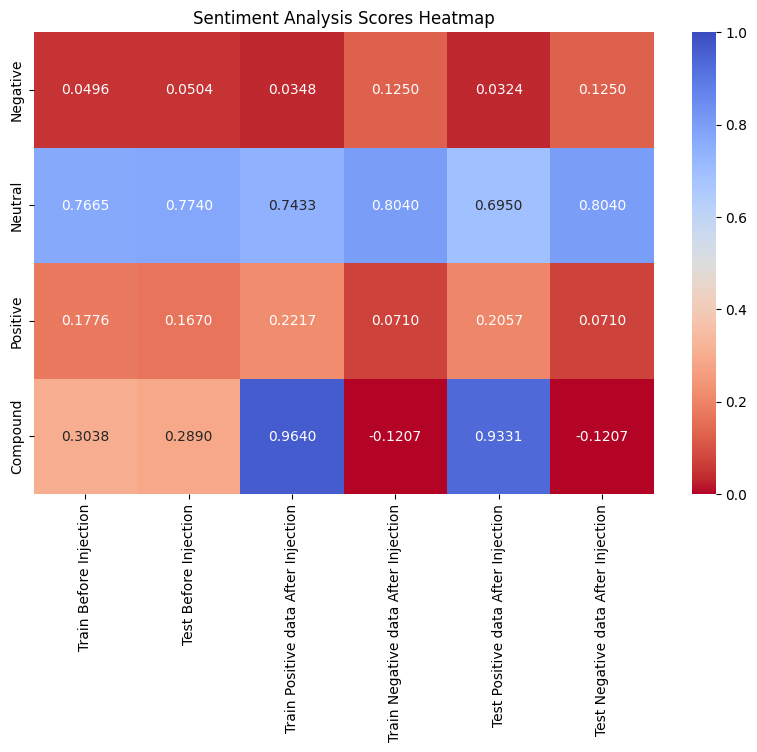

In [11]:
# Prepare the data
data = {
    'Train Before Injection': [0.0496, 0.7665, 0.1776, 0.3038],
    'Test Before Injection': [0.0504, 0.7740, 0.1670, 0.2890],
    'Train Positive data After Injection': [0.0348, 0.7433, 0.2217, 0.9640],
    'Train Negative data After Injection': [0.125, 0.804, 0.071, -0.1207],
    'Test Positive data After Injection': [0.0324, 0.6950, 0.2057, 0.9331],
    'Test Negative data After Injection': [0.125, 0.804, 0.071, -0.1207]
}


# Define the sentiment categories
categories = ['Negative', 'Neutral', 'Positive', 'Compound']

# Create a dataframe
df = pd.DataFrame(data, index=categories)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="coolwarm_r", cbar=True, vmin=0, vmax=1.0, fmt=".4f")
plt.title('Sentiment Analysis Scores Heatmap')
plt.show()